In [1]:
import os
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time
import scipy.stats as stats

In [2]:
csvpath=os.path.join("..","Resources","MovieData_Clean.csv")
movie_df=pd.read_csv(csvpath)
# movie_df[movie_df["Year of Release"]==2019]["Budget"].value_counts()
# movie_df[movie_df["Year of Release"]==2010]["Budget"].value_counts()
# movie_df[movie_df["Year of Release"]==2010].count()

In [3]:
grouped_movie_df=movie_df.groupby(["Year of Release"]).count()
grouped_movie_df

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Revenue (Millions),Runtime (Min),Primary Genre
Year of Release,,,,,,,,,,,,,,,,,,,,,
2008,182,182,182,182,182,182,178,181,182,182,...,182,182,182,180,178,182,182,182,181,182
2009,186,186,186,186,186,186,177,186,186,185,...,186,186,186,181,181,186,186,186,186,186
2010,178,178,178,178,178,178,172,178,178,178,...,178,178,178,172,175,178,178,178,178,178
2011,200,200,200,200,200,200,194,200,200,200,...,199,199,199,192,194,200,200,200,200,200
2012,176,176,176,176,176,176,172,175,176,176,...,175,174,174,169,171,176,176,176,175,176
2013,181,181,181,181,181,181,176,181,181,181,...,181,181,181,172,178,181,181,181,181,181
2014,206,206,206,206,206,206,201,206,206,206,...,205,205,205,194,202,206,206,206,206,206
2015,194,194,194,194,194,194,190,193,194,193,...,192,192,192,181,182,194,194,194,193,194
2016,204,204,204,204,204,204,196,204,204,204,...,202,202,202,184,186,204,204,204,204,204


In [4]:
# Setting up my boxplot data

boxes={}
year=2008
while year<=2018:
    boxes[str(year)]=movie_df.loc[movie_df["Year of Release"]==year]["Revenue (Millions)"]
    year=year+1
boxes["2013"]


922      59.520298
923      60.141683
924     105.200903
925      19.701164
926     146.497771
           ...    
1098    188.133322
1099     44.907260
1100    392.000694
1101     74.188937
1102     20.275812
Name: Revenue (Millions), Length: 181, dtype: float64

In [5]:
#Calculating IQRs
q1, q3= np.percentile(boxes["2015"],[25,75])
iqr=q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
# (boxes["2019"]>upper_bound).value_counts()

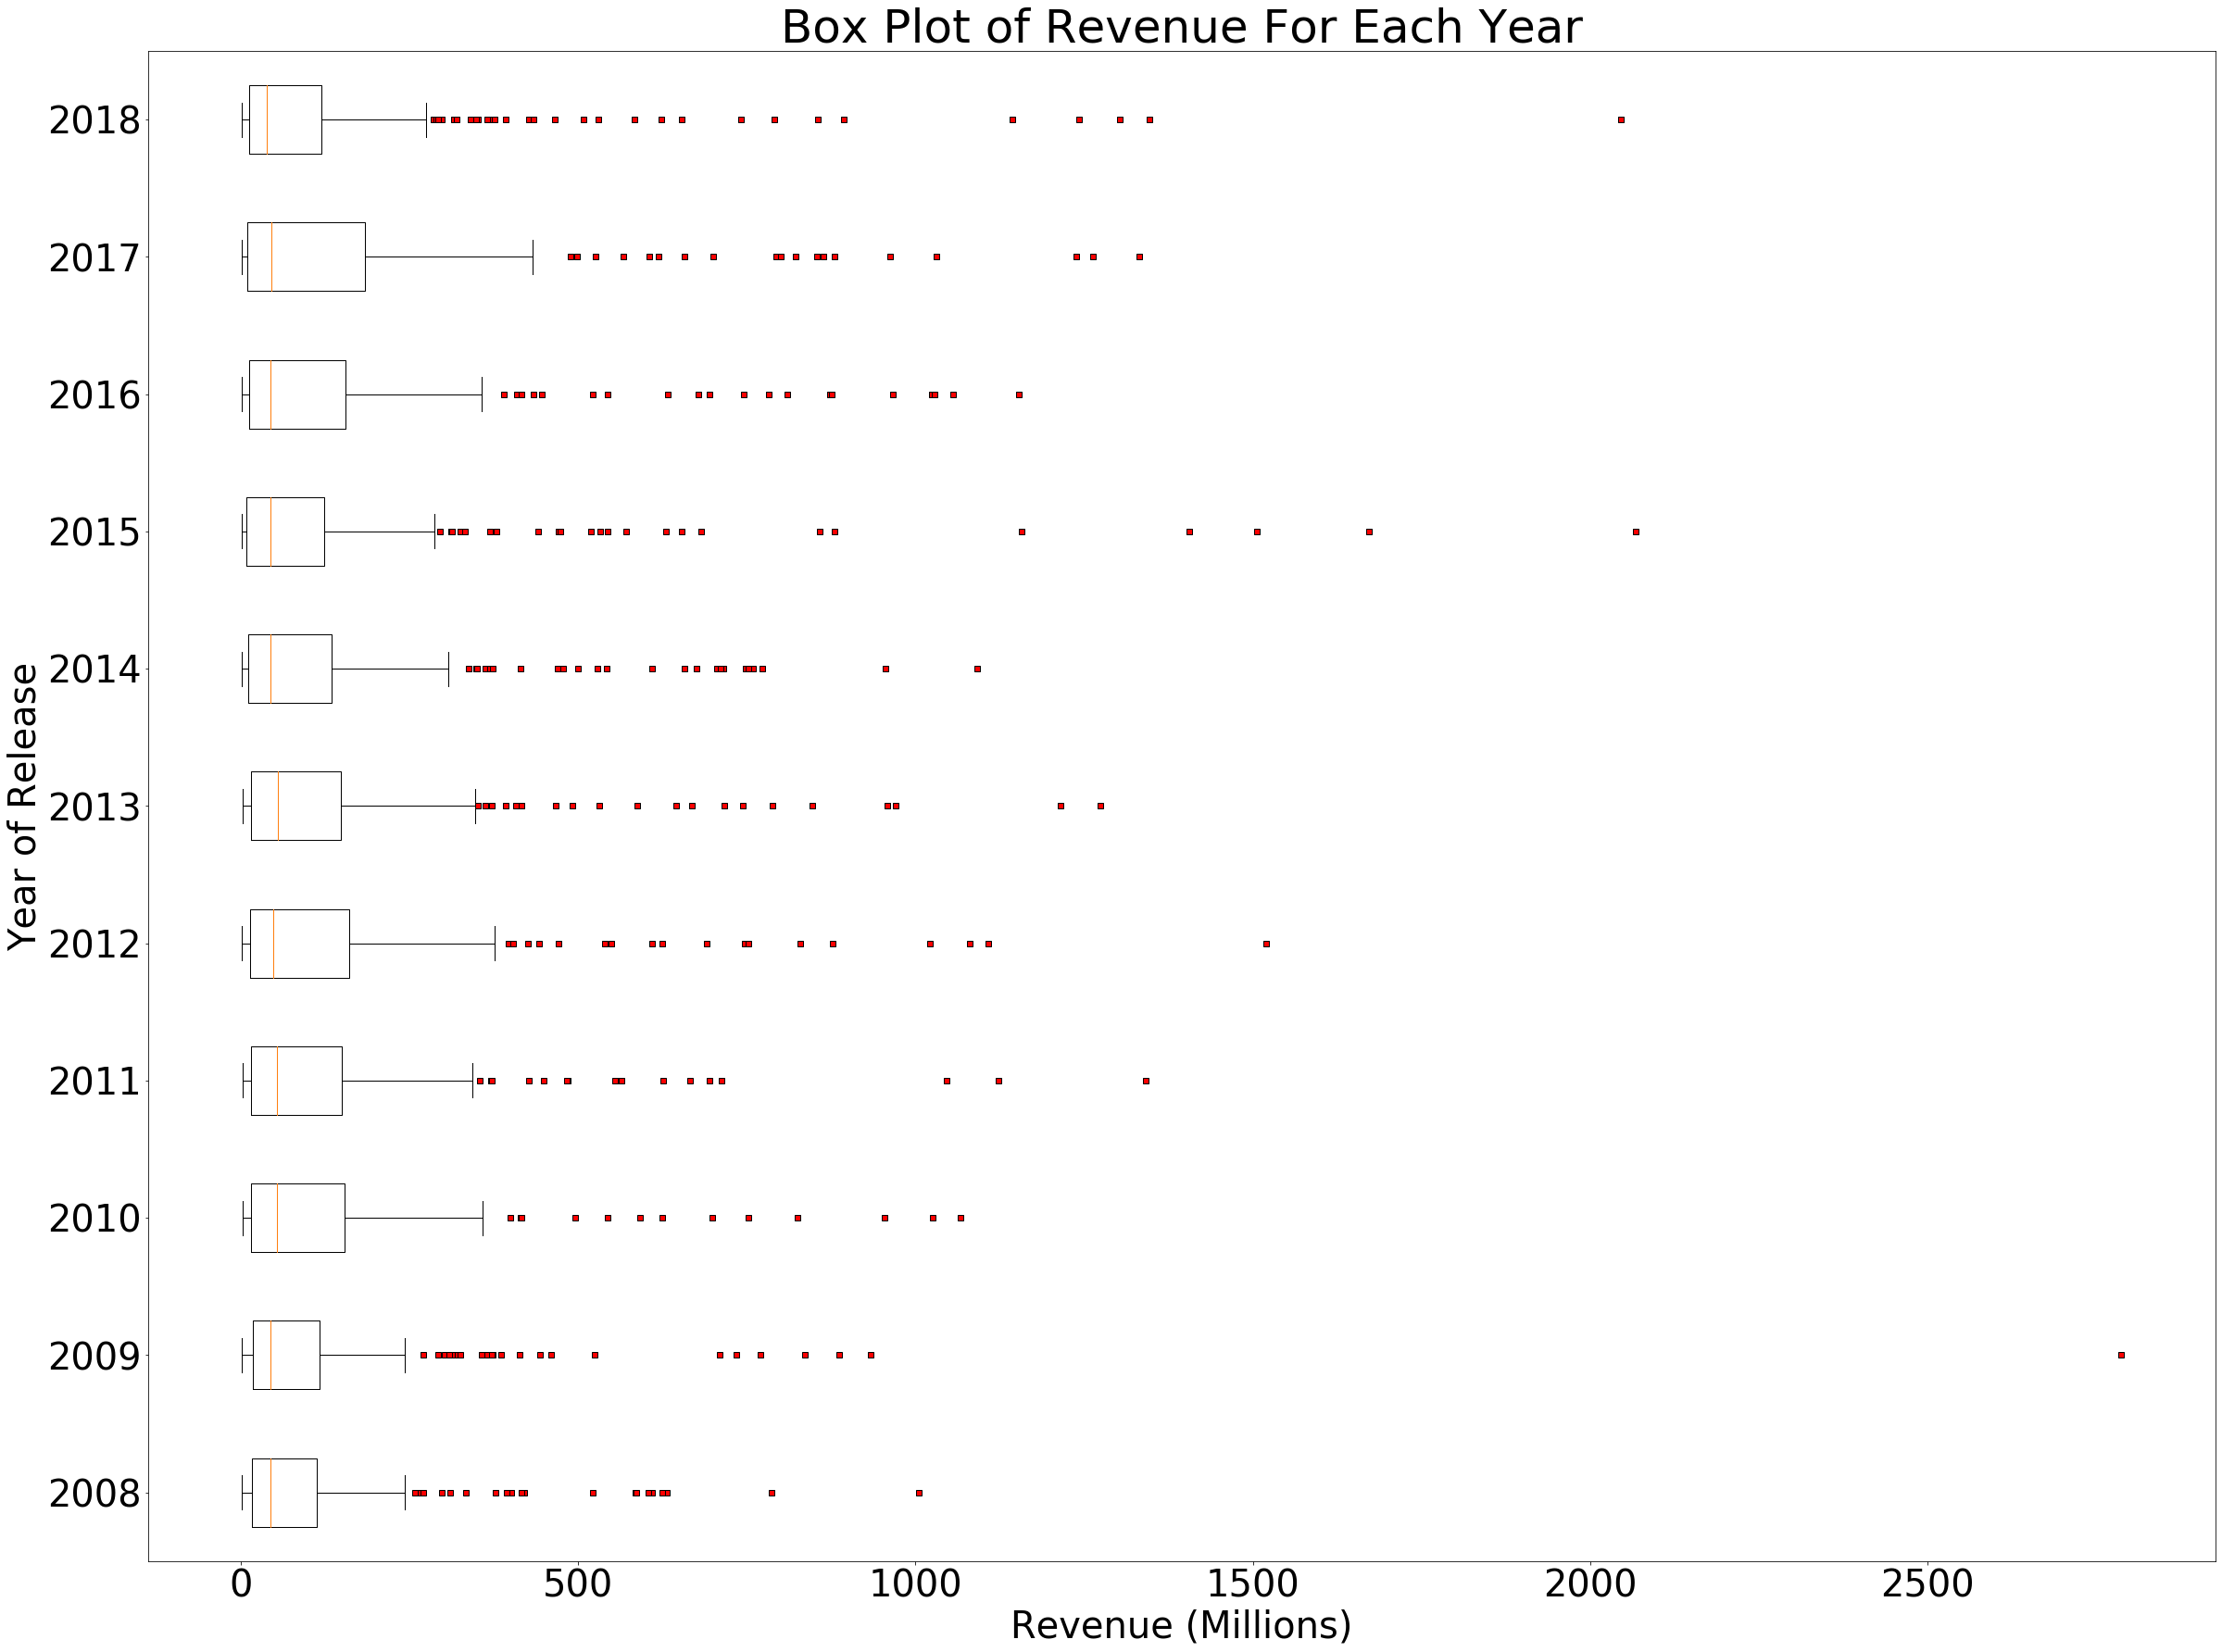

In [6]:
fig, ax = plt.subplots(figsize=(40,30))
ax.boxplot(boxes.values(),showfliers=True,flierprops={"markerfacecolor":'r', "marker":'s'},vert=False)
ax.set_yticklabels(boxes.keys(), fontsize=40)
plt.setp(ax.get_xticklabels(),fontsize=40)
plt.ylabel("Year of Release",fontsize=40)
plt.xlabel("Revenue (Millions)",fontsize=40)
# plt.xlim(0,400)
plt.title("Box Plot of Revenue For Each Year",fontsize=50)
plt.show()

In [7]:
imagepath=os.path.join("..","Images","BoxPlot_AnnualRevenues.png")
fig.savefig(imagepath)

In [8]:
stats.f_oneway(boxes["2008"],boxes["2009"],boxes["2010"],boxes["2011"],boxes["2012"],boxes["2013"],boxes["2014"],boxes["2015"],boxes["2016"],boxes["2017"],boxes["2018"])

F_onewayResult(statistic=0.810393273864213, pvalue=0.6187058472970852)

In [9]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACV8AAAb4CAYAAACSyDEcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd5QsZbWw8WfDISM5CwgqQVGSJMUsIteAIGAEBQWFa8Ksn1dFL3rN2auiBAMqGABRMYsSRDmgiIAICCpByYecDvv7461z6ampTjWhZ848v7V6LfqtekNXd1cXp/bsHZmJJEmSJEmSJEmSJEmSJGk4S4x6AZIkSZIkSZIkSZIkSZI0Gxl8JUmSJEmSJEmSJEmSJEktGHwlSZIkSZIkSZIkSZIkSS0YfCVJkiRJkiRJkiRJkiRJLRh8JUmSJEmSJEmSJEmSJEktGHwlSZIkSZIkSZIkSZIkSS0YfCVJkiRJkiRJkiRJkiRJLRh8JUmSJEnSFIiI0yMiOx4/H/Wa1E5ELBcRL4+IYyPiLxFxQ0TcV3t/rx/1OiVJmgoRcWjtNy8jYpVRr0uSJEmSZop5o16AJEmSJEnSTBURewFfANYY9VokSZIkSZIkzTxmvpIkSZKkAUTERg1/8d/vsTAiFkTEPyPirIj4YkQcGBGrjfr1zCUNGah6Pe6LiBsj4vKIOCMiPh0R+0XEyqN+HZp+EXEA8B1GEHgVEbsMeb65IyL+VWXmOikiDouIp0WE//YjTbGI+E6La4R+j11G/bpmi4j44xQc/0WPJ4/69Wk4EfGkiLi/9j7eHBEbTOIcr2/4rPw5IpaZrDkkSZIkzS7+A5wkSZIkTZ0lgJWA9YEdgVcCXwKuiYhvRcRDRrk4NVoSWBXYCHgc8Frgq5T37JjJvHE303QJ9nn8qNc1KhGxIfC5LpuvAs4Hzut4nD9NS+tmOWBtYDNgd+A9wM+ByyPirRGx1CgXJ0nSdMjMXwOfrDWvDBwdETHR8SNiU+B/as33Ai/NzLsnOr4kSZKk2cngK0mSJEmafksDLwAujIiXjnoxGshywMuAP0fEvqNejKbFqynve6cvAetl5vqZuWVmbt3xeMoI1jiIDYEPAWdHxCajXowkSdPg/wEX1dqeRvltby0ilgS+wvjrg8Mz89yJjC1JkiRpdps36gVIkiRJ0ix2O3Bpj+1LUf7Sfl2a//hleeCYiFgyM4+egvWpuwspWQrq5lEyX60LNGVHWAn4akRkZh47hevT6O1Re35mZr5yJCt5wI3AP7tsW5FSHrFbicytgJ9HxM6ZeeVULE7SGH8F7pxA/1snayFz1J+BhZMwzm2TMIamWWbeVf2Bw28Zew/kQxHxk8y8pOXQbwV2qrXNBz7QcjxJkiRJiwmDryRJkiSpvfmZ+eR+O0XE8pQbNa8AXsTYoJ4APhMRv8zMv0/JKtXkGb0CUCJiFeDpwJsoJSPHbKYEzZ2bmfWsCloMVO9/PUvU8aNYS80JmXlgrx0i4mHA84FDgbVqmzeklNF86tQsT1KHl2Tm/FEvYg57QmbePOpFaHQyc35EfAB4d0fz8pQg+sdn5lDBeRHxaOCwWvNdlHKD901osZIkSZJmPcsOSpIkSdIUy8w7MvOXmfkS4FmUGzWdVgDeMf0rUzeZeXNmfht4HHB4wy7zgA9O76o0jTZgfOazi0exkGFl5mWZ+T/Ao4CzGnZ5SkTsNs3LkiRpFA4H6uUAd6JksBpYRCxFKTe4dG3T/zMQX5IkSRIYfCVJkiRJ0yozT2HsX+AvskdE+P9oM0xm3p+Z76JkC6rbPSLWne41aVo0le67fdpXMQGZeR3wHEqpwrr9pnk5kiRNu8y8F3gpcHdt02ERsdUQQ70b2KbW9mvgkxNYniRJkqTFiP+wL0mSJEnT74vAvbW2tYH1RrAWDeYdjH/PAHad7oVoWizb0JbTvooJyszrgc82bNolIuqZvSRJWuxk5gXAf9Wal6aUH6xnshonIrYD3l5rvhXYPzNn3bWBJEmSpKkxb9QLkCRJkqS5JjNviYi/AlvUNq0DXNl23CqY4tHAJsCawGrAAuBa4HLg3My8v+34c1lmXh0RZwFPqG3allKGZlpExEOArSjv75qUEpbXAlcDv8vMO6drLaMUEasAO1KCFtek/HHZdcC/gbOroCMVTdn21gLWoByzCek47zysGnd14LZq7Msp78fCic4zk0TE2pTv/lqUz18A1wP/As7KzJumYQ0bAdsBG1KCBW+s5j+jynq22JkJx302qL6T2wAPpRyrVYCbKb8VlwF/nI6AkYhYHdi+WsfKPPB+/SAzr57q+UepymS6EfAIYH1gJWAp4Kbq8VfgvKk+N0bExpQStGtUj3mUoKF/ARcBF2fmfZM85zKU3+dHUH4P7qK87xcB54zwOvTjwO6MvY7bEjgM+H/dOkXEspTsp/X7KG/MzCsmuqiIWBnYgQeuZ5ahHK9rKb+f10x0jtp8S1P+P2Hzas6VKMHlN1aPP2XmJZM5Z4+1LLp+2ILyByjLAXcCf83Mk6djDZIkSdJkMvhKkiRJkkbjloa2VtmJI2JT4K3AM4FeZfBuiIifAB/NzD8MMf5rgM/Umi8Ets/MO4Zc6/7A0bXmy4BtM7PpmMwkFzI++GrNqZ40IlYF3gTsRblZ1s1dEXEq8IXMPGnAsQ8H3tljl9MGSJB0ZGYeOMh8ExER84BXUErm7QQs2WXX+yPiHOAbwOczs15qqGnsfscBeh+LX2TmLv3mGZHLurRPKPiqygTyOkr2t7V77LogIn4KfCgzzxlg3I0pa+482F/PzAmVSoyIY4EXdzQl8NBBb55X38PXAXtQAiC7fRjuj4j5wBHAV4YNbIiI6ykBC4t8LjNf07H9BcBbgMd0GSIj4kzgPZn5iyHn/ijlXLPI7Zm54jBjVOM8Cji/1rxPZn6nxVjTctwXB9VxfyuwG71/m66NiB8BH87Mi1rMcyLw3I6m8zJz647tewKHAo+n+bpmT+DEYeed6apz1/OAp1Je+0p9utwaEb8CPp6Zv57EdTwCeD3l3LzxgGv4DvCdiQRwR8QGlCCmlwAP6rLbDRHxJeCDmbmg7VxtZOb91TXoeUDnee2tEXFyZv62S9f3UwLJOv0oM7/cdi1VQNfBwD6UQLVu1zNExJ8pwV+fG/aau2OMx1C+s0+hBHr1zPYVEf8GTqb8/8LFLebbnBJs1+lFmfmtavtawJuBl1ECROsuruaXJEmSZhXLDkqSJEnSaKzR0DZUIERELB8R/wtcQAlK6RV4BeWG/ouBcyLia9VN7b4y87PAt2vNjwT+d8j1bgF8rtZ8N/D8WRB4BSWLWN0qUzlhRBwK/I0SGNQr8ApK9pvdgBMj4vTqeC8WImJXyuf8C8DO9LhRSfm3ju2BTwAXR8Rze+w7F9zWpb1fYECjiNgwIr4NnE0JhOsVeAUl480+wPyI+FZE9Jw3My8HTq0179WvXy9V3z1rzb8aJPAqIpaIiLdRvoeHAVvTPQAIyudvB+DLwEUR8bg2a25YxxpVENu36B54RbW2nYGfR8Tnqww8s85MOe6zQUSsHBFHU4JK9qN/UPBawP7A+RFxREQMHWDXZR2rRsQpwPeAJzJH/t05IparMmP+DfgoJRB+kPPVgyiZmE6NiJ9FxISCuSNivYj4BvBn4FX0D7zqXMNXKQEvbed+GSVA/WC6B15BuQ59O+U7umXb+drKzL9Rgn46LQl8JSKWr+8fEY+nBBJ2uhFoHXBeBYBdSrlGeRy9r2egZC77MPC3iHjekHNtGRGXAPOBd1GCAvuWWaT8rh8IXBgRn4uIpYaZt8+a9qR81t5Cc+CVJEmSNGvNif8JliRJkqSZJCLWAR5ea14AXDHEGGsAvwQOYfisxgHsC5weERsO2OdAys2iTi+LiAMGmjBiBUoAV/3m1hsz89wB1zBqKze03TwVE0XEvIj4MuXmXJsAr52BMyLiyZO6sBGIiIOAHwGbtuj+EOCEiHjD5K5qVun2+Rk64DEidgB+D+zdci0vAM6sSub1Us+Ot1zVt60XVmP0mmOc6rx1IvBB2n0PHw78MiL2bdG3cx3rAGcCTx+y68EMGSQ7E8yU4z4bRMSDgdMowVTD/jvvksBBlOCffkGU/daxKvAbSgDwXLOozN5E7EIJjN+kTeeI2JESEPsi2v97f9uA3LcBxzA2m1Q/6wK/bvt6JyIzvwj8uNa8CfChzobqPHQM44/nf7YpBRgRS1Z/MHE08OBh+1MCor4TEV1LJDZYj/H/vzGMJYD/BH5VHY8JiYiXAt9liv9wQZIkSRoVyw5KkiRJ0vR7O+MzeJyYmTlI54hYDvgV5a/h664HTgD+BFxLyTLwCErJuvVq+z6SEoC1dWbe2GvOzLwlIvYBfkvJsLTI5yLi7Mz8c59lf57xZVu+nZmzKTCgKZNU67JtfRwJvLSh/S7gFMrN9muAFYCNKOVkHl3bd2XgxxHxpMz8XZd5rqFkS4Fy4/Rhte2XArf3Wes/+mxvrQruO6JhU1KCUU4B/gksBNanlFl6EmMzSQTw8YjIzPxkl6k6jwMMfyzqgYkzSVN2kYXA34cZJCKeAPyE8UFMCymZqs6iBJAuoARZbgA8mVLmqPPm9RbADyNih8zsdjy/C3yWscEA+wNfGmbNtb6dbqnm6KrjPLt9w+a/Ul7zn4CbgPsp2YZ2oGS9Wa1j32UoWVWuGbYMYGVpSvmlziCFs4GfAZdTjvfqwGMpJc/qARCvioiTMvOUFnNPuxl03Ge8iFiZEvD00IbN/6JcC/yZcl2wBuWa4XmMz1b3GEogzHaZ2S1TXj9fY+w1yT+AH1IyFl4HrEr5rapnoFsc3Un5jl4IXEIJ0r4FWIpyHDan/E7Vz80bUIJrdhqm/F9EPBH4KeUzX3cT8AtK0Ox1lN+wVSi/l9tRMi9NJBDmBZQgyUVupAQ2/Z5yDboU5fO5O7BNre8qwJHVNcpA17+T6BWU70ZnBthXR8SJHeeLjzD+OuC4zDxu2MkiIih/gND0+b+S8h79kfJdvYdyLtuWcl7rDNQK4P0RcW3Lsoc3UD6bF1F+P26hZMdcjgfOEc+gfD467Uy5jm+6Lh3UtpQsYov+/+c+yrXsL4CrKde3D67265fpVZIkSZqZMtOHDx8+fPjw4cOHDx8+fPR5UG4aZu1x6pBjBPCmhnHuBh45xDhfaBjjPuD9wLJd+ixJKfFxV0Pf7w0x96sa+l8ErNCjz4ENfS4FVpqm9+70hvnXH3KM9Sg3xOrj7D/EvD8fcK6XNMyTlGCRdXr0ey7lBla932XAgwaYd5eGvo+fjveoy3o2pdwUrK/pPGC7Hv22AH7X5Xu2zYBzj/xYdFnDl1uMc0TDOOcMOcZawFW1Me6n3Ix9cJ++m1ECZupr+EqLdW/a4vVv1jDOFwfod2RDvz8AT+7TbwXgPZRzcmffa4G1B5j3+lq/Ozv++/xen0NKNpmmYz1/wGP10Vq/21p+dh/VsIa9B+w7kuM+0QfwnYZ1dz1PTdKc32yY825KmdqluvRZmlLG8d6GvkcPOO+JtX6dx3wB8EpgiR79l5mCY/HHhtezylS/79Xcq1CCWI4Anjbo66MEmfymYd2HDzH3gymBdvUxbqAEuvRcCyU46j8o1xc39Nn30IZ5Fp2fFgLvA1bs0f+ALp+73abjfWpYz4sb1vIPSuD6LpTfuM5tVwOrtZzrHQ1zXU4Jxlqyz/tzCCVorn7cHz3AvLtRfrsPpwTbdf1edvQJSrDcZQ1rfvaAr3fzhr6d54mfAZv16N/4/zI+fPjw4cOHDx8+fMz0h2UHJUmSJGmKRMRSEbFaROwQEYdSbiB/tGHX12XmhQOOuTMlAKrT/cABmfnOzLyrqV9mLszMj1CyXtxb27xnROw1yPxZyrV8o9a8OfDFLuvdEvh0rfluYJ/MHLrs2QgdTrkJVvfTyZwkIlYCPtew6fOZuVdm/qtb38w8CXgCJYtTp4dSborONl+gBFR0+j3whMyc361TZl5Aybj069qmpYGjJnOBM131/XtZw6avDznUlxmbOe9eYK/MPCQzr+rVMTMvpgQkHF/btF9ENGXvW+Tohrb9B1jrIH2axv4/EfE84OW15m8C22fmqb36ZubtmfleSrbB+zs2rQm8ud9iGyzKNHgasHNmnt5j7msomVLqmdgeExFbt5h7Ws2w4z6jRcQzKeU0O90HvCAz35+Z9d95ADLznsw8DNiPsccJYP+IeFqL5SzKNHgz8NTMPCIz62N3ruHuFnPMZLcC62XmKzPzF4O+viwll59KyYjU6eAqA9wgjmR8JrPLgJ0y85P91pKZ92bmKZm5FyUD2rCWpQRe7ZWZ784emdMy82jg9Q2bDmwx74Rl5jcoQZOdNqAE0R3F+Ay1B2WfLLFNImJb4L9rzacBW2bmCZm5sMca783Mz1MypXVmilyWwa7rTgM2zMz/ysz5vb6XHXNmZn6fUkqzntX2jQPM2c2i88Q3gf+org26raHx/2UkSZKkmc7gK0mSJElq70kRkd0elExJN1Cy8HwC2KrW/0pgzyqgaVBvaGj7ZGZ+bZDOmfkj4F0Nm940xBpeBdRvmrwkIsbcQIuIFSkBF/WbiG/IzD8MMd/IRHEYJWND3Q8z8+pJnvLllKwLnc4CXjNI58y8DHg+JbNAp1dUgV2zQhUo8pRa8wJgj0GC9rKUbNqTkvWm09YR8dTJWeXMFhHbU8p+LV3b9E+6BEt2GWcb4Dm15jdk5gmDjlHdXH4ZJdPH/w0NvK1Hn98Cf6k1vzQiBv63rIhYkhJk0umizDyrT9d3157/DtgvM+8bdO4qGPLDteaDI6JNia9rgecP+Nm/A/h/DZue0WLe6TbTjvtEHRsRf2zxqAcsN2kKgnhfZp44yMIy81uMP04w3LVA3Wsz85wJ9J9sp7U8/p2Pg/tNUgW3tyrXWH22D6RcKy6yOgOUZ4yIHRj/vb4V2DUzL2mxliuG7VN576CfO0q2xPr149OrsnyjcAjw71rb8ylBWJ2+nJk/bDnHOxlbCvmfwLMy89ZBB6gCzuuBa8+NiHo573q/23sFd/Xpez3jg5efEhH1UozDuBR4xTDndEmSJGk2MfhKkiRJkqbf6ZQMVBsPccOKiHgwsEet+VrG37Du5+NA/cbcY6u/zu+rusm4N6XsSafPVJl2FvkipeRXp+Oqv+Kf0SJi5Sob2OmUUlZ1C+kRODIBr25o+89BshUsUmXGObbW/CDaZQ0alaZgs/dWmX0Gkpk30RyEMlAg22wTEctHxEMiYq+IOA44E1i/ttvdwIurAJ1B1T/nFwD/O+z6qkwW9WCP3asAqW7qGaoeDOw6xLS7Vn16jTlGROzG+EDZ17W8gf1ByjFfZEVKOathfaRX1rsG36cEYXRqk9Vm2szQ4z5Rm1Je07CPh/YaNCI2p2ST63Q58KEh1/fflFJqnXZrGVxxbmYOm1Fvqj2Kdse/87HOVC+yCqo8qdb8+AG6Nl2DvDUz/zbxVQ3sWpqD+BplZjL++mQlYJPJXNSgqgCjg/rsdgUtMz5FxKaMv25/+zCBVx2OppRF/L/hKeWmp0wVTFnPzLvzBIZ8ZxUcL0mSJC2WDL6SJEmSpOn3eErwwrsiYvUh+j2VsX89D/DVzLy9aeduqnJEX2rY9PQhxvgz44NYlgW+HREPiohXAS+ubb+E/je5pstPumS5OD8i/gncSClH87iGvgkcWJW3mzQRsTHw8FrzWS2zhDUFxwz8/s4A9bXeRZ+gmS6OpZTC6vS0YbInzTCv6JFp73bKTeLvUDJ3zKv1vZ5S6qdr2bq6iFga2L3WfFR1A72NeuaQlYBe5fC+Rgl07LT/EPPV972vGrOXvWvP/5yZvx9izv+TmQuAM2rNTxpymPsppcWGmfdu4Lxacz0QdqaZacd9Jms6lx+ZmfcMM0gVhHlMrTloF6g2p0q6ToF6QPxOvXaOiKWA3WrN1zH+/ZxqX21RRrLpez2y81Nmnkz364sE9m8ZLAXlDy06rzcWAN9tM1AVhP/jWvN0nNeG+mz2cCMw8B+cSJIkSbNR/R/iJEmSJEmDu51SQqOXFYFVgdVq7etQMlYdEhEvz8wfDDBf01+bf2eAfk2OZ3y2gqH+mj0zj4qIJ1LKiS2yKXBCw1h3Ucpmtb2BNdke2bLfrZRsLMdM4loWmbT3NzN/WwWRdZbOeWxExAQCZ6ZFleFtw1rzzzOzHkTVV2beFRE/APbtaF6JkhHlT+1XOatcT7mx/MHMvHHIvtszvmzomRNYy5XAvcBSHW3bAI2lyjLzmoj4MfCsjuY9ImLVKrNZVxGxKuOzgpwyQAap+s3sehDPsC6vPd9myP7n93utXVzG2Ow59XKmM81MO+4z2WRfC9QzBO7MEKVJK79qOf9iKSLWpnz/Hg1sDqxCyUC5PCXArW7N2vP6b2DdDtVYnb5dZRicTr9u0eeyhrZRn58OpQQd1ssNfjoz27zGRerntfktgtU6Tfi8FhGbUAKoHg08jHJN9CBgGZo/mw+pPe/32ezmjGEDRCVJkqTZxuArSZIkSWpvfmY+eZAdI2JdSuaqgxl7Q3xN4MSIeGlmfqPPMPWygPcxPrvJQDLz7xFxLbBWj/EH8Z/AdsAWHW31ckgAh2bmH1uMP1PcSbm5/V+Z+Y9+O7fUdPznT2C8+Yy9kbg65SbaFRMYczo0lUebyHE4m7HBV1CO9VwJvvoV8NkWgVfQHORxZETcO4H11LOOrdFn/6MYG3y1DPBCoF/50hdV+3bqV3JwLcZnn3tuRLTN9AGwXu15v9dbV886MqgFteejDm7oaoYe98mwfWZO5NzVTf234hbgry3H+jPl960zyHLYa4E7gb+0nH8qrdomaHciIuLZwGsp10G9Sqr20+/7+tiGtokGLLbR5vxUPzfBiM9PmXlLRJzL+OCrUyc4dP03dNuImMi1cD1b7kDZc6vyvq8EDqTdtX6nVVr2O3eC80qSJEkznsFXkiRJkjQNMvMaSgm0YyPitcCneOAvzJcEjoqIP1Xl/Lqp3zy+fIJZDi5ibPDV0DenM/OOiNiHEuCyQpfdvpWZw2bRGJWFlOxWC4CrKDeLzga+Pw03cZuO/0UTGO9CYM+GOa6YwJjTYSqOwyBzzAY3Av9saF+G8pqaXtc+wNMjYo8WGTzWb2hrmzWum343j0+mZO/qfG0H0D/46oDa8+uAfhkGm17vOtVjsgxTahbKe95GPUBuqca9ZoaZeNxnsvr3/OK2GQ0zc2FE/BXYqsf4/VxflUSbs6oS0l9hbKDoRMyLiBV6lJVeu6Ht/Emaexhtzk9Nwbsz+fzUSkQsyijVadXqMVnmRcTKVanVbuvYklJud8tJmrNtoNy1kzS/JEmSNGMZfCVJkiRJ0ywzPxMR6wNv7WheBvg0JTtWN/UbNhMNBqqXslomIpbPzDuGGSQzL4qIVwPHNGy+hPLX9jPNBpl55agXUdN0Q24i73FTqbJ6+cuZyOPQ3QmZeWC3jRGxHrAX8HbGZv5ZBfhBRDwpM4fJPjEdASv1soZjZOa9EXEs8PqO5u0jYovMvKCpT0RsQcnI1+nrmdkvY9fIX2+DiWQZmy1m4nGfkSIiGB/8MNnXAsMGh9wywflntYhYA/gFkxfcskivgKSm37A25Uknai6cn9qaroDP5WjOJkZEbAP8nMm95mkbKDenzxOSJEmaG+qp3iVJkiRJ0+MDQD3I6SkR8egefep/Qd8tI8KgmvrX5xhUt5uOF2fmrS3HnGvqx/6+zLxnAuNN5vs7nZrWOJHP+mw9DkPLzKsz8zPAo4Df1DavCHy3ysYxqMnM0DERRzW07d9j/3rWK+hTcrAyU17vXONxH9wKjP/33Mm+Flg6IuolO3u5b4Lzz3ZfoPka6ALgI8DelGDQdYGVgKUzMzofwBuGnLPpPH7bkGNoao30vFZ9h79Nc+DVb4B3UzK1bUkpgb4iMK/hs3ncJC1prp8nJEmSNAeY+UqSJEmSRiAzF0TEacAzapt2pXvpmFspGWwW6Vbmb1BN/YcOlIqI3YE3dtn87Ig4NDM/Oey4c1D92M+LiKUnEIA1Ke/vCDStcSKf9dl6HFrLzJuq7+VZwOYdmzYCPsrg2ejurD2/H1hugkGBQ8vMP0XEucC2Hc37RsQ7MnPMDd2ImAfsWxvinMwcpCRX/fUCHJiZRw63Yg3J4z642ynfw84ArMm+FrgnM++e4JhzQkTsTMk22Olm4IDMPHGIoYbNzNaURWhFJp4FTZOn6bz2wcx8xzTN/xrgYbW2i4EXZuYfhxhnscgaKEmSJE0HM19JkiRJ0uhc0tC2VY/96yVlVmnca3D1/ncPW3IwIh5Cc7nBTh+OiB2GGXeOaioZNJH3uKnvjRMYb7p4HCZBZi4A9gMW1jYdGBHbDzjM9bXnSwAbTnRtLdUzV60D7Naw338Aa9famjJnNam/XoCNB+yrBwxblsrjPqDMTMaXGJvsa4FRlK+brV5Ue57A3kMGXsHwZeFuaGgzg9zMMurzWv2zeTPwtCEDr2D2lmmWJEmSpp3BV5IkSZI0Ok2ZC9bosf91tecbD1kaqO6RtedNN4q6ioilKOVI6jf8flJ7vhRwXERM9Abx4q7+/gI8YgLj1d9fGPI9HhGPwyTJzPnA52vNAXxowCH+3dDWrcToVDsWqGfjaSovWG+7G/jmgHPMpNc7CvfWng8bRLXI6kPuP9eP+7Dq58jNIiLaDBQRSwKb1prnxPlxkjy99vzMzPxFi3EeOuT+/2po8zszs9zA+FJ70/IeRcRqjM0UCXBkZl7VYjgDYSVJkqQBGXwlSZIkSaOzckNbPUtNp3Nrz+cBW7eZOCI2BNaqNZ8z5DAfBnastf2EknmmXi5qI8ZnrtFY9fcXYLsJjFfve0NmXjGB8aZL0+dwIsehKcvTsJ/12ex9jC+z+JSI2GWAvr9vaPuPiS9peJl5E3BSrfnZEfF/gT4RsQbwrNo+J1Z9B3E54wNbnhoRSw+12NmrHhC8dMsA34cPuf9cP+7Dqv9WrMT4AKpBbQEsX2ubS+fHiVq/9vy0luM8dsj9f9vQtnPLuTUFMvN+xn+XHlFljJ1q61MCrTsN/dms/l/hwZOyIkmSJGkOMPhKkiRJkkZn84a2ppWmI4gAACAASURBVGwGi5zZ0LZ3y7n3GXD8RhGxB3BorflqYL+qLNJrgfNr2/eIiHofPWDS3t+I2JHx5eGabtZ2qmdoAFiyzfwTkZlXA/+oNe8SEU3Bij1FxLLAc2rNC4ALWi5v1snM64BPNWx63wDdT2V8NqQ9ImKFia6rpXoA59LASzqev6Rq6zRoycFFJd3qWWtWAPYcdIxZ7uaGtmEz8gA8aZidPe5DmzHXAnNZRCzP+MC1oUvaRsQTgHWH7HY2cFutbZ/qN08zx88a2vadhnmbsui2Kbf8gokuRJIkSZpLDL6SJEmSpBGIiFVpzlJwUY9uv2B8Zqz9hg2EiIh5wEENm346YP+NGB8EsRB4YRXoQWbeSbmpW785+OGI2GGY9c4VmXk5cEmteaeI2KrFcP/Z0Nbv/a1nRwJYscXck6FeunJZYP8W47wIqJe7/EWVkWIu+Rgl6KzTYyNit16dMvM24Je15jUowZWj8FPgylrb/l3+m2rfnw85Rz27FsC7q/Jsi7uLG9qGOl9HxJrAHi3mnsvHfVhN5/KXV6WABxYRyzG+TGcy/HdmrroLqP+W9Cod3c0bh+2QmfcBP2yYu6kUq0an6bz2xohYaYrnvb2hbajPZpX18NWTsxxJkiRpbjD4SpIkSZJG412UgJK673frUGUEOqHWvDbwniHnPhTYrNZ2Rmb+oV/HqgzU8YwPaHlXZo4paZKZFwMH1/ZbCjguIur9VXyuqS0i6uVjuoqIxwH71ZpvBb7Sp2tTabY2WW8mQ9NxOCwi6qUyu6o+Y//TsOkzrVc1S2XmzcAnGza9d4Duhze0vSciHjOxVQ2vCpr7aq15m4jYKiK2ZnwZ1q+0CLT7NvDXWtsjgQ8OOc5sdA4l+KbTi4cc4/00/7b1M5eP+1Cq39Z6gNRDgbcMOdQ7GV9S7EeZeVnbtc0l1bnl37XmXYcZIyL2ol2wIsCHmtoiYlS/26rJzPmMD5ZcDThmmOu6Fq5paBvqs0k5l09HiURJkiRpsWHwlSRJkiRNs6r03hsaNv0yMy/t0/0TDW1viogXDjj3Myg3VOo+Nkh/4CPA9rW2H9PlBnlmHgscWWveiPGZs1QcxfjSXzvTHDgzTkRsTAmOq9/U+1Jm3tKn+xWMz1T2zEHmnWyZeR7jMy6tApwwSKa3qvTSdynBiZ3OzcxTJ2WRs88nGB9gt0NEPLtXp8w8neZMZCdX5S2HFhHLRcRrIqIpQ1s/TeeOA2jO+DL0eSYzF9Ic0PrmiHhX2xvmEfGkiDimTd/pkpkLgLNqzbtWvxt9RcTBNGdVHGTuOXvcW/p4Q9thEfGsQTpHxN7A2wccV92dVnu+dUQMFLAYEY9niLKodVXA/Mm15gcBP4mIhw87XpXVVJPvXYwPat0TOKL6g4ahRcSWEfGNqvTlOJn5D+DvteYDIuKRA45/MC0yskmSJElzncFXkiRJkjQNImLdiNg3Is6gOYDqXgYo5ZWZZwKfrzUvAXwtIg7rdiMnIpaMiDcCJwL1fU7IzHpGraYxnge8rtZ8FbBfZtZvLHV6LXB+rW2PKghNHTLzVprLvLwuIr7VK/NTFURzGuMzmfwNOGyAue9nfODFbhFxeFVKbLodwvjSOY8DTquyHDWqbi7+CnhqbdM9wIGTusJZpAqsaQqsGCT71QGU73qndYHfVJ+PvuWMotg5Ij5FuSn8GWDDAeYeowpQrQc8vJjxGZp+0zaDT2Z+i+bArfdRAht2GmSciFg/It4QEWcDpwI9yzzOEF9uaDu+V4nKiFg9Ij7DA79Nd7WZeI4f96Fk5inAN2vNSwHfjYi3VuWFx4mIpSLiXcA3gHpJx6Mzsx70qt6Ob2g7MiJe1q1D9R68hRLUuqj8XL/g6G4OYnyWo4cDv4uI11el47qKiHkRsWtEfIeS+U6TLDN/D/xXw6YDgd9GxH8MMk51nj0wIn4BnEcpq9zr3s63a8+XAX4aEU0lzxfNsVpE/C/lXL4o4LXtZ1OSJEmacxr/R1ySJEmSNJDtIuKPffZZgVJiZLUe+9wHvCQzLxxw3jcBTwAe1dE2j5I15JCIOAH4E3A9sCqldNPzgPUbxvonAwSkVBmV6hka7gNemJnX9+qbmXdGxD7AfGDFjk0fjogzqxtTqmTmN6pMMy+tbXoB8JyI+BFwBvAvYDlgY2B3YKuG4e4BXlwFdQ3iKGCXWts7gXdGxNWUzEn31bZ/LzPfN+D4A8vMv0bEaxn/udsGOCciTqdkXbsSuJ8SdPZ04CmMDyoAeNsgpTUXc5+ilB1dvaNt24jYIzNP7NYpM6+JiD0ogSydmceWpnw+3hQRZ1KCohZ9TpahnH/WA7YFHlObdyKOppwDF2kKDpxodr2DKUEMT6i1Px14ekRcSDkeFwE3Ur4Xq1LO9Y+mvN5NGJ+FbqY7lpLxZIuOtpWAUyLiN8CPgH9QXtfalMx8z+CBc/tC4M3AZ1vOP1ePexuHADsytjzsMpRydK+PiO8BF1CO06Lj8zxgnYaxLmZ8cPVsd1pELJyEcX6VmU3ZSgG+RwmE6fz9XZZSVu7NwEmUY3s3sFa13+7Vfy9yBeV8NUgg7BiZ+e+IeD7wM8aW+1yNkjHzPRHxc+D3wHXAHcDKlN/LbYHH88D16YJh59dgMvMDEfEIYN/apm2BH0XEFZSg8fMo39e7KO/TasDmwHaUa/mma5tuPkI5n3Zedz8YOD0ifkUph7goO9Y6lHP5boz9jf8RpWz1C4aYV5IkSZqzDL6SJEmSpPZWoDngZRj/Ag7KzB8M2qEKZnoq8ANgh9rmtYBXDTjURcBumXljr52qbFrHU24EdXpXVZKsr8y8OCIOAb7W0bwUcFxEbJOZ9VJ7c90rKEEFL6+1Lw/sXT36WQDskZm/G2Le44FXAk9u2LZe9aibP8T4Q8nMo6sMLp9n7E3HJYAnVo++wwBvycyBSjcuzjLz1oj4GPCB2qbDIuKkXhnsMnN+VWbwe8Cmtc3LUjKN1bONTZVvA59m7E3lTrcxPuvHUDLznojYFfgc47+HUG6ED1TCaTbJzLsjYn/g15TzTad+37mkBPO2PifM1ePeRmYuiIgnAqdQAqs6rQe8ZsChzgWemZn1srOz3aP67zKQK7ptyMyMiBdQskau0jB/vzVcTynvO1Bpzy5rOD0inkQJ9KoH1q0K7FM9NFovo2QifRfjg0M3orl0bmuZeW1E7Ef5za7P95Tq0csfKNm1jpjMdUmSJEmLM8sOSpIkSdJoXA98FNh8mMCrRTLzOsqNky8wPhNR3+6UkkM7Z+Y/Btj/Y5S/uu90CiW7xuCTZn4dOLLWvBETz1Cz2MnM+zLzFZQMNG2yUZxJeX9PHXLehZTMKMe1mHNKZOaXKDenL2nR/e/A8zLzY5O7qlntM5QMKJ22Avbq1zEzLwC2p2Q1alVarsNZlMwbQ6uCRHoFVx2fmfWSlW3muav6Hu5LuWk+EdcwS25iZ+Z8YFdKBpZB3Uz5rh0zCfPPyePeRmZeRckS9lVKBsBhLKSUmXxSZv57stc2V2TmxcDT6BGk1cV5wE6ZedEkrOH3lHPzdyjXeG34GZhCmXl/Zr6Hkl2qX9bcfm4Gvkif3+Eqo+ULGV/CuZ8TKOcFSw5KkiRJQzD4SpIkSZKm1j2UQKvLgJ8A/wM8B1gvM9+Sma3LvGTmHZl5CCWzwlGULFq93Ah8E3hMZr4kM2/qN0dE7M347BlXAi/tlSWnh9cC59fa9oiIQ1uMtdjLzE9QSkp9gFK6qJe7KJ+xPTNz5ypQps2cN2XmC4FHAIdRMqxdRikld2+bMScqM39KyXZzCPBbStBAN/dTMu+8AdisVzm9uagKXPpIw6bDIqLvvxNl5i2Z+VpK4OThlOwYgwR93EEpjfU2yvvy2Mz85cALH69X0OakBnRm5rGUbF/7UgJPBynjmcCfKaW/ngFskJnvnsx1TaXMPAPYjFKqsldmwlspWaoeOdnftbl43NvIzAWZ+TJga0p2yZ6lgCnBl18BtszMgxbDjFfTLjPPpZTE/W/ghj67n0fJULpdZl42iWu4MjP3oZSyO4YSeNjPjZSMl89jbKlRTZHM/GlmbgM8i5KVqt/nZZHLKIGkewHrZubBmdn3jy8y83hgS8ofP/QK1loI/AJ4VmY+b4hy1ZIkSZIq0e7fyiVJkiRJM01EBOUGyyaU8oOrALdQbrReDszPzGEzY2gGiYiNKFmK1gLWoNxIuw64CjgrM+8c2eKmUUSsCuwIrE05FkE5DtcCv68yw2maVO/HdpT3YnVgJUqw1a3A1ZTAwcurzGqzXlUKcxvgIZTXuxolAO1WSjDDJcBfJiP71kwQEUtSvm+bAmtSSsbeAFwI/C4z75mmdcyp495WFUS5DfAwyvu1CiWA7jrgUuAPLYOnNYDq+G9N+a1eHViG8hm9Ajg3M6+cxrU8ivK9XaN6LKzWchWl9PSlXheOVnXt/ijg4ZTPy+qUP5i/lfK9vZRyXptwee6IWBbYifKZWI1y7bRojrMtAS5JkiRNjMFXkiRJkiRJkiRJkiRJktSCZQclSZIkSZIkSZIkSZIkqQWDryRJkiRJkiRJkiRJkiSpBYOvJEmSJEmSJEmSJEmSJKkFg68kSZIkSZIkSZIkSZIkqQWDryRJkiRJkiRJkiRJkiSpBYOvJEmSJEmSJEmSJEmSJKkFg68kSZIkSZIkSZIkSZIkqYV5o16A5rY11lgjN9poo1EvQ5IkSZIkSZIkSZIkSWp0zjnnXJ+ZazZtM/hKI7XRRhsxf/78US9DkiRJkiRJkiRJkiRJahQRf++2zbKDkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1MK8US9AkqbSaqutxk033TTqZUizUr5nJeK9t4x6GZIkSdJib9VVV+XGG28c9TIkSZIkSZLUgsFXkhZrN910E5k56mVIs9NhK/v9kSRJkqZBRIx6CZIkSZIkSWrJsoOSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSJEmSJEmSJEmSJEmS1ILBV5IkSZIkSZIkSZIkSZLUgsFXkiRJkiRJkiRJkiRJktSCwVeSxoiIUS9BkiRJkiRJkiRJkqQ5yXv2s8+8US9gOkXECsAWwObAGsCywALgX8DZmfmPSZxrE2ArYH1gSeBK4KLM/NNkzTEdImJN4PHAusDKwHXAVcAZmXnLKNcmSZIkSZIkSZIkSZIkjdJiH3wVEY8G9gZ2BbanBEJ12/cS4LPAlzPzjpbzPQ94K7Bjl+0XAJ/MzC+3HH9ZYGtgB8rr2QHYBOgMfdw4M69oM37HPE8DDgN2ro29yF0RcTLw7sz8y0TmkiRJkiRJkiRJkiRJkmajxTr4KiJ+C+w0RJdNgE8Br46IF2fmOUPMtTTwv8Ar+uy6BfCliHgOsN+g2aMi4j3A7sCjgaUGXdewImIp4IvAAX12XRbYB3h2RLwhM784VWuSJEmSJEmSJEmSJEmSZqLFOviKEkxVtxA4n1I6bwGl/OAOwCod+2wK/CoinpqZ8wec6wuMD1i6CvgjcB8laOqhHdt2B46LiGdn5sIBxt+TUsZwykTEEsCJwDNrm24DfgtcTzlejwVWrLYtB3whIu7OzGOmcn2SJEmSJEmSJEmSJEnSTLLEqBcwTe4DTgKeC6yamdtk5rMz8yWZ+QxgTUrGqgUdfR4EnBQRK44fbqyIeBVjA6/uAQ4CHlLNswfwcGCv2hy7Ae+ZwOuCB4LIJsO7GRt4tbBqWzMzd83MF2fmrpTj9W7g/o59j4iI7SZpHZIkSZIkSZIkSZIkSdKMt7gHX90LHAFslJl7ZOb3M/PW+k6ZeV9mHgU8Dri5Y9N6wJt6TRARywPvrTW/IDO/3JnRKovvAbtSgsEWeXNErDPg67kR+CnwfmAPYL3MXJ+SXWtCImI94B215gMz878z867Oxsy8KzP/Gziwo3kp4MMTXYckSZIkSZIkSZIkSZI0WyzuwVc7ZuarMvOqQXbOzAuBt9SaX9yn2yHA2h3Pj8/ME3vM8XvgEx1NywFvG2B5u2Xm6pn5jMz8r8w8KTOvGaDfoF4HLN3x/OR+ZQQz82jg5I6mp0TE0yZxTZIkSZIkSZIkSZIkSdKMtVgHX2XmP1p0+zpwR8fzTSNi7W47Mz446+MDzPEpxpbse1FERK8OmfmvAcadiGfWnn+ica/xPll7vt8krEWSJEmSJEmSJEmSJEma8Rbr4Ks2qhJ7f601r9e0b0Q8GNimo+nSzPzdAHNcBZza0bQ2sONwK508EbEy8KiOpruA0wfsfhpwd8fz50TEkpO1NkmSJEmSJEmSJEmSJGmmMviq2X2150t12W8XoDNj1WlDzFHf9+lD9J1s6zL2dVyamfcO0rHa79KOptWAHSZxbZIkSZIkSZIkSZIkSdKMZPBVTVX+b+Na87+77L5F7fnvh5jqrD5jTafVas8XDNm/vv8oX4skSZIkSZIkSZIkSZI0LQy+Gu8JwOodz68F/tFl381qz/82xDyX9xlrOt1de77MkP2XrT1/xATWIkmSJEmSJEmSJEmSJM0KBl+N99ra8x9mZnbZ92G15/8cYp76vg8fou9ku6n2fJ0h+9f332QCa5EkSZIkSZIkSZIkSZJmBYOvOkTE04C9O5oS+HSPLivXnl836FyZeQdwZ0fTihExqvfjn8AdHc/Xj4h1B+kYEesB69Wa68dFkiRJkiRJkiRJkiRJWuwYfFWJiNWBY2rNR2fmH3t0W7H2/K4hp72z9rw+3rTIzHuBs2rNLxqwe9N+I3kdkiRJkiRJkiRJkiRJ0nQy+AqIiCWBbwHrdzRfCbypT9cVas+HDb6q718fbzp9s/b8bVVAWlfV9rc1bDL4SpIkSZIkSZIkSZIkSYu9eaNewAzxGWCXjuf3AC/MzJuHHCcnuH8M2X8yfQ14H7Co3OBawMkR8azMvKm+c0SsCpwMrNkwVs/jEBGvBF4JsOGGG05kzZoiEaP8KEqSJEmSNPf4/+KSJEmSJEmz05wPvoqIdwKHdDTdD7w0M88YoPvtwCodz5cDbhti+uVqz4fpO6ky8+6IOAA4hQeCwB4L/CUiPg38ErgeWAN4KvA6SoAWwNXAeh3D9Qxay8wjgCMAtttuu2ED1jQNMheft8V/vJYkSZIkzQaL0/+LS5IkSZKk9rzHPfvM6eCriDgIOLzW/JrMPG7AIerBV8syXADVsrXnIwu+AsjMn0TE64FP8kBJyrUYf4w63QQcDHy/o23YjGGSJEmSJEmSJEmSJEnSrLNE/10WTxGxD/CFWvM7M/PzQwyzoPZ8jSHmXx5YvqPptsy8f4i5p0RmfgbYHbh8gN1/B+zI+KCxf0/2uiRJkiRJkiRJkiRJkqSZZk4GX0XEM4CvM/b1fywzPzDkUJfVnm8wRN/6vvWxRiYzfwhsBuwLfBO4FLgFuIuyzu8CewA7Z+YlwKa1If4wfauVJEmSJEmSJEmSJEmSRmPOlR2MiJ2B7wFLdzQfmZlvbjHcX4DndDx/6BB9N24Ya8bIzHuBY6tHPzvWns+f/BVJkiRJkiRJkiRJkiRJM8ucynwVEdsAP2Rsub/jgVe2HPKC2vN6EFIv9X0vbLmGkYqIAJ7c0XQ7cO5oViNJkiRJkiRJkiRJkiRNnzkTfBURmwE/AVbuaD4F2Dcz72857M9rz58wRN/6vj9tuYZRewJjs3gdn5l3jGoxkiRJkiRJkiRJkiRJ0nSZE8FXEbEB8DNgzY7m3wB7VeX1WsnMqxib5enhEdE3+1VEPJix2aL+Dfyu7TpGrF6u8ciRrEKSJEmSJEmSJEmSJEmaZot98FVErEkJvNqgo3k+8JzMvHMSpvhG7fkbB+jzemDJjuffzMychLVMq4h4LvCcjqafZeYZo1qPJEmSJEmSJEmSJEmSNJ0W6+CriFgJ+DGwWUfzBcBumXnLJE3zeUrmqkWeXwUldVvT9sAbOpruBD48SWuZkIiYN8S+TwSO7Wi6Czhk0hclSZIkSZIkSZIkSZIkzVADB9vMNhGxNHASsG1H8/XAQcCDIuJBQwx3fWbe1rQhM++IiPcAX+hoPi4iXg0ck5kLq/UEsAdwNGOP+8cy85oBXs+ywDpdNi9be75+mW6cmzPz5h7TvCAiXgkcBfwgM29oWMcGwKHA6xj7Ot6SmZf1GFuSJEmSJEmSJEmSJElarCy2wVfAesCTa21rAGe2GOsA4JhuGzPzixGxE7B/1bQM8GXgsIj4A7AQeDTwsFrXHwOHDbiGnYBfDbjvaV3a39tnvgCeWD0yIi4B/gosAFYGNgIe1dDv8Mz87IBrkyRJkiRJkiRJkiRJkhYLi3Pw1XR7FZCUQK1F1q8eTU4G9luUGWsGCmDT6tHNbcBrM/OYaVmRJEmSJEmSJEmSJEmSNIMsMeoFLC4y857MfDmwF3B2j10vBA7KzN0zc8H0rG5g5wDHATf12e9G4JPAJgZeSZIkSZIkSZIkSZIkaa5abDNfZeYVlOxN0z3v94DvRcSmwFaUzFdLAlcBF2bmeS3HPZUpfj2ZeRHwwogI4BHAIynrXxG47/+zd/dBupflfcC/NxwJ73AAB0cBRXlxSinqHIHWmpj4RltAFKOioBIHqUEnMRAzrZkCbZrJJNWocRQRgbRExZkwEqUatYXRsVFA40tBi+/IEUHDAYKACFz9Y5f4nB9nzz7PfXb3ec7u5zNzZryv5365fntWZ+fs1/uX5PYk/zfJl2b4xi4AAAAAAAAAAFgRqzZ8NW1VdVOSm6bdR4+qqszd0HXjtHsBAAAAAAAAAIBZ5bWDAAAAAAAAAAAAHYSvgM3MXXwGAAAAAAAAAKw0v7Pf/ghfAQAAAAAAAAAAdBC+AgAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAd1k27AYDl1lqbdguwXapz9/TfHwAAWAHr16+fdgsAAAAAdBK+Ala1qpp2C7Bdq/Om3QEAAAAAAADA7PLaQQAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAB+ErAAAAAAAAAACADsJXAAAAAAAAAAAAHYSvAAAAAAAAAAAAOghfAQAAAAAAAAAAdBC+AgAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAB+ErAAAAAAAAAACADsJXAAAAAAAAAAAAHYSvAAAAAAAAAAAAOghfAQAAAAAAAAAAdBC+AgAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAHr3GIWwAAIABJREFU4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAB+ErAAAAAAAAAACADsJXAAAAAAAAAAAAHdZNuwFg7dlnn32yadOmabfBKlHn7pl2/t3TbgMAWKXWr1+fO+64Y9ptAAAAAAAwo4SvgBW3adOmVNW022C1OG8v308AwLJprU27BQAAAAAAZpjXDgIAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAB+ErAAAAAAAAAACADsJXAAAAAAAAAAAAHYSvgM201qbdAgAAAAAArCj/Ng4AQK91025gJbXWdktyRJKnJtkvyc5J7kry4yTXVdXNS3jWoUmOSnJAkh2T3JLkG1X1taU6YyW01vZM8swkT0myfr68Kcl3k1xbVXdPqzcAAAAAAAAAAJimVR++aq0dmeSlSV6QuRDRjluZ+60k705yUVXd23neS5K8JckxC3x+Q5J3VNVFnfvvnORpSY7O3PMcneTQJKP/l4yDq+r7PfuPnPOcJOck+TdZ+Ia0h1trVyX5s6r63LacBwAAAAAAAAAA25tVHb5qrf1dkmMnWHJokncmOau19sqq+tIEZ+2U5D1JXrfI1COSvL+1dkKS08a9Oaq1dm6SE5McmeQx4/Y1qdbajkneleS3x5i+Q5ITkhzfWntnkrOr6uHl6g0AAAAAAAAAAGbJqg5fZS5MNfRQkq8n2Zi5Vw7ul7nbo/YemXNYkqtba79RVdePedYFSU4f1DYm+UqSBzMXmnryyGcnJrm8tXZ8VT00xv4vztxrDJfbJUlOG9R+keTLSX6QuRu2npTk6fnl909L8rtJdkpy1gr0CAAAAAAAAAAAU7fQ6+RWmweTXJnkRUnWV9XTq+r4qnpVVb0wyWMzd2PVXSNr9khyZWtt98U2b62dmc2DVw8kOSPJE+fPOSnJIUlOHpxxXJJzt+G5kl+GyLZZa+3FeXTw6r8nOaiqjq2ql1fVy6rq6CQHJ/nwYO5vt9aetxS9AAAAAAAAAADArFvt4atfJLkwyZOq6qSq+puq+sfhpKp6sKouTvKvktw58tHjk5y9tQNaa7smOX9QfnlVXTR6o1XNuSLJCzIXBnvEOa21x435PHck+VSS/5rkpCSPr6oDMne71lL4/cH44qp6TVX9eDixqm6pqlOSXDb46D8sUS8AAAAAAAAAADDTVnv46piqOrOqNo4zuapuzKMDSK9cZNkbkuw/Mv5IVX10K2dcm+TPR0q7JPmDMdo7rqr2raoXVtUfVtWVVXXrGOvG0lpbn+SYkdLPk7xljKVnZ+6mr0c8e5zbwgAAAAAAAAAAYHu3qsNXVXVzx7LLktw7Mj6stbb/QpPz6HDW28c4451JHh4Zn9Jaa1tbsKXbp5bYQdn8++GLVfUPiy2qqtuTXDtSesz8XgAAAAAAAAAAsKqt6vBVj6q6P8lNg/LjtzS3tfaEJE8fKX27qr44xhkbk1wzUto/m986NQ27Dca3TLD2h4Px3tvYCwAAAAAAAAAAzDzhqy17cDB+zALznpdk9Maqz01wxnDu8ydYuxxuG4x3mWDtcO6mbewFAAAAAAAAAABmnvDVwPzr/w4elIfBpEccMRhfu8VZW/aFRfZaUVX1nSSjrzZ82gTLR2//uiePvjkMAAAAAAAAAABWHeGrR3t2kn1HxrcnuXmBuYcPxt+d4JzvLbLXNLx/5D8f3Fo7brEFrbUTkjxxpHR5VT205J0BAAAAAAAAAMCMEb56tDcNxldVVS0w9ymD8Q8nOGc495AJ1i6XP0nyjZHxJa21f7bQ5NbaUUk+MFK6O8n5y9QbAAAAAAAAAADMlHXTbmCWtNaem+SlI6VK8q6tLNlrMP7JuGdV1b2ttfuS7DJf2r21tkNVPTzuHkttvqfnJ/mbJM9I8rgk17XWLk7y8SQ/mJ96cJITk7w2yc7ztXuSvKSqJgmgAQAAAAAAAADAdkv4al5rbd8klw7Kl1TVV7aybPfB+P4Jjx0NXz2y390T7rGkqmpja+1fJnldkjOTHJXkjfN/FvKJJG+uqv+3Ai0CAAAAAAAAAMBM8NrBJK21HZN8OMkBI+Vbkpy9yNLdBuNJw1fD+cP9pmWH+T8/z9ztX1tzWZJzBK8AAAAAAAAAAFhr3Hw15y+SPG9k/ECSV1TVnRPus1hQabH5bcL1S661dnSSDyV58phLTk3yqtba5UnOqqo7xjjj9UlenyQHHXRQb6sso9am/q0IAAAzw8/HAAAAAAAsZM2Hr1prb03yhpHSw0leXVWfH2P5z5LsPTLeJck9Exy/y2A8ydol11o7NslnsvkNXN9M8o4k/ztzt4G1zN0Q9twkv5vksPnaK5JsaK39WlX9aGvnVNWFSS5Mkg0bNkwaWGMFVC3vX4tfXgEAsD1Z7p+PAQCA6fPv1gAA9FrTrx1srZ2R5I8G5TdW1eVjbvGzwXjnCVsYzp9a+Kq1tlvmXr04Grz6qyRPq6r3VdW3quq+qrq3qm6qqvcmOWp+zSMOSXJ5a21Nf18BAAAAAAAAALA2rNmQTGvtN5NcMCi/dT5UNK67BuP9Jjh/1yS7jpTuqaqHJzh7qZ2e5Ikj468mOb2qfr7Qgqq6P8lrknx9pPyvk5y8LB0CAAAAAAAAAMAMWZPhq9baC5Ncls2f/21V9ccTbvWdwfjACdYO5w73WmnDwNR/q6pfLLaoqh5I8meD8qlL1hUAAAAAAAAAAMyoNRe+aq09K8kVSXYaKX+gqs7p2O6bg/GTJ1h78CJ7rbQjB+OrJ1h7zWD8zG1rBQAAAAAAAAAAZt+aCl+11p6e5Kps/rq/jyR5feeWNwzGx0ywdjj3xs4elspeg/HtE6y9bTAe+/WLAAAAAAAAAACwvVoz4avW2uFJ/jabh4w+keTUqnq4c9vPDMbPnmDtcO6nOntYKncPxrtNsHY4955t7AUAAAAAAAAAAGbemghftdYOTPLpJI8dKX82yclV9YvefatqY5Ivj5QOaa0tevtVa+0JSZ4zUrotyRd7+1giPxqM/8UEa582GA9vwgIAAAAAAAAAgFVn1YevWmuPzVzw6sCR8vVJTqiq+5bgiA8Oxr83xprfSbLjyPhDVVVL0Mu2+NxgfPoEa4dzP7+NvQAAAAAAAAAAwMxb1eGr1tqeST6Z5PCR8g1Jjquq4Wv2er03m9/09LLW2ou20tMzk7x5pHRfkj9dol62xV8Pxq9urZ242KLW2ouTvGpQ/uiSdQUAAAAAAAAAADNq3bQbWC6ttZ2SXJnkGSPlnyY5I8kerbU9Jtjup1V1z5Y+qKp7W2vnJrlgpHx5a+2sJJdW1UPz/bQkJyW5JJt/3d9WVbeO8Tw7J3ncAh/vPBgfMHfco9xZVXcu8Bz/q7X22SS/Ol/aIclft9b+S5J3DMNqrbW9MnfL13/M5iG+a6vq41t9GAAAAAAAAAAAWAXa9N92tzxaa09K8r0l2u70qrp0kfMuSfLaQfmWJH+f5KEkRyZ5yuDzTyY5/pGA1iL7PyfJ1eO1u6Dzq+q8rZzxxCRfyKNDXj/P3Ksab0nSkhyQZEOSnQbzfpLkWVX1rXEb2rBhQ11//fXjTmcFtNay3P+7sBJnsIact1dy3l3T7gIAWKX87AoAAGuDn/0BANia1tqXqmrDlj5btTdfTcGZSSrJ6SO1A+b/bMnHkpw2TvBqpVTVD1prv57kw0mOGvnoV5I8a5HlNyQ5ZZLgFQAAAAAAAAAAbM92WHwK46iqB6rqt5KcnOS6rUy9MckZVXViVc3cVS1V9c0kRyf590m+NsaSG5K8KcmGqvr6cvYGAAAAAAAAAACzZNXefFVV38/cK/JW+twrklzRWjssc7dHHZBkxyQbk9xYVV/t3PearNDzVNUDSd6X5H2ttf0zF8Z6QpK956fclbnnua6qbl2JngAAAAAAAAAAYNas2vDVtFXVTUlumnYf26qqbsvcKxIBAAAAAAAAAIARXjsIAAAAAAAAAADQQfgK2ExVTbsFAAAAAABYUf5tHACAXsJXAAAAAAAAAAAAHYSvAAAAAAAAAAAAOghfAQAAAAAAAAAAdBC+AgAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAECHddNuAFibWmvTboFVos7d0/cTALBs1q9fP+0WAAAAAACYYcJXwIqrqmm3wCpT5027AwAAAAAAAADWIq8dBAAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAB+ErAAAAAAAAAACADsJXAAAAAAAAAAAAHYSvAAAAAAAAAAAAOghfAQAAAAAAAAAAdBC+AgAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAB+ErAAAAAAAAAACADsJXAAAAAAAAAAAAHYSvAAAAAAAAAAAAOghfAQAAAAAAAAAAdBC+AgAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQYd20GwC2H/vss082bdo07TZmWp27Z9r5d0+7DQAAZsT69etzxx13TLsNAAAAAACWifAVMLZNmzalqqbdxmw7by9fIwAA/klrbdotAAAAAACwjLx2EAAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFbKa1Nu0WAAAAAAAAgCnze0OA8aybdgMrqbW2W5Ijkjw1yX5Jdk5yV5IfJ7muqm5ewrMOTXJUkgOS7JjkliTfqKqvLdUZAAAAAAAAAADA9Kz68FVr7cgkL03ygiTPzFwQaqG530ry7iQXVdW9nee9JMlbkhyzwOc3JHlHVV3Uuf/OSZ6W5OjMPc/RSQ5NMho7Priqvj/hvuclObenpy349aq6Zon2AgAAAAAAAACAmbSqw1ettb9LcuwESw5N8s4kZ7XWXllVX5rgrJ2SvCfJ6xaZekSS97fWTkhyWlXdPeb+5yY5McmRSR4zbl9Tct+0GwAAAAAAAAAAgOW2qsNXmQtTDT2U5OtJNmbulYP7Ze72qL1H5hyW5OrW2m9U1fVjnnVBktMHtY1JvpLkwcyFpp488tmJSS5vrR1fVQ+Nsf+LM/caw1n3oyTXTbsJAAAAAAAAAABYbqs9fPWIB5NcleTiJFdX1T+OfthaW5fk1UnenmSv+fIeSa5srR1eVfdsbfPW2pnZPHj1QJKzklzySLCqtdYyF6C6eOSM4zL3qr//1P9o2Zhk95E9e70jyaUd696d5N+NjP9HVT28jb0AAAAAAAAAAMDMW+3hq18kuTDJf66qjQtNqqoHk1zcWvtCks/nl7dgPT7J2UnOX2hta23XLXz+8qr66OCMSnJFa+2W+TMe+dqf01p7T1X9eIznuSPJ9Zm7Weq6JNdW1a2ttWuS/NoY6xdUVXcmuXOSNa21PZL8+qD8l9vSBwAAAAAAAAAAbC92mHYDy+yYqjpza8GrUVV1Y5LfH5RfuciyNyTZf2T8kWHwanDGtUn+fKS0S5I/GKO946pq36p6YVX9YVVdWVW3jrFuOb00ya4j42ur6hvTagYAAAAAAAAAAFbSqg5fVdXNHcsuS3LvyPiw1tr+C03Oo8NZbx/jjHcmGX013ynzryVc0Jg3Y6201wzGbr0CAAAAAAAAAGDNWNXhqx5VdX+Smwblx29pbmvtCUmePlL6dlV9cYwzNia5ZqS0f5JjJut0ulprT0ryqyOlB5J8eCrNAAAAAAAAAADAFAhfbdmDg/FjFpj3vCSjN1Z9boIzhnOfP8HaWfDqbP7sH6uqO6bVDAAAAAAAAAAArDThq4H51/8dPCjftsD0Iwbjayc46guL7DXrThuML51GEwAAAAAAAAAAMC3CV4/27CT7joxvT3LzAnMPH4y/O8E531tkr5nVWntWkkNGSrcn+eSU2gEAAAAAAAAAgKkQvnq0Nw3GV1VVLTD3KYPxDyc4Zzj3kC3Omk2vGYz/qqqGr2oEAAAAAAAAAIBVTfhqRGvtuUleOlKqJO/aypK9BuOfjHtWVd2b5L6R0u6ttZn/+2it7ZzkZYPyX06jFwAAAAAAAAAAmKaZD/uslNbavkkuHZQvqaqvbGXZ7oPx/RMee99gPNxvFp2UzUNnX6mqr06rGQAAAAAAAAAAmBbhqySttR2TfDjJASPlW5KcvcjS3QbjScNXw/nD/WbR8JWDbr0CAAAAAAAAAGBNWjftBmbEXyR53sj4gSSvqKo7J9yntnF+m3D9imqtPS7J80dKDyb5YMc+r0/y+iQ56KCDlqY5llRrM/2tCAAA2xU/XwMAAAAArF5rPnzVWntrkjeMlB5O8uqq+vwYy3+WZO+R8S5J7png+F0G40nWTsOpSXYcGf/Pqrp90k2q6sIkFybJhg0bJg2ssQKqtvzX4pdGAAAwuYV+vgYAAACYZX43CDCeNf3awdbaGUn+aFB+Y1VdPuYWPxuMd56wheH8WQ9feeUgAAAAAAAAAADMW7Phq9babya5YFB+a1W9d4Jt7hqM95vg/F2T7DpSuqeqHp7g7BXVWntGkn8+UvqHJB+fUjsAAAAAAAAAADB1azJ81Vp7YZLLsvnzv62q/njCrb4zGB84wdrh3OFes2Z469WHquqBqXQCAAAAAAAAAAAzYM2Fr1prz0pyRZKdRsofqKpzOrb75mD85AnWHrzIXjOjtbYuySmDslcOAgAAAAAAAACwpq2p8FVr7elJrsrmr/v7SJLXd255w2B8zARrh3Nv7OxhJfzbJI8dGd9YVddPqxkAAAAAAAAAAJgFayZ81Vo7PMnfJtlrpPyJJKdW1cOd235mMH72BGuHcz/V2cNKGL5y0K1XAAAAAAAAAACseWsifNVaOzDJp7P57U2fTXJyVf2id9+q2pjkyyOlQ1pri95+1Vp7QpLnjJRuS/LF3j6WU2ttnyTHj5QeSnLZlNoBAAAAAAAAAICZserDV621x2YueHXgSPn6JCdU1X1LcMQHB+PfG2PN7yTZcWT8oaqqJehlOZySZKeR8aer6kfTagYAAAAAAAAAAGbFqg5ftdb2TPLJJIePlG9IclxV3b1Ex7w3czdXPeJlrbUXbaWnZyZ580jpviR/ukS9LIdXD8ZeOQgAAAAAAAAAAEnWTbuB5dJa2ynJlUmeMVL+aZIzkuzRWttjgu1+WlX3bOmDqrq3tXZukgtGype31s5KcmlVPTTfT0tyUpJLsvnX/W1VdesYz7Nzksct8PHOg/EBc8c9yp1VdediZ42c+dQkR4+U7kry0XHXAwAAAAAAAADAarZqw1dJHp/kOYPafkn+T8depye5dKEPq+p9rbVjk7x2vvQrSS5Kcl5r7e+TPJTkyCRPGSz9ZJLzxuzh2CRXjzn3cwvUz5/gvCR5zWB8eVXdP8F6AAAAAAAAAABYtVZz+GqlnZmkMhfUesQB83+25GNJTnvkZqxZ01rbIcmpg7JXDgIAAAAAAAAAwLwdpt3AalFVD1TVbyU5Ocl1W5l6Y5IzqurEqrprZbrr8txsHhz7dlX13BoGAAAAAAAAAACr0qq9+aqqvp+kTeHcK5Jc0Vo7LMlRmQsw7ZhkY5Ibq+qrnftekxV8nqr69EqeBwAAAAAAAAAA25tVG76atqq6KclN0+4DAAAAAAAAAABYHl47CAAAAAAAAAAA0EH4CthMVU27BQAAAAAAAGDK/N4QYDzCVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAh3XTbgDYvrTWpt3CTKtz9/Q1AgDgn6xfv37aLQAAAAAAsIyEr4CxVdW0W9gu1HnT7gAAAAAAAAAAWAleOwgAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAADoIHwFAAAAAAAAAADQQfgKAAAAAAAAAACgg/AVAAAAAAAAAABAB+ErAAAAAAAAAACADsJXAAAAAAAAAAAAHYSvAAAAAAAAAAAAOghfAQAAAAAAAAAAdBC+AgAAAAAAAAAA6CB8BQAAAAAAAAAA0EH4CgAAAAAAAAAAoIPwFQAAAAAAAAAAQAfhKwAAAAAAAAAAgA7CVwAAAAAAAAAAAB2ErwAAAAAAAAAAADoIXwEAAAAAAAAAAHQQvgIAAAAAAAAAAOggfAUAAAAAAAAAANBB+AoAAAAAAAAAAKCD8BUAAAAAAAAAAEAH4SsAAAAAAAAAAIAOwlcAAAAAAAAAAAAdhK8AAAAAAAAAAAA6CF8BAAAAAAAAAAB0EL4CAAAAAAAAAP4/e3ceZPlZ1gv8+2Qj+x4SSEIRAgkaI8JNCBhRrrJZkgiEXeEKAikqKsp678UiwQUtLJDFC4hIUEEBJYIQNrmGK7IHRDCJJLIYMySBMBNCSCDbc/84PebMSXdP969P9+np+Xyquvr3vr93ec5MF5WZ+fK+AAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwAC7zboAYOM4+OCDs2XLllmXwQr12funXnrdrMsAAID/ctBBB2Xz5s2zLgMAAAAA4A6Er4Cp2bJlS7p71mWwUucc4PcRAIB1papmXQIAAAAAwLxcOwgAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8B26iqWZcAAAAAAAAAwAbi36HZyHabdQFrqarZ+TCzAAAgAElEQVT2SXJCknsnOTTJnkm+k+SqJJ/t7sunuNe9ktwnyVFJdk1yRZJLuvuL09pjLVXVrknul+RHktw5o5+d7yb5jyQXd/dlMywPAAAAAAAAAADW3IYPX1XViUkem+RhSU7OKAi10NjLkvxRkjd19w0D93tMkhcmOWWB9xcleVV3v2ng+nsm+bEk98/o89w/yb2SjMdEj+nurw9Zf5797pLR53lqkoMXGXdNkg8l+a3uvnQaewMAAAAAAAAAwHq2ocNXVfXJJA9YxpR7JXl1krOq6snd/bll7LVHktcl+eXtDD0hyZ9U1WlJntLd1y1x/bOTnJ7kxCS7L7WulaiqZyR5VZJ9ljD80CS/kOR9SYSvAAAAAAAAAADY8DZ0+CqjMNWkW5N8KcmmjK4cPDSj06MOHBtzXJILquqnu/vCJe71hiRPm+jblOQLSW7JKDR1j7F3pyd5R1U9srtvXcL6j87oGsM1UVUvT/KCeV59KcnlGf3aHZDk+CTHZtuTtwAAAAAAAAAAYMPb6OGrrW5Jcn6SNye5oLu/O/6yqnbL6Fq9V2YUKEqS/ZK8p6qO7+7rF1u8qs7MtsGrm5KcleTcrcGqqqqMAlRvHtvjEUnOTvKS4R8tm5LsO7bmilXVC7Jt8OrmJH+Y5LXdfcU84w/NKEz2y0l6WnUAAAAAAAAAAMB6tsusC1hlNyd5Y5K7d/ejuvvvJoNXSdLdt3T3m5P8eJJrx17dNcnzFtugqvZO8tKJ7id095vGT7TqkfOSPCyjMNhWz6+qI5b4eTYn+XCS303yqCR37e6jMjpdayqq6oS59be6LsmDuvtF8wWvkqS7r+nuN3f3qUneNa1aAAAAAAAAAABgPdvo4atTuvvM7t60lMHdfXHueNXek7cz7dlJDh9rv7O7373IHp/J6BSprfZK8qIllPeI7j6kux/e3b/Z3e/p7iuXMG/J5k7nemOS3ce6H9Pdn17qGt19y/ZHAQAAAAAAAADAjm9Dh6+6+/IB096a5Iax9nFVdfhCg3PHcNYrl7DHq5PcNtZ+0lzwaUHdfdUS1l2pR2R0+tdWb+3u/7sG+wIAAAAAAAAAwA5nQ4evhuju7ye5dKL7rvONraojk9x3rOvfl3JK1NxJXB8d6zo8ySnLq3RVPGOi/QczqQIAAAAAAAAAAHYAwlfzm7w6b/d5RyUPSTJ+YtXHlrHH5NiHLmPu1FXVwUlOG+v6Ynd/cVb1AAAAAAAAAADAeid8NWHu+r9jJrqvXmD4CRPtzyxjq09tZ6219sBsGzL7h1kVAgAAAAAAAAAAOwLhqzt6UJJDxtrfTHL5AmOPn2h/dRn7fG07a621kyfan06Sqtqtqh5dVe+qqsuq6saq2lJVX66qv6iqJ1bVbjOoFwAAAAAAAAAAZkpo5o5+daJ9fnf3AmOPnWj/5zL2mRx7z2XMXQ33nWhfWlX3TvLWJP9t4t2eSQ5MclySX0zy21V1Vnd/ePXLBAAAAAAAAACA9cHJV2Oq6meSPHasq5O8ZpEpB0y0v7XUvbr7hiQ3jnXtW1Wz/P04YqJ9SEanX00Gr+ZzzyTvr6pnTb0qAAAAAAAAAABYp4Sv5lTVIUneMtF9bnd/YZFp+060v7/MbW+caE+ut5YOnGifm2T/ueerkrw4yY9ndD3iTyR5SZJrxsbvmuT1VfXfV7lOAAAAAAAAAABYF1w7mKSqdk3y9iRHjXVfkeR525m6z0R7ueGryfH7JLlumWtMy+QpXkfOff9YktO6+ztj7y5N8vGqel2SDyQ5ea5/lyR/XlXHdvdNq1otAAAAAAAAAADMmPDVyGuTPGSsfVOSJ3b3tctcp1c4vpY5f5rmOwXtG0lOnwhe/Zfu/nZV/VySi5McOtd9VJJfyOjkrHnNXU/4rCS5293utpKaWSVVs/xRBAAAuCN/TgEAAAAA1qOdPnxVVS9O8uyxrtuSPLW7P76E6d/Lttf17ZXk+mVsv9dEezlzp+17SQ6b6Pvd7QXQuvtbVfXyJC8f635SFglfdfcbk7wxSU466aTlBtZYA93Dflv8YwgAALBahv45BQAAAIDZ82/JbGTznXa006iqZyb5nYnuX+nudyxxie9NtPdcZgmT42cZvprcuzO6inEp3jbRfmBV7fTBPgAAAAAAAAAANradNnxVVY9L8oaJ7hd39+uXsczkdXyHzjtq/v33TrL3WNf13X3bMvaetsnP8pXu3ryUid39jSSbxrr2zej6QQAAAAAAAAAA2LB2yvBVVT08yVuz7ed/RXe/bJlLfWWiffQy5k6OnVxrrV020b5qmfMnxx+8gloAAAAAAAAAAGDd2+nCV1V1apLzkuwx1v2n3f38Acv920T7HsuYe8x21lprl0y0f7DM+ZPj77SCWgAAAAAAAAAAYN3bqcJXVXXfJOdn2+v+3pnkWQOXvGiifcoy5k6OvXhgDdPyrxPtA5Y5/8CJ9pKuLAQAAAAAAAAAgB3VThO+qqrjk3wo24aKPpDkF7v7toHLfmSi/aBlzJ0c++GBNUzL/0vy/bH28VW1pJ+PqtojybFjXZ3kyinWBgAAAAAAAAAA685OEb6qqqOT/H2Sw8a6/zHJGd1989B1u3tTks+Pdd2zqrZ7+lVVHZnkwWNdVyf59NA6pqG7v5dtw2T7ZekneT0o214z+KXuvm5atQEAAAAAAAAAwHq04cNXVXVYRsGro8e6L0xyWnffOIUt/nKi/dwlzHlOkl3H2n/V3T2FWlbqzyfaz1nivF+faL9/CrUAAAAAAAAAAMC6tqHDV1W1f5IPJjl+rPuiJI+Y4slMr8/o5KqtHl9VP79ITScn+Y2xrhuTvHxKtazU3yT5wlj7CVX1+MUmVNXTkzxyrOsHSV67CrUBAAAAAAAAAMC6stusC1gtVbVHkvckud9Y9zVJnplkv6rabxnLXdPd18/3ortvqKqzk7xhrPsdVXVWkrd0961z9VSSRyU5N9v+ur+iu69cwufZM8kRC7zec6J91Gi7O7i2u69daI/u7qp6XkYnhW0N5r2tqu6e5NXd/YOxevZK8vwk50ws83vd/Y2F9gAAAAAAAAAAgI2i1sdtd9M3Fxj62pSWe1p3v2U7+52b5Jcmuq9I8s9Jbk1yYpJjJ95/MMkjtwa0trP+g5NcsLRyF/TS7j5nCXs9J8mrJrq/m+QTSb6d5LAkD0yy78SY92d0neNtSy3opJNO6gsvvHCpw1kDVZWh/7uwkrmsI+cckJzznVlXAQAA/8WfNQAAAAB2bP5+hx1dVX2uu0+a792GPflqBs5M0kmeNtZ31NzXfN6b5ClLCV6tte5+dVXtmuRlSe40171fkocvMu3cJGcuJ3gFAAAAAAAAAAA7sl22P4Sl6O6buvvpSc5I8tlFhl6c5JndfXp3r9ujZbr7lUlOTvK3SX6w0LAk/5Tkod399O6+ea3qAwAAAAAAAACAWduwJ19199eT1Az2PS/JeVV1XJL7ZHTy1a5JNiW5uLv/ZeC6H80af57u/lKSx1TVgUlOTXJkkkOTfCfJlUk+1t3fWsuaAAAAAAAAAABgvdiw4atZ6+5Lk1w66zqmobuvTXL+rOsAAAAAAAAAAID1xLWDAAAAAAAAAAAAAwhfAdvo7lmXAAAAAAAAAMAG4t+h2ciErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGCA3WZdALCxVNWsS2CF+uz9/T4CALCuHHTQQbMuAQAAAABgXsJXwNR096xLYEr6nFlXAAAAAAAAAADrn2sHAQAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhgt1kXAKx/Bx98cLZs2TLrMtZUn71/6qXXzboMANjpHHTQQdm8efOsywAAAAAAAFgS4Stgu7Zs2ZLunnUZa+ucA3a+zwwA60BVzboEAAAAAACAJXPtIAAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAVso6pmXQIAAAAAwCD+fhMAAFhru826gLVUVfskOSHJvZMcmmTPJN9JclWSz3b35VPc615J7pPkqCS7JrkiySXd/cVp7QEAAAAAAAAAAMzOhg9fVdWJSR6b5GFJTs4oCLXQ2MuS/FGSN3X3DQP3e0ySFyY5ZYH3FyV5VXe/aeD6eyb5sST3z+jz3D/JvZKM/995junurw9Y+5eSnDukrjmHdfc1K5gPAAAAAAAAAAA7jA0dvqqqTyZ5wDKm3CvJq5OcVVVP7u7PLWOvPZK8Lskvb2foCUn+pKpOS/KU7r5uieufneT0JCcm2X2pdQEAAAAAAAAAAKtjQ4evMgpTTbo1yZeSbMroysFDMzo96sCxMccluaCqfrq7L1ziXm9I8rSJvk1JvpDkloxCU/cYe3d6kndU1SO7+9YlrP/ojK4xBAAAAAAAAAAA1oGNHr7a6pYk5yd5c5ILuvu74y+rarckT03yyiQHzHXvl+Q9VXV8d1+/2OJVdWa2DV7dlOSsJOduDVZVVWUUoHrz2B6PSHJ2kpcM/2jZlGTfsTWn6UlJPrWM8ZtXoQYAAAAAAAAAAFiXNnr46uYkb0zyW929aaFB3X1LkjdX1aeSfDy3n4J11yTPS/LSheZW1d7zvH9Cd797Yo9Ocl5VXTG3x9Zf++dX1eu6+6olfJ7NSS5M8tm5r89095VV9dEkP7WE+ct1VXd/fRXWBQAAAAAAAACAHd4usy5glZ3S3WcuFrwa190XJ3nBRPeTtzPt2UkOH2u/czJ4NbHHZ5L84VjXXkletITyHtHdh3T3w7v7N7v7Pd195RLmAQAAAAAAAAAAq2BDh6+6+/IB096a5Iax9nFVdfhCg3PHcNYrl7DHq5PcNtZ+0ty1hAta4slYAAAAAAAAAADAGtnQ4ashuvv7SS6d6L7rfGOr6sgk9x3r+vfu/vQS9tiU5KNjXYcnOWV5lQIAAAAAAAAAALMkfDW/Wybauy8w7iFJxk+s+tgy9pgc+9BlzAUAAAAAAAAAAGZM+GrC3PV/x0x0X73A8BMm2p9Zxlaf2s5aAAAAAAAAAADAOiZ8dUcPSnLIWPubSS5fYOzxE+2vLmOfr21nrfXgzKq6oKq+UVU/qKotVfXvVfV3VfXcqjp61gUCAAAAAAAAAMCs7DbrAtahX51on9/dvcDYYyfa/7mMfSbH3nMZc9fKEyfaeyQ5MKPPfVqS36+qP0vywu7estbFAQAAAAAAAADALDn5akxV/UySx451dZLXLDLlgIn2t5a6V3ffkOTGsa59q2pH+/3YPckzknyuqn501sUAAAAAAAAAAMBacvLVnKo6JMlbJrrP7e4vLDJt34n295e57Y1J9ppY77plrrEarkzyviSfSnJJks0Z/awcnuTHkzwlyXFj449J8qGqOrm7r1jjWgEAAAAAAAAAYCaEr5JU1a5J3p7kqLHuK5I8bztT95loLzd8NTl+n8w2fHVpkkcleW933zbP+4uS/ENVvSzJryX5g9z+M3REkrcl+am1KBQAAAAAAAAAAGZN+GrktUkeMta+KckTu/vaZa7TKxxfy5w/Vd39iSWOuy3Jq6rq6iR/OfbqJ6vq4d39ocXmV9WzkjwrSe52t7sNLZdVVDXTH0UAYCfnv0UAAAAAAIAdxU4fvqqqFyd59ljXbUme2t0fX8L07yU5cKy9V5Lrl7H9XhPt5cydue7+q6o6LcmTxrqfkWTR8FV3vzHJG5PkpJNOWm5gjTXQve1vi38ABQDW0uR/iwAAACyVv8sEAADW2i6zLmCWquqZSX5novtXuvsdS1ziexPtPZdZwuT4HSp8NecVE+2frqqd+ucKAAAAAAAAAICdw04bkqmqxyV5w0T3i7v79ctY5jsT7UOXsf/eSfYe67p+7jq/Hc3nk2weax+c5C4zqgUAAAAAAAAAANbMThm+qqqHJ3lrtv38r+july1zqa9MtI9extzJsZNr7RB6dCfM5RPdh82iFgAAAAAAAAAAWEs7Xfiqqk5Ncl6SPca6/7S7nz9guX+baN9jGXOP2c5aO5IbJ9p7zaQKAAAAAAAAAABYQztV+Kqq7pvk/Gx73d87kzxr4JIXTbRPWcbcybEXD6xhPZi8bvHbM6kCAAAAAAAAAADW0E4Tvqqq45N8KMkBY90fSPKL3X3bwGU/MtF+0DLmTo798MAaZqqqDkpy7FhXJ7lqRuUAAAAAAAAAAMCa2SnCV1V1dJK/T3LYWPc/Jjmju28eum53b0ry+bGue1bVdk+/qqojkzx4rOvqJJ8eWseMPS7b/hx9obuvm1UxAAAAAAAAAACwVjZ8+KqqDssoeHX0WPeFSU7r7hunsMVfTrSfu4Q5z0my61j7r7q7p1DLmpo79eo3J7rPn0UtAAAAAAAAAACw1jZ0+Kqq9k/ywSTHj3VflOQRUzyd6fUZnVy11eOr6ucXqenkJL8x1nVjkpdPqZbBquoxVXX3ZYw/IMl52TbUdn2S10y3MgAAAAAAAAAAWJ92m3UBq6Wq9kjyniT3G+u+Jskzk+xXVfstY7lruvv6+V509w1VdXaSN4x1v6Oqzkrylu6+da6eSvKoJOdm21/3V3T3lUv4PHsmOWKB13tOtI8abXcH13b3tQuscXqSt1fV32Z0mtdHuvt789SxR0ZXDf5WkntMvH5xd39rgfUBAAAAAAAAAGBD2bDhqyR3TfLgib5Dk3xiwFpPS/KWhV529x9X1QOS/NJc152SvCnJOVX1z0luTXJikmMnpn4wyTlLrOEBSS5Y4tiPLdD/0u3st3uSx8993VZV/5bk8iTXZnRK2hFJTkqy9zxz/6i7nXoFAAAAAAAAAMBOYyOHr9bamUk6o6DWVkfNfc3nvUmesvVkrHVolyQ/PPe1mBuTPLe737CdcQAAAAAAAAAAsKHsMusCNoruvqm7n57kjCSfXWToxUme2d2nd/d31qa6JfmzjE73+toSx1+R5HeTHCt4BQAAAAAAAADAzmjDnnzV3V9PUjPY97wk51XVcUnuk9HJV7sm2ZTk4u7+l4HrfjSr+Hm6+4LMXWtYVQclOSHJ3ZLcOck+GV2duCXJt5J8rrv/Y7VqAQAAAAAAAACAHcGGDV/NWndfmuTSWdcxRHdvSfJPs64DAAAAAAAAAADWM9cOAgAAAAAAAAAADCB8BWyju2ddAgAAAADAIP5+EwAAWGvCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADDAbrMuANgxVNWsS1hTffb+O91nBoD14KCDDpp1CQAAAAAAAEsmfAVsV3fPuoSZ6HNmXQEAAAAAAAAAsJ65dhAAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIAB1ix8VVW7V9Uea7UfAAAAAAAAAADAatptNRatqp9K8nNJTk1yjyQHJdk9Sc+3Z1UdkeTOc80bu/uy1agLAAAAAAAAAABgWqYavpoLXf1hkvuMdy9h6n2SvH/u+ftVdWR3XzvN2gAAAAAAAAAAAKZpatcOVtVLknwkoyDV1sDV1u+92Nzu/lCSL8+N3zPJk6ZVFwAAAAAAAAAAwGqYSviqql6Y5Jwku451X5fkQ0nelaWdfvW2sefTplEXAAAAAAAAAADAallx+KqqfjTJyzI63aqTfDfJs5Ic1t0/m+T5S1zq3VuXTPKgqprqlYgAAAAAAAAAAADTNI2A0+/l9hDXliQ/0d2XLHeR7r6oqq5Psm+SvZPcO8m/TqE+AAAAAAAAAACAqVvRyVdVtX+Sh+b2U6+eMyR4Neaised7r6Q2AAAAAAAAAACA1bTSawd/MqPTsyrJ5u5+6wrXu3rs+fAVrgUAAAAAAAAAALBqVhq+OnLueyf5zArXSpLvjj3vN4X1AAAAAAAAAAAAVsVKw1cHjz1vXuFaSbL32PPNU1gPAAAAAAAAAABgVaw0fHXt2PP+K1wrSe4y9nzNFNYDAAAAAAAAAABYFSsNX31z7PmElSxUVXdKct+xritWsh4AAAAAAAAAAMBqWmn46rNz3yvJMVX1wytY63FJ7jT3fHOST66kMAAAAAAAAAAAgNW0ovBVd1+e5JKxrnOGrFNV+yY5O0nPfX2iu29YSW0AAAAAAAAAAACraaUnXyXJ/xl7PqOqXrScyVW1V5K3Jzk2oxO0kuSVU6gLAAAAAAAAAABg1UwjfPXHSS6be64kL6uqd1TV8YtNqpHTk1yY5Gdz+6lXn+ru902hLgAAAAAAAAAAgFWz20oX6O5bq+rRST6W5MCMAliPTfLYqrokyVfHx1fVy5LcK8lPJTlkbnzPff9mksevtCYAAAAAAAAAAIDVtuLwVZJ098VV9cgkf5PkLnPdleSHk/zQ2NBK8qKx5+T24NWmJD/f3ZumURMAAAAAAAAAAMBqmsa1g0mS7v5kkh9L8rfzvR77Gu9LRsGr9yU5qbs/P616AAAAAAAAAAAAVtPUwldJ0t3f6u4zMjrx6jVJ/nXuVc3zdXmSP01ycnef3t1XT7MWAAAAAAAAAACA1TSVawcndfeXk/x6klTV/kmOTHJwkt2TbE5ytbAVAAAAAAAAAACwI1uV8NW47r4uyXWrvQ8AAAAAAAAAAMBamuq1gwAAAAAAAAAAADsL4SsAAAAAAAAAAIABVv3awflU1Z2TPCzJ3ZPclOTLST7Q3TfNoh4AAAAAAAAAAIDlWnH4qqqOTHLqWNe7FwtRVdVLkvzPJHeaePXtqjqru/96pTUBAAAAAAAAAACstmmcfPX8JL829/z57n7nQgOr6reT/O8kNdfVW18lOTTJ26tqr+7+8ynUBQAAAAAAAAAAsGp2mcIap+X2MNWbFhpUVfdO8r/mmuOhq/EgViV5fVXdbQp1AQAAAAAAAAAArJoVha+q6vAk9xjret8iw18wtl8leW+SxyV5eJK/mOvrJHtmdDoWAAAAAAAAAADAurXSawdPGHu+srs3zTeoqvZIckZuP/HqXd39uLEhf19V1yd59lz78VX1K919ywrrAwAAAAAAAAAAWBUrvXbw7nPfO8kli4x7YJL9c/sVg789z5izk9w693xAkhNXWBsAAAAAAAAAAMCqWWn46sCx582LjHvw3PdOcll3f3FyQHdfk+Rfxrp+ZIW1AQAAAAAAAAAArJqVhq/2Gnv+/iLjTh17/vAi47469nzIoIoAAAAAAAAAAADWwPQV4eIAACAASURBVErDV+OBq/3nG1BVu2Z07eBW/7jE9fZeQV0AAAAAAAAAAACraqXhq/GrBu+5wJhTk+wz1v7EIuuNB7gWO0kLAAAAAAAAAABgplYavrp47nsl+aGqOnqeMU8Ye/5qd39jkfWOGHvevOAoAAAAAAAAAACAGVtp+OoLSa5P0hkFsH5//GVVHZfkf8y97yQfXGihqtolyYljXV9bYW0AAAAAAAAAAACrZreVTO7uH1TVXyd5WkbhqidW1VFJ3p3ksCTPSLJXRsGsTvKWRZa739zYrS5aSW0AAAAAAAAAAACraUXhqzlnJ3l8kr3n2j8x95XcHrrqJO/r7s8tss4ZY89f6e5rplDb/2fvzsNsu8o6Af++JGSebgYSMmFCEtJEZCYMooLKIAQjgwgKDa2AiAgIiC1Kgq2gtgyKAqEj0LYiOKRBRQaxkwZBZkFIwiRgIEBIzERIMNPXf5xTfXcOdW/VqXNOVd2b932e89Rea6/97e/U5Y/73PxYCwAAAAAAAAAAYCFmPXYw3f2VJI9K8h8Zha1udns89/kkP72tGuMjBx+brUGt/zNrXwAAAAAAAAAAAIs0c/gqSbr7nUm+J8mfJrkyo8BVJfl6kpcnOWWFnaweneSYwXN/M4++AAAAAAAAAAAAFmUexw4mSbr780kenyRVte947upVPv6hJPcejD82r74AAAAAAAAAAAAWYW7hq6EpQldL67+Y5IuL6AUAAAAAAAAAAGAR5nLsIAAAAAAAAAAAwC2N8BUAAAAAAAAAAMAaCF8BAAAAAAAAAACswW7r8ZKq2i1TBr26+7oFtQMAAAAAAAAAADCzuYevqupOSR6T5JQkJyXZkmSPKct01ikYBgAAAAAAAAAAsBZzCzhV1TFJ/ijJA4bT86oPAAAAAAAAAACwmcwlfFVVd0vyriQHZhS46mwNXvVw6eB6OD95DwAAAAAAAAAAYFObOXxVVQcleUtGxwsuBaquSfKeJFdldARhxvfOTLJfksOT3GN8vXTvkiRnz9oPMH8HHXRQLr/88o1u4xajT98/9aKrNroNALjF27JlSy677LKNbgMAAAAAANjE5rHz1bOSHJmtwas3Jfm57r6iqm6breGrdPfTlq6rapckD0/ywiR3TnJIktskeWx3XzuHvoA5ufzyy9M9uVkdC3PGAX7fALAJVNmcFwAAAAAA2L5d5lDjadkavDqnux/X3Ves9FB339Tdb0lySpLXZ3Ts4KlJ/nIOPQEAAAAAAAAAACzUTOGrqvruJAdnFJxKkl+etkZ3X5/kZ5K8e1znwVX1lFn6AgAAAAAAAAAAWLRZd7660+D6K939kbUU6dH5Ws8eTP38TF0BAAAAAAAAAAAs2Kzhq4PHPzvJJ5e5f9NwUFV7batQd5+X5IKMdr86uaruMGNvAAAAAAAAAAAACzNr+GrfwfXly9z/1sR4/xXqfWZwLXwFAAAAAAAAAABsWrOGr4bhqt2Xuf/NifFRK9S7ZnB9xJo6AgAAAAAAAAAAWAezhq8uHlxvmbzZ3dcn+dpg6s4r1DtmcL3nDH0BAAAAAAAAAAAs1Kzhq08Prk/axppPDq4fuq1CVXXrJPdM0uOpS2drDQAAAAAAAAAAYHFmDV+dl9FRgZXkyKo6dJk17xj/rCQPq6r7Ti6oqkryhxkdXVjj6Y/O2BsAAAAAAAAAAMDCzBS+Gh8r+I+DqeV2tnpTkv/IaEer3ZK8s6rOqKr7VNV3V9Ujkpyb5BHjNZ3ks939iVl6AwAAAAAAAAAAWKRZd75KkrcMrh87ebO7v57kpRntaNVJ9k7ya0nem+QTSf4iyfeO7y/tevWrc+gLAAAAAAAAAABgYeYRvvqLJJ9P8oUkx1bV0cuseVGSt2VrACvZGraqibW/1d1/NYe+AAAAAAAAAAAAFma3WQt0978nOXGFNddX1Y8leU6S5yc5cGJJJflSkhd095/N2hMAAAAAAAAAAMCizRy+Wq3uviHJb1fV7ya5b5LjkxyQ5Iokn0zy0e7u7ZQAAAAAAAAAAADYNNYtfLWku29M8p7xBwAAAAAAAAAAYIe0y0Y3AGwuVbXRLQAAAAAAMObfbAEAYHMTvgIAAAAAAAAAAFiDdTt2sKpulaS6+7r1eucyPeyT5OQkJyU5JMmeSa5M8vUkH+7uC+f4rhOS3CnJUUl2TfKVJBd097/M6x0AAAAAAAAAAMDGWUj4qqq+P8lDk9w3yXFJtiS5VZJe7p1VdXiSW4+H13b35+bYyx2TPCrJA5PcI6Mg1LbWfi7JHyQ5q7uvWeP7HpHkl5Kcso375yV5RXeftcb6eya5c5J7ZvR97pnkhCTDfYeP7e4vraX+Kt5/YJJPJzls4tb9u/vcRbwTAAAAAAAAAAA2o7mGr8ahq5dntOPT/59exaN3SvJ34+tvV9WR3X3FHPr5pyT3muKRE5L8XpKnV9XjuvujU7xr9ySvSvLTKyw9Ocn/qKpTkzy+u69aZf3Tkzw8yR0zCrJtlN/JdwavAAAAAAAAAADgFmeXeRWqqhcmeXdGQaqlwNXSz97es939ziSfGa/fM8lj59TWCcvM3Zjk40neluSNSd6VZDLodWKSc6rq7lO86zX5zuDVReP3vDXJFybuPTzJm6tqmztxTfixJHfNBgavqup7k/zMRr0fAAAAAAAAAAA2k7mEr6rql5KckZsf6XdVkncm+ausbverPx1cnzqPvgZuyCgA9aNJtnT3Xbr7Yd39k939oCSHZhScunLwzH5J3lpV+65UvKqemuRJg6nrkjw5yW3H7zktyfFJHjnxjgcnOX2G75WMAl5XrrhqRuOdvc7M1j/Lqxf9TgAAAAAAAAAA2MxmDl9V1fckeXFGu1t1km8meUqSQ7v7IUmeu8pSb1kqmeR+VTWPIxGvT/LaJN/V3ad191939zcnF3X3Dd39uiT3yc13wToiyXO294Kq2jvJiyamH9PdZ3X3jYN3dHefneSBGYXBljy3qg5f5fe5LKOdun4zyWlJjujuozLayWvRnp/kDuPrf87WPy8AAAAAAAAAALhFmsfOVy8Z16mMgkv3HgePbtj+YzfX3edl625Keyc5aQ69ndLdT+3ui1bZw/lJnjcx/bgVHntaksMG4z/v7m0Gk7r7Q0lePpjaK6Ng00oe3N0Hd/eDuvtXu/ut3f21VTw3s6o6IcmvjIc3ZfSdb9z2EwAAAAAAAAAAsPObKXxVVfsn+eFs3fXqmd19wQwlzxtczxy+6u4L1/DYnyS5ZjA+saoO29bifGc462WreMfvZRRiWvLYqtru0Yzd/fVV1F2UM5PsOb5+bXd/cAN7AQAAAAAAAACATWHWna++L8luGe16dVl3/8mM9S4eXG8v8LQw3f3tJJ+dmD5iubVVdWSSuwymPr+aYNJ4J65zB1OHJTlluk7XR1U9Mcn9x8NvZOsOWAAAAAAAAAAAcIs2a/jqyPHPTvKhGWslyTcH1/vNod5aTR6ZeKttrPuhjIJnS947xTsm1/7wFM+ui6o6JMnvDqae292Xb1Q/AAAAAAAAAACwmcwavjpocH3ZjLWSZO/B9fVzqDe18fF/x05MX7zc2iQnT4ynCaB9YIVam8HLkhw8vj63u//XRjYDAAAAAAAAAACbyazhqysG1/vPWCtJbjO4vnQO9dbiftkaOEpGR+1duI21t58Yf2GK93xxhVobqqp+MMnjx8Prk/zcBrYDAAAAAAAAAACbzqzhq28Mrmfauamq9khyl8HUV2apN4NnTIzf1t29jbW3mxh/eYr3TK49fopnF6qq9kzymsHU73b3BRvVDwAAAAAAAAAAbEazhq8+PP5ZSY6tqjvMUOvRSfYYX1+f5J9maWwtxrs9PWow1Ul+fzuPHDAxvmS17+rua5JcO5jat6pm/fOYl1/L1jDYl5L8xsa1AgAAAAAAAAAAm9NMYZ/uvjDJcEekM9ZSp6r2TXJ6RmGnTvL+cThp3VTVwUneMDH9+u7++HYe23di/O0pX3vtxHiy3rqrqpOTPG8w9Yz1/rMAAAAAAAAAAIAdwW5zqPGHSf5gfP3Iqnp+d//2ah+uqr2SvClbj/DrJC+bQ1+rVlW7jns4ajD9lSTPWeHRfSbG04avJtfvk+SqKWvMTVVVktcmudV46i3d/bcLeM9TkjwlSY455ph5l2cORv9TAADA34sAAAAAAIDtmUf46swkz8zomLpK8uKqumuSF3b3Z7b10Djoc2qSlyQ5KaPQVZJ8YBGBnxW8MskPDcbXJfmJ7r5iyjq98pLtrt/o/7Lz1CT3GV9/K6M/17nr7tdmFPLK3e9+92l/Z6yD7pv/sfiPjgDALdXk34sAAADWm3+fBQCAzW3m8FV331hVP5bkvUkOzChA9Kgkj6qqC5J8Ybi+ql6c5IQk35/k4PH6Hv/8RpIfn7WnaVTVC5I8bTB1U5IndPf7VvH4tzL6zkv2SnL1FK/fa2I8zbNzVVWHJ/mtwdSLxsdKAgAAAAAAAAAAy5jHzlfp7vOr6mFJ/jLJbcbTleQOSf7TYGklef7gOtkavLooyY9290Xz6Gk1qurJSX5jYvrnu/vNqywxGb7aM9MFqPacGG9Y+CrJ7yc5YHz9qSQv38BeAAAAAAAAAABg09tlXoW6+5+S3DnJ/17u9uAznEtGwau/TXL37v7YvPpZSVU9OslrJqZf0N2vnqLMlRPjQ6Z4/95J9h5MXd3dN03x7rmpqh9J8ujxsJM8rbtv2IheAAAAAAAAAABgRzGXna+WdPclSR5ZVbfP6Ci/ByQ5OVt3uRr6tyTvTvKa7v7oPPtYSVU9KMmf5Obhs5d294unLPWvGe3uteToJJ9e5bNHL1Nro/za4PptSb5SVd+1wjP7TowPn3jmsu6+aubOAAAAAAAAAABgk5pr+GpJd38mybOSpKr2T3JkkoOS3CrJZUku7u6LF/HulVTVfZOcnWT3wfQfdfdz11Du00lOHYyPm+LZY5eptVH2Glw/bPyZ1p9NjJ+d5BVr7ggAAAAAAAAAADa5hYSvhsa7H22KHZCq6i4Z7ew0PO7vz5M8ZY0lz5sYn5LkzFU+e8rE+Pw19gAAAAAAAAAAAGyAXVZesnMYH4X4ziQHDKbfnuSnuvumNZZ998T4flM8O7n2XWvsAQAAAAAAAAAA2AC3iPBVVR2d5O+THDqYfk+SR3b39Wut290XJfnYYOr4qprc0Wq5fo5M8gODqYuTfHCtfcyqu+/c3TXNJ8n/nChz/4k1jhwEAAAAAAAAAGCnttOHr6rq0IyCV0cPpj+S5NTuvnYOr3jjxPgXV/HMM5PsOhj/WXf3HHoBAAAAAAAAAADWyU4dvqqq/ZO8I8ntB9PnJXlwd181p9e8OqOdq5b8eFX96HZ6ukeSZw+mrk3yO3PqBQAAAAAAAAAAWCe7be9mVb1/vRqZ0N1931kKVNXuSd6a5K6D6UuTPDnJflW13xTlLu3uq5e70d3XVNXpSV4zmH5zVT09yRu6+8ZxP5XktCSvz81/7y/t7q+t4vvsmeTwbdzec2J81Oh13+GK7r5ipXcBAAAAAAAAAAAr2274Ksm9kqz3cXg1p3cekeQHJuYOSbKWQNmTkrxhWze7+8yquleSJ46n9khyVpIzquqfk9yY5I5Jbjfx6DuSnLHKHu6V5JxVrn3vNuZfNMX7AAAAAAAAAACA7VgpfMXqPTWj0NiTBnNHjT/L+Zskj1/aGQsAAAAAAAAAANixrBS++mzWf+erHVJ3X5fkv1TV3yb55ST32MbS85O8vLvPWrfmAAAAAAAAAACAudtu+Kq7T1qvRuatu7+U0RGG6/3es5OcXVUnJrlTRjtf7ZrkoiTnd/cn1lj33GzA99mW7n5ith6zCAAAAAAAAAAAtziOHVyQ7v5sRjuHAQAAAAAAAAAAO6FdNroBYHPpdtIoAAAAAMBm4d9sAQBgcxO+AgAAAAAAAAAAWAPhKwAAAAAAAAAAgDXYbZHFq2qvJMckOSjJvkmqu9+1yHcCAAAAAAAAAACsh7mHr6rq1kmeluShSe6cZNfB7V7unVV1zyT3Gg+v6O4/nndfAAAAAAAAAAAA8zS38FVVVZJfTfIrSXZfml7l499K8oqMwlmpqn/s7i/MqzcAAAAAAAAAAIB522UeRapqjyTvTHJGkj2WpgdLenvPd/d5Sc4dPPNT8+gLAAAAAAAAAABgUeYSvkryp0l+KFvDU53k7Un+a5LnZXU7YL15cP2QOfUFAAAAAAAAAACwEDOHr6rqtCSPyChw1Uk+luTk7n5od/92kr9cZam/XSqZ5G5Vte+svQEAAAAAAAAAACzKPHa+On1w/akk39/dn5m2SHdflOQb4+GuSe4wh94AAAAAAAAAAAAWYqbwVVUdneROg6mndfe3Zih5weD6xBnqAAAAAAAAAAAALNSsO1/de/yzk3yhu98/Y73LBtcHz1gLAAAAAAAAAABgYWYNXx02uP7UjLWSZLhr1j5zqAcAAAAAAAAAALAQs4avhgGpWY4bXHLA4PrqOdQDAAAAAAAAAABYiFnDV5cOrg+ZsVaSHDu4/vc51AMAAAAAAAAAAFiIWcNXXx3/rCR3maVQVR2c5OTB1OdmqQcAAAAAAAAAALBIu834/PuS3Jhk1ySHVNUPd/ffr7HWUzMKcSXJN5N8ZMbegDmqqpUXMRd9+v5+3wCwCWzZsmWjWwAAAAAAADa5mcJX3X1lVb0/yf3GU79VVed29/XT1Kmq45M8P0mPp97W3TfN0hswP9298iLmqs/Y6A4AAAAAAAAAgJXMeuxgkrx4cH3nJH9eVXuu9uGqOinJO5Lsl9HOV53kt+bQFwAAAAAAAAAAwMLMHL7q7ncm+btsPTLw4Uk+XVVPqapDtvVcVX1PVb0syceSHLtULsnru/uTs/YFAAAAAAAAAACwSDMdOzjw2CTvS/LdGQWojkny6vHn34cLx8cUHp/k4KWpbD1u8CNJnj6nngAAAAAAAAAAABZmHscOpru/meQHk/xDtoapavw5ZDxeClidMp5b2ilrae3fJ3lQd183j54AAAAAAAAAAAAWaS7hqyTp7kuSPDDJM5N8ZaXl45+V5JIkz03ykO6+Yl79AAAAAAAAAAAALNK8jh1MknR3J3llVb0qyalJHpDkvkmOSrIlya5JrkxycZIPJHl3krO7+9p59gEAAAAAAAAAALBocw1fLenuG5O8Zfz5/6qqxgEtAAAAAAAAAACAHdrcjh1cDcErAAAAAAAAAABgZ7Gu4SsAAAAAAAAAAICdxaYLX1XVnlX1zI3uAwAAAAAAAAAAYHs2Tfiqqvapqucl+VKSl21wOwAAAAAAAAAAANu120Y3UFX7JfmFJM9KclCSStIb2hQAAAAAAAAAAMAKNix8VVVbkjw7yc8nOSCj0BUAAAAAAAAAAMAOYerw1Xinqh9J8v1Jjk6yJcm3Mzou8D1Jzu7uq7fz/JYkz0vy9CT7ZmvoqgfXH5y2LwAAAAAAAAAAgPU0Vfiqqn4xyQuSHLiNJU9K8tKqek53//Eyz/98kheNn58MXVWSf0jyku7+P9P0BQAAAAAAAAAAsN5WHb6qqjckeXxufjxgTy5LcnCS11fVod390vGzt07y5iTfl+V3unpLRqGrD0/7BQAAAAAAAAAAADbCqsJXVfW0JE8YD5cCV0u7VQ0N7/1WVb07ydeTvC/JseP5pdDVjUnelFHo6oK1fgEAAAAAAAAAAICNsGL4qqr2SPIbuXmw6uokf5Hkw0muSLJfkjsn+fGMdr5Kkl0yOqJwryTHDZ6/Icn/TPKb3f1vc/kWAAAAAAAAAAAA62w1O189MsmWbA1PvSfJo7r70smFVfVLGQWrHjGe+tHBOyrJPyZ5Snd/epamAQAAAAAAAAAANtouq1hz//HPSvKNJKctF7xKku7+VpLHJjlvvH63bD1q8PVJ7i94BQAAAAAAAAAA7AxWE7666/hnJ3ltd1+xvcXdfX2SV0xMfzmjHa9unL5FAAAAAAAAAACAzWc14avbDK7PXWXdcwbXneSVglcAAAAAAAAAAMDOZDXhqwMG119dZd2LJsYfX+VzAAAAAAAAAAAAO4TVhK/2Glxfu5qi3f0f48sa/7xwmqYAAAAAAAAAAAA2u9WEr+bhP1ZeAgAAAAAAAAAAsONYr/AVAAAAAAAAAADATkX4CgAAAAAAAAAAYA12m3L9XlW19xreM/Vz3X3NGt4DAAAAAAAAAACwLlYbvuokleT8NbxjLc91pg+GAQAAAAAAAAAArJtpAk5LAaxp1i+Z5jkAAAAAAAAAAIBNb9rdpXrlJTM/J6gFAAAAAAAAAABseqsJX12TtYeu1mq93wcAAAAAAAAAADCVFcNX3b3vejQCAAAAAAAAAACwI9lloxsAAAAAAAAAAADYEQlfAQAAAAAAAAAArIHwFQAAAAAAAAAAwBoIXwEAAAAAAAAAAKyB8BUAAAAAAAAAAMAaCF8BAAAAAAAAAACsgfAVAAAAAAAAAADAGghfAQAAAAAAAAAArIHwFQAAAAAAAAAAwBoIXwEAAAAAAAAAAKyB8BUAAAAAAAAAAMAaCF8BAAAAAAAAAACsgfAVAAAAAAAAAADAGghfAQAAAAAAAAAArMFu27tZVUcMhl/r7l5wPwAAAAAAAAAAADuE7YavknwlSY8/xyW5cHJBVd1hMPxMd984v/YAAAAAAAAAAAA2p5XCV0lSK9z/VFYIaAEAAAAAAAAAAOxsVhO+Ws1RgysFtAAAAAAAAAAAAHYqu6xw/4ZsDVbtup11qwloAQAAAAAAAAAA7DRWCl9dMbg+fDvr7HwFAAAAAAAAAADcoqwUvvrC4PrRi2wEAAAAAAAAAABgR7LbCvf/b5J7jq9/oar2TvLWJF9Ncv0y60+oqn3n0Vh3nz+POgAAAAAAAAAAAIuwUvjqNUmeNV63S5Injz/LqSTvmlNfvYreAAAAAAAAAAAANsx2jx3s7i8mefbScPyzJj5Dk/dm+QAAAAAAAAAAAGxa2w1fJUl3vyrJw5J8LEJRAAAAAAAAAAAASVZ5tF93vz3J26vq6CR3S3LrJPtmFMb670vLkrwkyeUL6BMAAAAAAAAAAGBTWVX4akl3fznJl4dzVfXfB8PXdveF82gMAAAAAAAAAABgM1vx2EEAAAAAAAAAAAC+01Q7X23D+RkdOZgk182hHgAAAAAAAAAAwKY3c/iqu797Ho0AAAAAAAAAAADsSBw7CAAAAAAAAAAAsAbrFr6qqv2qar/1eh8AAAAAAAAAAMAizXzs4HKq6ruSPC7JfZLcLckhGQe9quqmJJcm+WiSf0ryxu7+4iL6AAAAAAAAAAAAWJS5hq+q6rZJXpHkYdm6q1ZNLNs1yWFJHjL+vKiq/jbJs7r7S/PsB5jNQQcdlMsvv3yj29hh9en7p1501Ua3AQBsw5YtW3LZZZdtdBsAAAAAAMAObG7hq6p6RJLXJdkvWwNXPf5kYi6DuUpyapL7V9VPd/dfzqsnYDaXX355unvlhSzvjAP8/gBgE6ua/P+JAAAAAAAATGcu4auq+pEkbxrXWwpcLQWrrkjyuSRXjsf7JzkhyYHjx5eSCfsleWNVXdvdb5tHXwAAAAAAAAAAAIsyc/iqqg5N8sZsDV5VRkGrVyZ5Y3d/ehvP3T7JTyZ5epIt42d3yyiAdXx3XzJrbwAAAAAAAAAAAIuyyxxqnJ7RblZLwau/T3Jid79wW8GrJOnuz3T3C5PcPsk7x892kn3HNQEAAAAAAAAAADatmcJXVbVrksdl69GB703y0Gl2reruS5OcOn526ajCx1XVPIJhAAAAAAAAAAAACzFrwOleSQ7MKDCVJE/t7humLTJ+5mcHUwckufeMvQEAAAAAAAAAACzMrOGr48c/O8m/bO+YwZV09wVJPr5MbQAAAAAAAAAAgE1n1vDVrQfXn5uxVpJ8fnB96BzqAQAAAAAAAAAALMSs4asbB9e7zVgrSXYdXN80h3oAAAAAAAAAAAALMWv46huD6/80Y63JGpfMoR4AAAAAAAAAAMBCzBq+umD8s5KcWFX3XGuhqrp7kpMGU+fP0hgAAAAAAAAAAMAizRS+6u6PJrk4SWcUwDqzqvadtk5V7ZPkzMHUN8a1AQAAAAAAAAAANqVZd75KktdlFLzqJN+T5JyqOnG1D1fVcUneneQu46ke1wQAAAAAAAAAANi05hG+ekmSbwzGd0vyL1X1+qp6UFUdOPlAVR1YVQ+sqj9K8qkk98wodJVxrZfMoS8AAAAAAAAAAICF2W3WAt19dVU9PMk/JNk7oxDV7kmeMP6kqi5LctX43gFJDhqUWNo1q5J8K8lp3X31rH0BAAAAAAAAAAAs0jx2vkp3fyjJQ5JclK1hqoyvK8nBSY5Nctz4emk+2Rq8uijJQ7v7g/PoCQAAAAAAAAAAYJHmEr5Kku7+xyR3TPL7Sb6ZreGqZBSwGn6WVJKrk7wyyR27+z3z6gdYm6paeREAAAAAAHPn32cBAGDHM/Oxg0PdfWWSZ1XVC5I8PMl9ktwtyaFJDhwvuyLJJUk+muT9Sf7GMYMAAAAAAAAAAMCOZq7hqyXd/a0kfzb+bBpVtU+Sk5OclOSQJHsmuTLJ15N8uLsvnOO7TkhypyRHJdk1yVeSXNDd/zKvdyxSVe2b5A5JbpvkNkn2yWjXsisy+i4f7u6LN65DAAAAAAAAAADYWAsJX20mVXXHJI9K8sAk98goCLWttZ9L8gdJzurua9b4vkck+aUkp2zj/nlJXtHdZ62x/p5J7pzknhl9n3smOSE3P+bx2O7+0hpqPybJQ5PcO8ntJmout/6fk7w6yeu6+8Zp3wcAAAAAAAAAADuynTp8VVX/lOReUzxyQpLfS/L0qnpcd390inftnuRVSX56haUnJ/kfVXVqksd391WrrH96Rkc53jHJrVbb15T+a0a7da3WXZK8NsnPVtVPdPfnFtMWAAAAAAAAAABsPjt1+CqjMNWkG5N8MslF5Kgb7AAAIABJREFUGR05eEhGu0cdOFhzYpJzquoB3f2RVb7rNUmeNDF3UZKPJ7kho9DUcYN7D0/y5qp62Cp3jfqxTBeMmodvJvlsRt/jm0n2SHLkuI+9B+vumuTcqrpfd39hnXsEAAAAAAAAAIANsbOHr5bckORtSV6X5Jzu/ubwZlXtluQJSV6W5IDx9H5J3lpVt+/uq7dXvKqempsHr65L8vQkr18KVlVVZRSget3gHQ9OcnqSF679q+WiJPsOas7i2ox+T3+T5L1JLujunlxUVXsn+akkL0ly0Hj6iIy+2w/MoQ8AAAAAAAAAANj0dtnoBhbs+oyOxfuu7j6tu/96MniVJN19Q3e/Lsl9klwxuHVEkuds7wXjINKLJqYf091nDXe06pGzkzwwozDYkudW1eGr/D6XJXlXkt9MclqSI7r7qIx215qH+3X3w7r7zO4+f7ngVZJ09zXd/dok35vRjlhLvr+q7jenXgAAAAAAAAAAYFPb2cNXp3T3U7v7otUs7u7zkzxvYvpxKzz2tCSHDcZ/3t1v2c47PpTk5YOpvZI8fxXtPbi7D+7uB3X3r3b3W7v7a6t4btW6+4aVV91s/QVJfndi+uHz6wgAAAAAAAAAADavnTp81d0XruGxP0lyzWB8YlUdtq3F+c5w1stW8Y7fS3LTYPzY8bGE29TdX19F3Y3wzonxcRvSBQAAAAAAAAAArLOdOny1Ft397SSfnZg+Yrm1VXVkkrsMpj7f3R9cxTsuSnLuYOqwJKdM1+mmcfnEeN8N6QIAAAAAAAAAANaZ8NXyJo/fu9U21v1QkuGOVe+d4h2Ta394imc3k6MnxnM9ChEAAAAAAAAAADYr4asJ4+P/jp2Yvngby0+eGH9oild9YIVaO4qfnBi/Z0O6AAAAAAAAAACAdSZ89Z3ul+TgwfgbSS7cxtrbT4y/MMV7vrhCrU2vqp6Y5ImDqYuTvHlDmgEAAAAAAAAAgHW220Y3sAk9Y2L8tu7ubay93cT4y1O8Z3Lt8VM8uyGqas8khyW5R5InJfmRwe0bkjypu7+1Eb0BAAAAAAAAAMB6E74aqKofTPKowVQn+f3tPHLAxPiS1b6ru6+pqmuT7DWe2reqdunum1ZbY9Gq6k1JHrOKpZcm+c/d/fYFtwQAAAAAAAAAAJuGYwfHqurgJG+YmH59d398O4/tOzH+9pSvvXaFepvdV5M8N8lx3f13G90MAAAAAAAAAACsp5l2vqqqJyQ5azy8Mcntu/vCmbtaZ1W1a5I3JTlqMP2VJM9Z4dF9JsbThq8m1++T5Kopa2ykI5I8LcmNVfWq7r5uNQ9V1VOSPCVJjjnmmAW2x1pV1Ua3AACwLvy9BwAAAAAAmMWsxw4eOajx8R0xeDX2yiQ/NBhfl+QnuvuKKev0jOs323/5eUaSXx6M98voz/zeSf5zktsmuV2Slyd5YlWd2t1fXqlod782yWuT5O53v/u0vzPWQffoj8V/jAQAdnZLf+8BAADYDPybLAAA7HhmPXbw6vHPTvLFGWttiKp6QUa7Ny25KckTuvt9q3j8WxPjvaZ8/eT6q5ddtUG6+5Lu/tLg88nufkd3n57k+CT/bbD8TknOqaoDNqZbAAAAAAAAAABYX7OGr742uN51xlrrrqqenOQ3JqZ/vrvfvMoSk+GrPadsYXL9pgpfbU9339DdL0zy64Pp2yX57Q1qCQAAAAAAAAAA1tWs4atPDa6PnbHWuqqqRyd5zcT0C7r71VOUuXJifMgU7987yd6Dqau7+6Yp3r1Z/GaS4VGDT6yqLRvVDAAAAAAAAAAArJeZwlfd/ekkH09SSe5UVcfMpasFq6oHJfmT3Pz7v7S7XzxlqX+dGB89xbOTaydr7RC6+7okbx1M7ZHk+zaoHQAAAAAAAAAAWDez7nyVJL87/llJfmcO9Raqqu6b5Owkuw+m/6i7n7uGcp+eGB83xbOTO4VN1tqRfG5iPM3vAQAAAAAAAAAAdkgzh6+6+41J/jij8NWjq+oVVbXbzJ0tQFXdJcnbcvPj/v48yVPWWPK8ifEpUzw7ufb8NfawGVw/Md5jQ7oAAAAAAAAAAIB1NI+dr5LkpzPaAauSPCPJv1TVU6vqyDnVn1lV3T7JO5McMJh+e5Kf6u6b1lj23RPj+03x7OTad62xh81g8s/5GxvSBQAAAAAAAAAArKOZd6iqqg8Nht9Ksk+Sk5K8KsmrquryjMI4V09Rtrt7ml2kVurx6CR/n+TQwfR7kjyyuyd3bVq17r6oqj6W5K7jqeOr6pTu/uAK/RyZ5AcGUxcn2e4zm9wPToz/dUO6AAAAAAAAAACAdTSP4wHvnqQH46XrGv88aPwZrtmemmLtysWqDs0oeHX0YPojSU7t7mvn8Io3Zmv4Kkl+McljVnjmmUl2HYz/rLvn9p3XU1U9IMm9BlNXJHnfBrUDAAAAAAAAAADrZl7HDiaj0FQNxj3xqVV85qqq9k/yjiS3H0yfl+TB3X3VnF7z6ox2rlry41X1o9vp6R5Jnj2YujbJ78yplzWrqidW1W2nfOYOGYXPhl7X3TfMrzMAAAAAAAAAANic5rHz1fmZ405V81JVuyd5a26+K9WlSZ6cZL+q2m+Kcpd297LHJnb3NVV1epLXDKbfXFVPT/KG7r5x3E8lOS3J63Pz3/tLu/trq/g+eyY5fBu395wYHzV63Xe4oruv2EaN05KcWVV/lVGg6txtfefxMY4/k+R5SfYa3Ppqkl/fRn0AAAAAAAAAANipzBy+6u7vnkcjC3BEkh+YmDskyfvXUOtJSd6wrZvdfWZV3SvJE8dTeyQ5K8kZVfXPSW5Mcsckt5t49B1JzlhlD/dKcs4q1753G/MvWuF9uyd57PhzU1V9Nsm/ZXSU4E1JDkxyUpJjl3n20iQP7O4rV9kjAAAAAAAAAADs0Oax8xUjT81oB7AnDeaOGn+W8zdJHr+0M9YmtEtGQauTVrH2nCRP7u5/XWxLAAAAAAAAAACweeyy0Q3sLLr7uu7+L0kemeTD21l6fkZBpYdvsl2ifiXJ6RntDPYfq1j/7ST/O8lDu/sBglcAAAAAAAAAANzS7LQ7X3X3l5LUBrz37CRnV9WJSe6U0c5Xuya5KMn53f2JNdY9Nwv8Pt19fpJfT/LrVbV7kpOTHJfR8Y37jt99VZLLk5yX5FPdfcOi+gEAAAAAAAAAgM1upw1fbbTu/mySz250H2vR3dcl+efxBwAAAAAAAAAAWIZjB4Gb6e6NbgEAAAAA4BbJv88CAMCOR/gKAAAAAAAAAABgDeZ+7GBVHZ7kEUlOSXJSki1J9s90Qa/u7sPm3RsAAAAAAAAAAMC8zC18VVUHJHlFkscmudXw1hrK2VcXAAAAAAAAAADY1OYSvqqq45O8O8nRGYWtOltDV8Mg1XJzk/cAAAAAAAAAAAA2vZnDV1W1T5K/TnJMbh6q+mSSy5N833jcSd6WZL8khyc5IVuDWklySZIPzdoPAAAAAAAAAADAepjHzlc/l+SkbA1RnZPkyd39har6riRfWFrY3acuXVfVliQ/meR5Ge2YdUiSC5M8o7tvmkNfAAAAAAAAAAAAC7PLHGr8QrYGrz6W5CHdvRS4Wu54wdGN7su7+w+S3DHJ32W0C9bPJnndHHoCAAAAAAAAAABYqJnCV1V1QpIjMwpOJcnzuvu6aWp091VJHpHkw+M6j6+qH5+lLwAAAAAAAAAAgEWbdeeruw2uv9Hd566lyDiw9czB1C/O0hQAAAAAAAAAAMCizRq+OmT8s5N8Ypn7Nzt2sKr23Fah7v5Aki9mtPvVParquBl7AwAAAAAAAAAAWJhZw1f7D64vXeb+NRPj/Vao98nB9Z3X1BEAAAAAAAAAAMA6mDV8de3getdl7l81MT5yhXrfHFzfZk0dAQAAAAAAAAAArINZw1eXDK4PnLzZ3dfl5jti3XGFesPA1Uq7ZAEAAAAAAAAAAGyYWcNXnx5cn7iNNcOjBB+4rUJVdUCSew2m/n2GvgAAAAAAAAAAABZq1vDVeUmuS1JJbjsOUE36h/HPSvKoqrrDNmq9JMneg/EnZuwNAAAAAAAAAABgYXab5eHuvraqPpDk+zIKVz04yZsnlr0xya+P7++R5JyqekGSdyW5KqMds34xyaOT9HjdV5J8ZJbegPmoqo1uYYfVp+/v9wcAm9iWLVs2ugUAAAAAAGAHN1P4auyvMwpfJaMA1c3CV939pao6M8nTMgpXHZrkzGXqLCUUOsl/6+6b5tAbMIPu3ugWdnh9xkZ3AAAAAAAAAAAsyqzHDibJm5J8O6PjBx9UVUcvs+b5ST6YUcBqaXer4Sfj+ST54+4+aw59AQAAAAAAAAAALMzM4avu/mp3793de3X3ft395WXWXJ3kh5P8YZLldrSqjI4gfH53P2nWngAAAAAAAAAAABZtHscOrsr/Y+/Og2U/yzqBf5/kJmQPN4vBkEQSSIKmUogEkoFCI7JEhyUIiCIwIiYURsaFxSpxTGIpM2Ihgg6EEEicippQU9HIoAhhYGBQSFAQJwFZBCNhEchOkslyn/mjz5n07dyl+3f63D7n3M+n6tTp9/29y9N97h+3qr/1vksBrFdU1XlJnpbkEUkOTnJzkn9MctXSGAAAAAAAAAAAgDVvl4WvlnX3t5P8ya7eFwAAAAAAAAAAYJ5WfO0gAAAAAAAAAADA7kj4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAE2rcaiVXV8kh9N8oQkxyU5JMkBSdLdR2xj/L5J9l1q3tPdt61GXQAAAAAAAAAAAPMy1/BVVX1fkt/JKHhV44+Wfvd2pv77JJcvvb69qr67u++YZ20AAAAAAAAAAADzNLdrB6vqpUmuSfJjY+vW0s/2QlfLrkhy/dLYA5I8b151AQAAAAAAAAAArIa5hK+q6sVJ3p77rw5MRoGra5N8NFufgvUA3b0lyR+PdZ05j7oAAAAAAAAAAABWy4rDV1V1XJILMwpbdZJ7kvxmkiO6++QkL5pyqT9bXjLJ6VW1w8AWAAAAAAAAAADAIm2awxqvS7L30us7kzytu//32POdXTm47JNJ7kqyT5KDkpyQ5J/mUB8AAAAAAAAAAMDcrejkq6raN8mzcv+pV786Ebya2tLVg9eOdX3vSmoDAAAAAAAAAABYTSu9dvAHkzwoo6sCb0tywQrX+9rY6yNXuBYAAAAAAAAAAMCqWWn46pil353k49197wrXu3Xs9YErXAsAAAAAAAAAAGDVrDR8dejY639b4VrJ6BStZVvmsB4AAAAAAAAAAMCqWGn46vax1wescK0k+a6x19+ew3oAAAAAAAAAAACrYqXhq/HTrk5YyUJVtWeSHxjr+upK1gMAAAAAAAAAAFhNKw1ffXLpdyV5ZFV9zwrWekaS/Zdeb0nytyspDAAAAAAAAAAAYDWtKHzV3Z9P8qWxrl8bsk5V7ZXk3OVlk3yiu29ZSW0AAAAAAAAAAACraaUnXyXJRUu/K8nPVdULZ5lcVXskeVuSR411v3kOdQEAAAAAAAAAAKyaeYSv3pjkqxmdWFVJLqmqN1TV5p1NrKrHJPmfSf7D0vxO8pkkl82hLgAAAAAAAAAAgFWzaaULdPddVfUTSa5K8qCMAl2/lOScqvpQkuvHx1fVzyc5PsmPJDlpuXvp921JntfdvdK6AAAAAAAAAAAAVtOKw1dJ0t1/U1XPT/LHSfZf6t47yVMmhlaSPxh7nYxOu0qSWzMKXn1mHjUBAAAAAAAAAACspnlcO5gk6e53J3lMkmtyf7Dq/z8e+xnvy9LYTyY5tbvfP696AAAAAAAAAAAAVtPcwldJ0t2f7+7TMjrx6ookN2UUrtrWz51J/jrJs7v7Md39T/OsBQAAAAAAAAAAYDXN5drBSd39gSQfSJKq+t4kRyU5JMleSW5M8o0kn+7ue1ZjfwAAAAAAAAAAgNW20/BVVT2huz86dIPu/kySzwydDwAAAAAAAAAAsBZNc+3g/6qqN1XVfqteDQAAAAAAAAAAwDoxTfhqjyS/kOTTVfXDq1wPAAAAAAAAAADAujBN+GrZcUmuqqq3VdWBq1UQAAAAAAAAAADAejBN+OrbSSpJL/3+uSTXVtWPrmZhAAAAAAAAAAAAa9k04atHJrks9wewkuSoJP+jqv6oqjavVnEAAAAAAAAAAABr1U7DV9397e5+QZJnJflqtj4F64VJrquqZ69qlQAAAAAAAAAAAGvMNCdfJUm6+91JTkryjmx9CtYRSf57VV1eVYfPv0QAAAAAAAAAAIC1Z+rwVZJ0963dfVaSpyT5l2x9CtZzMzoF66fmXiUAAAAAAAAAAMAaM1P4all3fyCjU7DenFH4avkUrEOTXFpVV1bVd8+nRAAAAAAAAAAAgLVn09CJ3X1nkl+qqsuSvDPJI3P/KVhPT3JtVf1akusGrv/hobUBAAAAAAAAAACstsHhq2Xd/bGq+v4kv5HkNUn2zCiA9eAk/3XosvOoDQAAAAAAAAAAYLUMunZwUnff3d2/nuSxSW7M/VcR1gp+AAAAAAAAAAAA1qy5hK+SpKqOSvJfkhw61t3zWh8AAAAAAAAAAGAtmcvVflX1siS/k+TA3B+4qiTXJ/nSPPYAAAAAAAAAAABYS1YUvqqqY5NclOT0jMJWy1cNbknyxiS/3t13rbBGAAAAAAAAAACANWdw+KqqfjHJbyXZL1sHr65L8rPdffVcKgQAAAAAAAAAAFiDZg5fVdUJSd6Z5N/l/tBVktyX5PVJfrO7755bhQAAAAAAAAAAAGvQ1OGrqqokr05ybpJ9svVpV5/K6LSrT61GkQAAAAAAAAAAAGvNVOGrqjopycVJHpOtT7u6J6OrB/9zd9+3KhUCAAAAAAAAAACsQTsNX1XVf0ry2iR7ZevTrq7O6LSr61a1QgAAAAAAAAAAgDVojynGnJ9R8GrZXUlek+TxglcAAAAAAAAAAMDuaqprB5dUko8keWl3f2GV6gEAAAAAAAAAAFgXpjn5KknuSPIfu/uHBK8AAAAAAAAAAACmO/nqqiRndfe/rHYxAAAAAAAAAAAA68VOw1fd/dRdUQgAAAAAAAAAAMB6Mu21gwAAAAAAAAAAAIwRvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAE2LboAYP045JBDctNNNy26DJL0uQelzr910WUAADzA5s2bc+ONNy66DAAAAAAA2CWEr4Cp3XTTTenuRZdBkpx3sL8FALAmVdWiSwAAAAAAgF3GtYMAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVsJWqWnQJAAAAAAAAq8r3IQDAvGxadAG7UlXtn+SkJI9McliSfZLckuTrSa7p7uvnuNfxSR6V5Kgkeyb5SpLPdPen57XHaqqqvZKckNHn9ZAkBya5Pcm3k3wqyXXdvWVxFQIAAAAAAAAAwGJt+PBVVZ2c5LlJnprksRkFobY39vNJ/jDJRd19x8D9fjzJa5Kcup3n1yb5/e6+aOD6+yT5/iSPy+j9PC7J8UnG4/nHdveXB6z93Umel+SMJD+YZP8dDL+xqt6R5E3dfcOsewEAAAAAAAAAwHq3ocNXVfW3SU6bYcrxSd6U5JyqekF3/90Me+2d5C1JXrqToScleXtVPSPJi7r71inXPzfJM5OcnGSvaeuaVlW9PskrM/1VlIckeXWSs6vqnO7+43nXBAAAAAAAAAAAa9mGDl9lFKaadF+Sf0xyQ0ZXDh6W0elRDx4bc0KSD1bVk7r7E1PudUGSl0z03ZDRFX33ZhSaOm7s2TOTXF5VT+/u+6ZY/9kZXWO4Wo7LtoNXX0jypSTfSnJARqduHT32/OAkl1bVAd39tlWsDwAAAAAAAAAA1pSNHr5adm+S9yR5Z5IPdvdt4w+ralOSFyf5vYzCRElyYJIrq+rE7r59R4tX1cuydfDq7iTnJLl4OVhVVZVRgOqdY3uckeTcJL8x/K3lhoxCUQfvbOAMrk7y9iR/2d1fnXxYVT+c0fWM3zfW/Zaq+rsZwmoAAAAAAAAAALCuTXvF3Hp1T5ILkzysu8/s7r+YDF4lSXff293vTPL4JDePPToyo6v4tquq9kty/kT387v7ovETrXrkiiRPzSgMtuxVVfWQKd/PjUnel+S3k5yZ5MjuPiqj07Xm4aokj+vuU5fqf0DwKkm6+4NJTk0yfi3jHkl+d051AAAAAAAAAADAmrfRw1endvfLuvuGaQZ393VJXj3R/YKdTHt5kiPG2u/q7j/fwR5XJ3njWNe+SX51ivLO6O5Du/tp3f3r3X1ld39tinnT+pXufkp3XzPN4KXTwF6Y0TWOy36oqo6cY00AAAAAAAAAALBmbejwVXdfP2DapUnuGGufUFVHbG9wHhjO+r0p9nhTki1j7Z9aupZwu7r761OsO9iQz6q7P5vkw2NdleSJcysKAAAAAAAAAADWsA0dvhqiu+9K8rmJ7m2e5lRVD03y6LGuL3T3x6fY44YkHxrrOiKja/zWo3+YaDv5CgAAAAAAAACA3YLw1bbdO9HeazvjnpzRaU/LPjLDHpNjnzLD3LVk2s8KAAAAAAAAAAA2FOGrCUvX/x070f2N7Qw/aaJ99QxbfWwna60XD59ob++zAgAAAAAAAACADUX46oGemOTQsfa/Jbl+O2NPnGj/8wz7fGkna615VbVfHnhi1ycWUQsAAAAAAAAAAOxqwlcP9IqJ9nu6u7czdvLUp3+dYZ/JsY+YYe5a8ZIkB4y1v9Td1y6qGAAAAAAAAAAA2JWEr8ZU1Y8kee5YVyd58w6mHDzR/ua0e3X3HUnuHOs6oKrWzd+jqr4ryfkT3b+/iFoAAAAAAAAAAGAR1k3YZ7VV1aFJLpnovri7P7WDaQdMtO+acds7J9qT661JVVVJLs7W1zN+NslbF1MRAAAAAAAAAADsesJXSapqzySXJTlqrPsrSV65k6n7T7RnDV9Njp9cb636jSQ/Nta+N8lLuvueBdUDAAAAAAAAAAC73KZFF7BG/EGSJ4+1707yk91984zr9ArH14zzd7mqen6Scye6f627PzbDGmcnOTtJjjnmmDlWx7yMDjcDAIBh/H8SAAAAAIDdxW4fvqqq1yZ5+VjXliQv7u6PTjH9O0kePNbeN8ntM2y/70R7lrm7XFU9Kcl/y9Yhsbd09+/Osk53X5jkwiQ55ZRTZg2ssQt0b/vP4ks0AACmsb3/TwIAAMBa4TsPAGBedutrB6vqrCS/NdH9C919+ZRLfGeivc+MJUyOX7Phq6p6TJI/T7L3WPdlSV6xmIoAAAAAAAAAAGCxdtvwVVU9L8kFE92v7e63zrDMLRPtw2bYf78k+4113d7dW2bYe5epqhOT/FWSA8e6/zKjE8LWZM0AAAAAAAAAALDadsvwVVU9Lcml2fr9v6G7XzfjUl+caB89w9zJsZNrrQlVdUyS9yc5fKz7I0me2933LKYqAAAAAAAAAABYvN0ufFVVT0hyRba+Pu8d3f2qAct9dqJ93Axzj93JWgtXVUckuSpbB8X+PsnTu/vOxVQFAAAAAAAAAABrw24VvqqqRyd5T7a+7u9dSc4euOS1E+1TZ5g7Ofa6gTWsiqp6cJK/TnL8WPdnk5zR3bcupioAAAAAAAAAAFg7dpvwVVWdmFGY6OCx7r9K8sLu3jJw2asm2k+cYe7k2PcNrGHuqmq/jEJqjxrr/nKSp3T3NxdSFAAAAAAAAAAArDG7Rfiqqo5O8v4kh491fzjJc7r7nqHrdvcNGV3Dt+wRVbXT06+q6qFJTh/r+kaSjw+tY56qau8kf5bk8WPdX0/y5O7+ymKqAgAAAAAAAACAtWfDh6+q6vCMgldHj3V/IskzuvvOOWzxJxPtX5lizi8m2XOs/afd3XOoZUWqao8klyZ56lj3jRmdePXFxVQFAAAAAAAAAABr04YOX1XVQUnem+TEse5rk5zR3bfOaZu3ZnRy1bKfqKpn7aCmxyb55bGuO5O8fk61rNQFSZ431r4to8/q/yyoHgAAAAAAAAAAWLM2LbqA1bJ0fd6VSX5grPtbSc5KcmBVHTjDct/q7tu39aC776iqczMKLi27vKrOSXJJd9+3VE8lOTPJxdn6c39Dd39tivezT5KHbOfxPhPto0bbPcDN3X3zdtb/7Yw+m2VbkrwiyTer6mE7q2/M7d39rRnGAwAAAAAAAADAurRhw1dJjkxy+kTfYUn+ZsBaL0lyyfYedvfbquq0JD+z1PWgJBclOa+qPpnkviQnJ3n4xNT3JjlvyhpOS/LBKcd+ZDv95+9gv5+eaO+RHbznHfij3P85AAAAAAAAAADAhrWRw1e72suSdEZBrWVHLf1sy7uTvGj5ZCwAAAAAAAAAAGB92WPRBWwU3X13d/9skuckuWYHQ69LclZ3P7O7b9k11QEAAAAAAAAAAPO2YU++6u4vJ6kF7HtFkiuq6oQkj8ro5Ks9k9yQ5Lru/oeB634oq/h+uvthq7U2AAAAAAAAAABsRBs2fLVo3f25JJ9bdB0AAAAAAAAAAMDqcO0gAAAAAAAAAADAAMJXwFa6e9ElAAAAAAAArCrfhwAA8yJ8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAABWl6fQAAAgAElEQVQAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAANsWnQBwPpSVYsugSR97kH+FgDAmrR58+ZFlwAAAAAAALuM8BUwte5edAmM6fMWXQEAAAAAAAAA7N5cOwgAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAJsWXQCwPhxyyCG56aabFl0GM+hzD0qdf+uiywAAWHM2b96cG2+8cdFlAAAAAACwAQhfAVO56aab0t2LLoNZnHewvxkAwDZU1aJLAAAAAABgg3DtIAAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAUAAAAAAAAAADCA8BUAAAAAAAAAAMAAwlcAAAAAAAAAAAADCF8BAAAAAAAAAAAMIHwFAAAAAAAAAAAwgPAVAAAAAAAAAADAAMJXAAAAAAAAAAAAAwhfAQAAAAAAAAAADCB8BQAAAAAAAAAAMIDwFQAAAAAAAAAAwADCVwAAAAAAAAAAAAMIXwEAAAAAAAAAAAwgfAVspaoWXQIAAAAAAABMzfdbACzSpkUXsCtV1f5JTkryyCSHJdknyS1Jvp7kmu6+fo57HZ/kUUmOSrJnkq8k+Ux3f3peewAAAAAAAAAAAIuz4cNXVXVykucmeWqSx2YUhNre2M8n+cMkF3X3HQP3+/Ekr0ly6naeX5vk97v7ooHr75Pk+5M8LqP387gkxycZj3Mf291fHrL+2D7HjK3/2CSnJDlwbMgfdffPrGQPAAAAAAAAAABYzzZ0+Kqq/jbJaTNMOT7Jm5KcU1Uv6O6/m2GvvZO8JclLdzL0pCRvr6pnJHlRd9865frnJnlmkpOT7DVtXbNYCqq9LqOw1RGrsQcAAAAAAAAAAGwUGzp8lVGYatJ9Sf4xyQ0ZXTl4WEanOz14bMwJST5YVU/q7k9MudcFSV4y0XdDkk8luTej0NRxY8+emeTyqnp6d983xfrPzugaw9X08CRPX+U9AAAAAAAAAABgQ9hj0QXsIvcmuTLJs5Js7u5Hd/fTu/unu/tpSQ7P6MSqW8bmHJjkyqo6YGeLV9XLsnXw6u4kZyX5nqV9zkzyiCTPmdjjjCTnruB9JfeHyFbT/03yxVXeAwAAAAAAAAAA1pWNHr66J8mFSR7W3Wd29190922Tg7r73u5+Z5LHJ7l57NGRSV65ow2qar8k5090P7+7Lxo/0apHrkjy1IzCYMteVVUPmfL93JjkfUl+O8mZSY7s7qMyOl1rXrYkuTbJxUl+PqMrCA9K8nNz3AMAAAAAAAAAANa9jX7t4Kndff20g7v7uqp6dZK3j3W/IA8MV417eZIjxtrv6u4/38EeV1fVG5O8eqlr3yS/muSXd1LeGd399Z2MWakPJDmou78z+aCqVnlrAAAAAAAAAABYXzb0yVezBK/GXJrkjrH2CVV1xPYGZxTOGvd7U+zxpoxOmFr2U7WTdNMuCF6lu2/bVvAKAAAAAAAAAAB4oA0dvhqiu+9K8rmJ7iO3NbaqHprk0WNdX+juj0+xxw1JPjTWdUSSU2erFAAAAAAAAAAAWCThq227d6K913bGPTnJ+IlVH5lhj8mxT5lhLgAAAAAAAAAAsGDCVxOWrv87dqL7G9sZftJE++oZtvrYTtYCAAAAAAAAAADWMOGrB3pikkPH2v+W5PrtjD1xov3PM+zzpZ2sBQAAAAAAAAAArGHCVw/0ion2e7q7tzP24RPtf51hn8mxj5hhLgAAAAAAAAAAsGDCV2Oq6keSPHesq5O8eQdTDp5of3Pavbr7jiR3jnUdUFX+HgAAAAAAAAAAsE4I+yypqkOTXDLRfXF3f2oH0w6YaN8147Z3TrQn1wMAAAAAAAAAANYo4askVbVnksuSHDXW/ZUkr9zJ1P0n2rOGrybHT64HAAAAAAAAAACsUZsWXcAa8QdJnjzWvjvJT3b3zTOu0yscXzPOX5eq6uwkZyfJMcccs+Bq2Jaq3eKfIgAAuzH/5wUAAAAAYB52+/BVVb02ycvHurYkeXF3f3SK6d9J8uCx9r5Jbp9h+30n2rPMXbe6+8IkFybJKaecMmtgjV2g+4F/Fl9OAQCwkWzr/7wAAADA+uR7LAAWabe+drCqzkryWxPdv9Ddl0+5xHcm2vvMWMLk+N0ifAUAAAAAAAAAABvBbhu+qqrnJblgovu13f3WGZa5ZaJ92Az775dkv7Gu27t7ywx7AwAAAAAAAAAAC7Rbhq+q6mlJLs3W7/8N3f26GZf64kT76BnmTo6dXAsAAAAAAAAAAFjDdrvwVVU9IckVSfYe635Hd79qwHKfnWgfN8PcY3eyFgAAAAAAAAAAsIbtVuGrqnp0kvdk6+v+3pXk7IFLXjvRPnWGuZNjrxtYAwAAAAAAAAAAsAC7Tfiqqk5M8tdJDh7r/qskL+zuLQOXvWqi/cQZ5k6Ofd/AGgAAAAAAAAAAgAXYLcJXVXV0kvcnOXys+8NJntPd9wxdt7tvSPL3Y12PqKqdnn5VVQ9NcvpY1zeSfHxoHQAAAAAAAAAAwK634cNXVXV4RsGro8e6P5HkGd195xy2+JOJ9q9MMecXk+w51v7T7u451AIAAAAAAAAAAOwiGzp8VVUHJXlvkhPHuq9NckZ33zqnbd6a0clVy36iqp61g5oem+SXx7ruTPL6OdUCAAAAAAAAAADsIpsWXcBqqaq9k1yZ5AfGur+V5KwkB1bVgTMs963uvn1bD7r7jqo6N8kFY92XV9U5SS7p7vuW6qkkZya5OFt/7m/o7q9N8X72SfKQ7TzeZ6J91Gi7B7i5u2/eyT4P2cZ62cbeB1TVw7a1Rnd/eUd7AAAAAAAAAADARrBhw1dJjkxy+kTfYUn+ZsBaL0lyyfYedvfbquq0JD+z1PWgJBclOa+qPpnkviQnJ3n4xNT3JjlvyhpOS/LBKcd+ZDv950+x32VJfmiKPZ6z9LMt20x+AQAAAAAAAADARrKRw1e72suSdEZBrWVHLf1sy7uTvGj5ZCwAAAAAAAAAAGB92WPRBWwU3X13d/9sRqdBXbODodclOau7n9ndt+ya6gAAAAAAAAAAgHnbsCdfdfeXs4Dr77r7iiRXVNUJSR6V0clXeya5Icl13f0PA9f9UHbB++nu01d7DwAAAAAAAAAA2Ag2bPhq0br7c0k+t+g6AAAAAAAAAACA1eHaQQAAAAAAAAAAgAGEr4CtdPeiSwAAAAAAAICp+X4LgEUSvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABNi26AGD9qKpFl8AM+tyD/M0AALZh8+bNiy4BAAAAAIANQvgKmEp3L7oEBujzFl0BAAAAAAAAAGxcrh0EAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAAAAAAAAAAAYQPgKAAAAAAAAAABgAOErAAAAAAAAAACAAYSvAAAAAAAAAAAABhC+AgAAAAAAAAAAGED4CgAAAAAAAAAAYADhKwAAAAAAAAAAgAGErwAAAAAAAAAAAAYQvgIAAAAAAAAAABhA+AoAAAAAAAAAAGAA4SsAAAAAAAAAAIABhK8AAAAAAAAAAAAGEL4CAACA/8fenQdrfpV1Av8+ZCEhZOmQVCCEIJBFBxHCBBIXalBWRwhh38QBNMkgUi6AOoNMwugwM9YgIpRgCJoaEQxqJCiKAgUjKOtIgCIwLMrEhE0rnUSyEJI888d723n7l7593/f07b7dtz+fqlvJOe8553l+9/YfXTffnB8AAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMEL4CAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABB250A8De7+ijj87WrVs3uo1Nqc8/IvWK6ze6DQBgL7Jly5Zcc801G90GAAAAAACwAOErYE1bt25Nd290G5vTBUf63gIA26mqjW4BAAAAAABYkNcOAgAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK+A7VTVRrcAAAAAAMAe4PfBAACw6w7c6Ab2pKo6LMn9k3xnkmOSHJLkuiRfS/Kx7r5yHWudnOSBSU5IckCSq5J8trs/tV419pSq+p4k35XZs9yW2bN8sru/sKGNAQAAAAAAAADABtr04auqekCSpyR5dJKHZBaEWm3tF5K8LslF3X3jYL0nJfn5JGes8vlnkvx6d180eP4hSR6U5KGZPc9Dk5ycZP5/T7lPd3955PxJrZ9I8jOZBdZ29PlHkvz37v7jXa0FAAAAAAAAAAD7mk0dvqqqDyU5c4ktJyd5TZIXVtWzuvt/L1Hr4CS/meTH11h6/yRvrKrHJ3lOd1+/4PnnJzkryQOSHLRoXyOq6qgkv5vkcWssPSPJpVX1xiQv7O5v786+AAAAAAAAAABgb7Kpw1eZhammbkvy6SRXZ/bKwWMyuz3qqLk1pyR5X1X9UHd/fMFab0jyvMnc1UkuT3JrZqGp+859dlaSS6rqcd192wLnPzGz1xjuVlV1QJK3JXnU5KMvZfZ9OyjJaUmOn/vsnJV/nru7+wMAAAAAAAAAgL3FnTa6gT3k1iSXJXlCki3dfVp3P667n93dj0lybGY3Vl03t+fwJJdV1V3XOryqzsv2watbMgsk3XulztlJTkry5EmNxyY5fxeeK/n/IbL18ivZPnh1XWbBr5O7+4nd/bgk984saHXL3Lpzqur569gHAAAAAAAAAADs1TZ7+OrbSS5M8h3dfXZ3v6O7/3m6qLtv7e7fTvJ9Sa6d++j4JC/eWYGqukuSV0ymn97dF83faNUzlyZ5dGZhsG1eUlV3X/B5rknyl0n+S5Kzkxzf3SdkdrvWLquqeyb5mbmpbyd5VHe/vbt72+TK9+uNSZ4xOeKXq+qQ9egFAAAAAAAAAAD2dps9fHVGd5/X3Vcvsri7r0jy0sn0s9bY9oIkx82N39bdb99JjY8mefXc1KFJfmGB9h7b3Xfr7sd09y9192Xd/dUF9i3jF5PMh6de3d0fW21xd/9xkj+Ymzo+yXnr3BMAAAAAAAAAAOyVNnX4qruvHNj25iQ3zo1PqarjVlucO4azfm2BGq9Jcvvc+JlVVTvb0N1fW+DcYVV1pyRPn5u6LbM+1zJ93mevW1MAAAAAAAAAALAX29ThqxHdfXOSz0+mj9/R2pXX9J02N/XF7v7IAjWuTvL+uanjkpyxXKfr7swkx86N39fdX1lrU3d/OMmX5qZOr6p7rHdzAAAAAAAAAACwtxG+2rFbJ+ODVln3yCTzN1Z9YIka07WPWmLv7jCtv8yzfHDu3yuz7wsAAAAAAAAAAGxqwlcTK6//u89k+uurLL//ZPzRJUp9eI2z9rTN9CwAAAAAAAAAALDbCV/d0cOS3G1u/I0kV66y9tTJ+O+WqPP3a5y1p22mZwEAAAAAAAAAgN1O+OqOXjQZv7O7e5W195uM/2GJOtO1Jy2xd3eYPstVS+ydrt3oZwEAAAAAAAAAgN1O+GpOVT0iyVPmpjrJb+xky5GT8T8uWqu7b0xy09zUXatqQ34eVXVAksPmpm5Y6W9R0+eefl8AAAAAAAAAAGDTEb5aUVV3S3LxZPp3uvvynWy762R885Jlb5qMp+ftKZvlOQAAAAAAAAAAYI8Rvsq/3Pz0+0lOmJu+KsmL19h62GS8bGhpun563p6yWZ4DAAAAAAAAAAD2mAM3uoG9xGuTPHJufEuSZ3T3tUue07u4vpbcv7vs1ueoqnOTnJskJ5544pKl2BOq9pY/igAA+yd/HwMAAAAAgH3Dfh++qqqXJXnB3NTtSX6su/96ge03JDlqbnxokm8uUf7QyXiZvevphsl42tdalnqO7r4wyYVJcvrppy8b9GIP6N7+x+I//gEA7FnTv48BAADsDn73CwAAu26/fu1gVZ2T5Fcm0z/V3ZcseMQ0tHTIki1M129U+Gpad199DgAAAAAAAAAA2GP22/BVVT01yRsm0y/r7tcvccx1k/ExS9S/S5K7zE19s7tvX6L2uunu25LcODd1WFUtc/vVsZPx9PsCAAAAAAAAAACbzn4ZvqqqxyR5c7Z//ld19yuXPOpLk/G9ltg7XTs9a0+b1j9hib1727MAAAAAAAAAAMBut9+Fr6rq+5NcmuTguek3dfdLBo773GR83yX23meNs/a0zfQsAAAAAAAAAACw2+1X4auqOi3JO7P96/7eluTcwSM/MxmfscTe6dorBntYL5vpWQAAAAAAAAAAYLfbb8JXVXVqkr9IcuTc9J8n+dHuvn3w2PdMxg9bYu907V8O9rBe1utZOsm7d70dAAAAAAAAAADYu+0X4auquldmgaBj56b/KsmTu/vbo+d299VJ/nZu6qSqWvPGqKq6Z5KHz019PclHRvtYJx9K8o9z4x+squPX2lRVZya539zUx7v7q+vdHAAAAAAAAAAA7G02ffiqqo7NLHh1r7npjyd5fHfftA4l3jIZ/9wCe346yQFz47d2d69DL8NWbv+6ZG7qgMz6XMv0eX9v3ZoCAAAAAAAAAIC92KYOX1XVEUneleTUuenPJHlsd1+/TmVen9nNVds8raqesJOeHpLkZ+embkryq+vUy676b0lunhv/bFWdvtriqjo7yVPnpr6a5MLd1BsAAAAAAAAAAOxVDtzoBnaXqjo4yWVJHjw3/U9JzklyeFUdvsRx/9Td39zRB919Y1Wdn+QNc9OXVNULk1zc3bet9FNJzk7yO9n++/6qRV7TV1WHJLn7Kh8fMhmfMCt3B9d297Wr1ejuq6vq15P84srUQUneXVXP7e7L5no5MMnzkrxucsTL1+k2MQAAAAAAAAAA2Ott2vBVkuOTPHwyd0ySvxk463lJLl7tw+7+rao6M8lzV6bunOSiJBdU1SeS3JbkAUnuN9n6riQXLNjDmUnet+DaD6wy/4oF6r08yelJHrkyPirJ26vqi0k+nVkg67Qk95zsu6i737RgfwAAAAAAAAAAsM/bzOGrPe28JJ1ZUGubE1a+duRPkjxn281Ye4vuvrWqnprkzUl+ZO6jk1a+duSiJD+5u3sDAAAAAAAAAIC9yZ02uoHNortv6e7nJ3lyko/tZOkVSc7p7rO6+7o9091yuvva7n5cknMz63c1H03ypO4+p7u/vWe6AwAAAAAAAACAvcOmvfmqu7+cpDag7qVJLq2qU5I8MLObrw5IcnWSK7r7k4Pnvj97+Hm6+41J3lhVD0ryXZm9avC2JFcl+WR3f35P9gMAAAAAAAAAAHuTTRu+2mgrwaRNEU7q7suTXL7RfQAAAAAAAAAAwN7EawcBAAAAAAAAAAAGCF8B2+nujW4BAAAAAIA9wO+DAQBg1wlfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADDtzoBoB9Q1VtdAubUp9/hO8tALCdLVu2bHQLAAAAAADAgoSvgDV190a3sKn1BRvdAQAAAAAAAAAwwmsHAQAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMEL4CAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMEL4CAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8F2a9V8AACAASURBVBUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMOHCjGwD2bUcffXS2bt260W2wj+rzj0i94vqNbgMA9qgtW7bkmmuu2eg2AAAAAACAdSB8BeySrVu3prs3ug32VRcc6c8PAPudqtroFgAAAAAAgHXitYMAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMEL4CAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhK2A7VbXRLQAAAAAAwIbwO3IAAJZ14EY3sCdV1WFJ7p/kO5Mck+SQJNcl+VqSj3X3letY6+QkD0xyQpIDklyV5LPd/al1rHF4kh9YqXG3JN9IcmWSD3b3zetU44Qk35fkuCSHZfa9+ockf71eNQAAAAAAAAAAYF+06cNXVfWAJE9J8ugkD8ksCLXa2i8keV2Si7r7xsF6T0ry80nOWOXzzyT59e6+aOT8lTPuneSVSZ6Y5NAdLLm2qt6a5Je6+5qB8yvJk5O8LMmDVll2fVX9YZKXd/dXlq0BAAAAAAAAAAD7uk392sGq+lCSTyX5T0nOzE6CVytOTvKaJJ+oqn+9ZK2Dq+qiJH+UVYJXK+6f5I1VdVlVHbFMjZU6T0ryySTPyo6DV0lyVJIXJPlUVf3AkucfnuSdSf4gqwevkuSIJM9P8umqOnuZGgAAAAAAAAAAsBls9puvTt7B3G1JPp3k6sxeOXhMkodmFlja5pQk76uqH+rujy9Y6w1JnjeZuzrJ5UluTfKAJPed++ysJJdU1eO6+7ZFClTVI5Jcku1/bjcn+UiSryc5Mdvf7nXPJO+sqjO7+7MLnH+XJO9P8uDJR9es1Lg2yT2SfG+SO698dnSSP6iqH+7u9yzyHAAAAAAAAAAAsBls6puv5tya5LIkT0iypbtP6+7Hdfezu/sxSY5N8uOZhbG2OTzJZVV117UOr6rzsn3w6pYk5yS590qds5OclNmr/OZrPDbJ+Ys8QFXdI8nbsn3w6m1JvqO7H97dT+/u701yapL/NbfmiCTvqKo7Z22/me2DVzdmdoPWcd39b7v7Wd39g0mOy+z1jNscmOQPq+rERZ4FAAAAAAAAAAA2g80evvp2kgszCyid3d3v6O5/ni7q7lu7+7eTfF9mtzttc3ySF++swMptUa+YTD+9uy+av9GqZy5N8ujMwmDbvKSq7r7As/zHzG6Z2ubSJM/s7q9PnuVLmYW6PjI3fVKS89Z4jtOT/Lu5qduTnNXdb+ju+X7T3dd194uS/Oe56SNzx+8DAAAAAAAAAABsWps9fHVGd5/X3Vcvsri7r0jy0sn0s9bY9oLMboLa5m3d/fad1PhoklfPTR2a5Bd2VqCqjs/sJq1trk/yk919+yo1bl5ZP//5f1jj9quXTMav6+737qyvzMJXl8+Nn1NVp6yxBwAAAAAAAAAANoVNHb7q7isHtr05s9ftbXNKVR232uLcMZz1awvUeE22D0Y9s6pqJ+ufnGQ+OPWW6Y1XU9396STvnpu6e5JH7GhtVd0pyWN20ONOrdzs9dq5qQOydlgNAAAAAAAAAAA2hU0dvhqxcmvU5yfTx+9obVXdM8lpc1Nf7O6P7GjtpMbVSd4/N3VckjN2suXxk/Gb16qx4vcm47NWWffdSY6aG3+pu/9uwRrvmYyfuOA+AAAAAAAAAADYpwlf7ditk/FBq6x7ZJL5G6s+sESN6dpH7WhRVR2U5N/MTX0rycfWs0buGC777ILnb7td7Ia5qe+pqnssuh8AAAAAAAAAAPZVwlcTK6//u89kerVX/N1/Mv7oEqU+vMZZ25yc5OC58eXdfcsiBbr7y9m+9/tU1aE7WHr0ZHzdIufvZP1qzwIAAAAAAAAAAJuG8NUdPSzJ3ebG30hy5SprT52MF31VX5L8/RpnrUeNaZ1KcsoO1nxrMr7zkjUOmYy/a8n9AAAAAAAAAACwzxG+uqMXTcbv7O5eZe39JuN/WKLOdO1Ju6FGkly1QJ2tk/HdFz28qg5JcuRk+uRF9wMAAAAAAAAAwL5K+GpOVT0iyVPmpjrJb+xkyzR09I+L1uruG5PcNDd116ra0c9juMYq66fnJcnnJuPTquqgBc9/cJIDFqgBAAAAAAAAAACbivDViqq6W5KLJ9O/092X72TbXSfjm5cse9NkPD1vj9To7q9k+9cZHpbk8Que/8wdzO3oOQAAAAAAAAAAYFMRvkpSVQck+f0kJ8xNX5XkxWtsPWwyXjYYNV0/PW9P1UiSt07Gv1xVd97ZwVV1SpKf2MFHwlcAAAAAAAAAAGx6B250A3uJ1yZ55Nz4liTP6O5rlzynd3F9bWCN1yX5uSSHroz/VZK3VtWzuvsOga+qOjHJnyY5ZNkeq+rcJOcmyYknnrizpWyQqkX+KAIAMMrftwAAAAAAYHPY78NXVfWyJC+Ym7o9yY91918vsP2GJEfNjQ9N8s0lyh86Ge9o7w1r7FmPGunur1XVzyT5rbnpJyb5TFW9NskHk1yX5B5JfjjJC5McvrLuK0mOn9u309Bad1+Y5MIkOf3005cNk7EHdC/+Y/EfDgEAlrfM37cAAADYc/zOGwCAZe3X4auqOifJr0ymf6q7L1nwiGn46pAsF76a3hq1SPhqRzdN7WqNJLNQVFWdlOSlc9P3TfLqnZz/5SQvT/K7c3PL3hgGAAAAAAAAAAD7nDttdAMbpaqemuQNk+mXdffrlzjmusn4mCXq3yXJXeamvtndt69njRXHrnHedrr755M8L8k3Fjj7z5J8b5KDJvNfX7g7AAAAAAAAAADYR+2X4auqekySN2f7539Vd79yyaO+NBnfa4m907XTs9ajxjJ1/kV3X5zZjVfnJXl7Zrdb3bDy9X+S/M8kj+zuH+nuryU5ZXLEJ5bsEQAAAAAAAAAA9jn73WsHq+r7k1ya5OC56Td190sGjvtcksfPje+7xN777OCs1WrMW6bGtE4n+fwim7r7hiQXrnyt5YzJ+OOLtQYAAAAAAAAAAPuu/ermq6o6Lck7s/3r/t6W5NzBIz8zGU9DSDszXXvFKuu+kOSWufFpVXXwKmu3U1X3TnLc3NSXu/vGxVtcqMZdkjx0burvu/uq9awBAAAAAAAAAAB7o/0mfFVVpyb5iyRHzk3/eZIf7e7bB499z2T8sCX2Ttf+5Y4Wdfe3k/zV3NSdkzxkPWvsoqckOWxufPFuqAEAAAAAAAAAAHud/SJ8VVX3SvLuJMfOTf9VkievhJuGdPfVSf52buqkqlrz9ququmeSh89NfT3JR3ay5R2T8Y8u2OJ03fScXVJVByT52bmp2yN8BQAAAAAAAADAfmLTh6+q6tjMglf3mpv+eJLHd/dN61DiLZPxzy2w56eTHDA3fmt3907W/1GSb82Nn1VVx622OEmq6gFJHjU39fUk712gt2W8KMmD5sZv6u4r17kGAAAAAAAAAADslTZ1+KqqjkjyriSnzk1/Jslju/v6dSrz+syCTds8raqesJOeHpLtb4u6Kcmv7qxAd38lyRvnpo5I8ptVtcOfX1UdsrJ+/vP/2t3f2tH6uX0H7uzzydqnJfkfc1PfSPILi+4HAAAAAAAAAIB93aYNX1XVwUkuS/Lguel/SnJOksOr6juW+LrranW6+8Yk50+mL6mqH195Ld+2fqqqnpjZLVzzIadXdfdXF3ikVybZOjd+UpK3Tm/Aqqr7ZhY4m3/94ReTvGGBGi+tqj+tqqeu9sxVdWpVXZzkkvz/27tuT3JOd2/d0R4AAAAAAAAAANiMFr7paB90fJKHT+aOSfI3A2c9L8nFq33Y3b9VVWcmee7K1J2TXJTkgqr6RJLbkjwgyf0mW9+V5IJFGujur1bVU1f2bPu5PS3JWVX14cxu37pXZqGr+VcaXp/kCWvderXigCQ/svJ1a1V9LsmXknwzydFJTkpy8mTP7Un+fXe/Y5HnAAAAAAAAAACAzWIzh6/2tPOSdGZBrW1OWPnakT9J8pzuvm3RAt393qp6RpI3JTlyZfqQ3DFkts3VSZ7R3VcsWmPOgUm+e+VrNd9I8tzu/vOB8wEAAAAAAAAAYJ+2aV87uKd19y3d/fwkT07ysZ0svSKzV/Sd1d3XDdT5oyQPTPKWJDetsuy6zF4z+MDu/uASx783yTuS3LDGuq8keUWSUwSvAAAAAAAAAADYX23am6+6+8tJagPqXprk0qo6JbOQ1AmZvc7v6iRXdPcn16HG/03y7Ko6IskPZPa6waMzu4nqyiQf6O6bB879UJInVNUBmb0m8Tsze33jYUluySx09ckkn+7u3tXnAAAAAAAAAACAfdmmDV9ttO7+fJLP7+Ya1yf5s91w7m1JLl/5AgAAAAAAAAAAdsBrBwEAAAAAAAAAAAYIXwHb8UZJAAAAAAD2V35HDgDAsoSvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABB250A8C+r6o2ugX2UX3+Ef78ALDf2bJly0a3AAAAAAAArBPhK2CXdPdGt8A+ri/Y6A4AAAAAAAAAYIzXDgIAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMEL4CAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMEL4CAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGCB8BQAAAAAAAAAAMED4CgAAAAAAAAAAYIDwFQAAAAAAAAAAwADhKwAAAAAAAAAAgAHCVwAAAAAAAAAAAAOErwAAAAAAAAAAAAYIXwEAAAAAAAAAAAwQvgIAAAAAAAAAABggfAUAAAAAAAAAADBA+AoAAAAAAAAAAGCA8BUAAAAAAAAAAMAA4SsAAAAAAAAAAIABwlcAAAAAAAAAAAADhK8AAAAAAAAAAAAGCF8BAAAAAAAAAAAMEL4CAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAAAAAADBC+AgAAAAAAAAAAGHDgRjcAbC5HH310tm7dutFtwE71+UekXnH9RrcBwH5sy5Ytueaaaza6DQAAAAAAYBcJXwHrauvWrenujW4Ddu6CI/05BWBDVdVGtwAAAAAAAKwDrx0EAAAAAAAAAAAYIHwFAAAAAAAAAAAwQPgKAAAAAAAAAABggPAVAAAAAAAAAADAAOErAAAAAAAAAACAAcJXAAAAAAAAAAAAA4SvAAAAAAAAAAAABghfAQAAAAAA/4+9+w6TrCgXP/59iUvOgmSQKCKiJAUEJZjQK0EFBBEVueaL8cdFxXv1mrNeRUyIBEFBRFEuigFQokqWIEhaJLO7pAWWfX9/nB739NnunnN6evL38zzz0FVdVW/1MDO15/TbVZIkSZKkPph8JUmSJEmSJEmSJEmSJEl9MPlKkiRJkiRJkiRJkiRJkvpg8pUkSZIkSZIkSZIkSZIk9cHkK0mSJEmSJEmSJEmSJEnqg8lXkiRJkiRJkiRJkiRJktQHk68kSZIkSZIkSZIkSZIkqQ8mX0mSJEmSJEmSJEmSJElSH0y+ktQmIsZ7CpIkSZIkSZI04XjvVJIkSVIni433BMZSRCwDbAFsBqwKzABmA3cBl2bmbQOMtTGwFbA2sChwB/C3zLxygDGWA3ZqxVgFuAe4DbggM+cOKMaqwHbAusBKwDzgQeB64LLMfGwQcSRJkiRJkiRJkiRJkqTJZsonX0XElsB+wJ7AthSJUN3a3gh8HfhOZj7aZ7x9gA8C23d5/hrgy5n5nX7Gb42xHvBJYG9gqQ5NZkXEycCHM/OBPmO8GjgCeGGPZk9ExE+AzwwyqUySJEmSJEmSJEmSJEmaDKb0sYMRcSFwJfBRYAd6JF61bAx8BfhrRDyvYawlIuI7wGl0Sbxq2QL4dkT8LCKWbxKjFWcf4ArgQDonXgGsCLwNuDIidmo4/jIRcRrwU3onXgEs0ZrHZRHxgSZxJEmSJEmSJEmSJEmSpMluqu98tXGHuqeAq4CZFEcODh2rt2KpzSbA7yLixZl5Wc1YxwCHVupmApdTHNW3JbBh6blXAadExF6Z+VSdABGxG3AK7f/f5gIXA3dTHA1Y3t1rLeCsiNghM/9WY/zFgDOBF1eemgtc2no9i1N8X7cEhg64Xxz4bESQmZ+r81okSZIkSZIkSZIkSZKkyW5K73xVMg/4GfBvwEqZuXVm7pWZr8/MlwCrAW+mSMYashzws4hYdrjBI+Jw2hOvngAOA9ZrxXk1sBGwbyXGS4Gj67yAiHg6cCrtiVenAutn5q6Z+brMfD6wKfCHUpvlgTMjYskaYd5Fe+JVAp8Hnp6ZL8zMAzJzv8zcCtgcOLfS/5MRsXmd1yNJkiRJkiRJkiRJkiRNdlM9+epJ4FiKBKVXZ+aZmflQtVFmzsvM7wEvAGaVnloTeF+vABGxNPBflerXZeZ3yjtaZeF0YE+KZLAh74+INWq8lv8EVi6VTwcOyMy7K6/lJoqkrotL1RsBhw/zOoKFX+vRmfmBzJxVbZ+Z17fi/L5UvRjw/t4vQ5IkSZIkSZIkSZIkSZoapnry1faZeXhmzqzTODOvBT5QqT5wmG5vA1YvlU/NzDN6xLgE+FKpaingQ70CRMSaFDtpDZkDvD0z53eJMbfVvvz8kcPsfvVsimMKh/wT+EyveWXmPOA/KtUv79VHkiRJkiRJkiRJkiRJmiqmdPJVZt7WR7cTgEdL5U0iYvVujVk4OeuLNWJ8hfbEqANaO091sy9QTpw6qbrjVVVmXgX8ulS1BrBbjy7rV8q/zswnesVoxbkCuL0cp7UbmCRJkiRJkiRJkiRJkjSlTenkq360do26oVK9Zqe2EbEWsHWp6u+ZeXGntpUYM2k/rm91YPseXV5ZKZ8wXIyWEyvlV/Vou0ylfEfNGJ3artigryRJkiRJkiRJkiRJkjQpmXzV2bxKefEu7XYHyjtWnd8gRrXtHp0aRcTiwC6lqseBSwcZo6W6k9ZSNWN0ajurQV9JkiRJkiRJkiRJkiRpUjL5qqJ1/N8GlepuR/xtUSlf0iDURcOMNWRjYIlS+fI6xwECZOYttM99g4jollR1GVAe9zl1YrTG26xUdV1mPtqtvSRJkiRJkiRJkiRJkjRVmHy1sJ2BVUrle4DburTdtFK+uUGcfwwz1iBiVOMEsEmnRpk5GzilVLVLRHRLCCt7CzCjVK4edShJkiRJkiRJkiRJkiRNSSZfLexdlfJZmZld2j6jUr69QZxq241GIQbAHTXjAHyIBTtlLQL8OCLW6tY4InYDPlOZ21cazk+SJEmSJEmSJEmSJEmalBYb7wlMJK1kov1KVQl8tUeXFSrle+vGysxHI+IxYOgYwGUjYpHMnD+oGF3aV8crz+mfEbE78DNgQ2Bz4KqIOAY4B7gTWJziKMT9gP2BRVvd7wFekZkPNZyfJEmSJEmSJEmSJEmSNCmZfNUSEasAx1Wqv5+Zl/fotmylPLdh2HLy1dB4c0YhRq/x2mTm1RGxFcUOYIdSJFod2frq5CngVOD9mXlnw7lJkiRJkiRJkiRJkiRJk5bHDgIRsSjwI2DtUvUdwPuG6bpMpdw0MaravjreWMWoGtrN6vFh2s0Hvg4caeKVJEmSJEmSJEmSJEmSpht3vip8Ddi9VH4C2D8zZzUcJ0fYPsY7RkS8nGIHsNVqjL0I8B7gHa2jCT+YmdWdtjrFeCvwVoB11123RhiNtYg6P4qSJEkaCf/NJUmSJEmSJEnS5Dftk68i4ijgbaWq+cAbMvOPNbo/AqxYKi8FPNwg/FKVcqe+jwzTZxAxAIiIvYEfs2DnK4BLKZLTzgf+CSwObAC8FPgPYE2Kn6N3AttExJ6Z+VCvCWXmscCxANtss03TZDKNgcz+/7f4JqIkSVI9I/k3lyRJkqSx571PSZIkSZ1M62MHI+Iw4BOV6ndm5ik1h6gmRs1oOIVq+zrJV6MRg4hYC/g+7YlXnwV2yMwfZuYtmfl4Zj6cmVdl5ueALYDfl9rvAHyr4fwkSZIkSZIkSZIkSZKkSWnaJl9FxGuAYyrVR2XmNxsMM7tSXrVB/KWBpUtVD2fm/EHGaKkeH1gdb8gRwAql8i8z80Nd5gRA61jGvYG7S9UHRMS2DecoSZIkSZIkSZIkSZIkTTrTMvkqIl4CnED76/9CZn6y4VA3VcrrNOhbbVsdaxAxmsTZt1L+VJ3BWwlY/1upPqhOX0mSJEmSJEmSJEmSJGkym3bJVxGxI3A6sESp+ruZ+f4+hruuUt6wQd8NhhlrEDGqcRK4odogIpYF1i9VPQ5c2CDG7ytld76SJEmSJEmSJEmSJEnSlDetkq8iYmvgLNqP+zsVeGufQ15TKW/foG+17bVd2t0IPFEqbx0RS3Rp2yYi1gNWL1XdkpmPdmi6QqV8f2Y+VSdGy92VctOjESVJkiRJkiRJkiRJkqRJZ9okX0XEpsD/0Z5o9CvgoMyc3+ewv6mUd27Qt9r2nE6NMvNJ4LxS1ZLU31mqVgxgTqW8TM3xu7V/uGF/SZIkSZIkSZIkSZIkadKZFslXEbEO8GtgtVL1ecC+reSmvmTmTOAvpaqNImLY3a8iYi1g11LV3cDFPbqcWSkfVHOK1XbVcQDIzIdoT5haISLWrRkD4DmVcnUnLEmSJEmSJEmSJEmSJGnKmfLJVxGxGkXi1Tql6suAV2bmYwMIcVKl/N4afd4DLFoqn5yZ2aP9acDjpfKBEbF6t8YAEbElsEep6m7g3B5dzq+UD+01/jBt/9igryRJkiRJkiRJkiRJkjQpTenkq4hYHjgb2LRUfQ3w0sysHrXXr2/SvtPTayPi33rMaVvgiFLVY8BnewXIzDuBb5eqlge+EREd//9FxIxW+/Lzn8rMxzu1bzmtUv5Qa649RcR7aD/eMIGfDddPkiRJkiRJkiRJkiRJmuymbPJVRCxBkQT03FL1fcBhwHIRsX6Dr2W7xcnMR4GjK9WnRMSbI+Jfu1tFYW+KXbgWK7X9Qmb+s8ZL+iTwYKm8D3BydQesiNiQIuGsfPzh34Fjhhn/eOCmUnkp4HcR8Y5WMlebiFgjIv4X+HLlqR9n5lXDxJIkSZIkSZIkSZIkSZImveh92t3kFRHrA/8Y0HCHZuZxw8T7PvDGSvUdwF+Bp4AtgWdUnj8b2Cszn6oziYjYrdWnnLw1F7iIYvetdSiSrspHGs4Bnp+Z19YY/7nAecAylaceAS4B7gIWBzYAnlOJA3AjsGNm3lvn9QBss802edlll9VtrjEQEYzk78JI+0tj4mMrwMdmj/csJEnTmP9mkiRJkiYf/x0vSZIkTV8R8efM3KbTc4t1qlRfDqc4cu/QUt3ara9Ofg4cXDfxCiAzz42I/YHvAiu0qmcAu3bpMhPYv07iVWv8v0TEHsBJwPqlp5YBXjRM9wuA1zdJvJIkSZIkSZIkSZIkSZImsyl77OBYy8wnMvNNwL7ApT2aXgsclpmvyszG265k5mnAVhQJUo91aTab4pjBrTLzgobjXwg8G/gg7ccQdnMxcAiwS2be1iSWJEmSJEmSJEmSJEmSNJlN2Z2vMvMWIMYh7unA6RGxCUWS1NoUx/PNBK7NzCsGEONW4PURsTywE8VxgysD9wC3Aedn5twRjP8Q8DngcxGxLrANsAbFblvzgVnArcClmXn/SF6LJEmSJEmSJEmSJEmSNFlN2eSr8ZaZNwA3jHKMOcAvRznGbRQJXZIkSZIkSZIkSZIkSZJKPHZQkiRJkiRJkiRJkiRJkvpg8pWkNpk53lOQJEmSJEmSpAnHe6eSJEmSOjH5SpIkSZIkSZIkSZIkSZL6YPKVJEmSJEmSJEmSJEmSJPXB5CtJkiRJkiRJkiRJkiRJ6oPJV5IkSZIkSZIkSZIkSZLUB5OvJEmSJEmSJEmSJEmSJKkPJl9JkiRJkiRJkiRJkiRJUh9MvpIkSZIkSZIkSZIkSZKkPph8JUmSJEmSJEmSJEmSJEl9MPlKkiRJkiRJkiRJ+5WuqwAAIABJREFUkiRJkvpg8pUkSZIkSZIkSZIkSZIk9cHkK0mSJEmSJEmSJEmSJEnqg8lXkiRJkiRJkiRJkiRJktQHk68kSZIkSZIkSZIkSZIkqQ8mX0mSJEmSJEmSJEmSJElSH0y+kiRJkiRJkiRJkiRJkqQ+LDbeE5A09UTEeE9B6imPXt6fU0nSuFpppZXGewqSJEmSJEmSJGkATL6SNFCZOd5TkGrJj433DCRJkiRJkiRJkiRJk53HDkqSJEmSJEmSJEmSJElSH0y+kiRJkiRJkiRJkiRJkqQ+mHwlSZIkSZIkSZIkSZIkSX0w+UqSJEmSJEmSJEmSJEmS+mDylSRJkiRJkiRJkiRJkiT1weQrSZIkSZIkSZIkSZIkSeqDyVeSJEmSJEmSJEmSJEmS1AeTryRJkiRJkiRJkiRJkiSpDyZfSZIkSZIkSZIkSZIkSVIfTL6SJEmSJEmSJEmSJEmSpD6YfCVJkiRJkiRJkiRJkiRJfTD5SpIkSZIkSZIkSZIkSZL6YPKVJEmSJEmSJEmSJEmSJPXB5CtJkiRJkiRJkiRJkiRJ6oPJV5IkSZIkSZIkSZIkSZLUB5OvJEmSJEmSJEmSJEmSJKkPJl9JkiRJkiRJkiRJkiRJUh9MvpIkSZIkSZIkSZIkSZKkPph8JUmSJEmSJEmSJEmSJEl9MPlKkiRJkiRJkiRJkiRJkvpg8pUkSZIkSZIkSZIkSZIk9cHkK0mSJEmSJEmSJEmSJEnqg8lXkiRJkiRJkiRJkiRJktQHk68kSZIkSZIkSZIkSZIkqQ8mX0mSJEmSJEmSJEmSJElSH0y+kiRJkiRJkiRJkiRJkqQ+mHwlSZIkSZIkSZIkSZIkSX0w+UqSJEmSJEmSJEmSJEmS+mDylSRJkiRJkiRJkiRJkiT1weQrSZIkSZIkSZIkSZIkSeqDyVeSJEmSJEmSJEmSJEmS1AeTryRJkiRJkiRJkiRJkiSpD5GZ4z0HTWMRcS9w63jPQ21WBe4b70lIkiYN1w1JUhOuG5KkulwzJElNuG5Ikppw3VA/1svM1To9YfKVpDYRcVlmbjPe85AkTQ6uG5KkJlw3JEl1uWZIkppw3ZAkNeG6oUHz2EFJkiRJkiRJkiRJkiRJ6oPJV5IkSZIkSZIkSZIkSZLUB5OvJFUdO94TkCRNKq4bkqQmXDckSXW5ZkiSmnDdkCQ14bqhgYrMHO85SJIkSZIkSZIkSZIkSdKk485XkiRJkiRJkiRJkiRJktSHxcZ7ApLGX0QsBrwAWB94OjAHuAO4MDPvG8epSZKmgIhYB9gGWAtYGpgJ3Ahcmm7DKklT2lisARExA9gJWBd4GnA/xfXMBZn50CBiSJKmDu+DSdLoiohlgC2AzYBVgRnAbOAuiuuA2wYYa2NgK2BtYFGKv+d/y8wrBxhjOYrrjbWBVYB7gNsorjfmDiqOJE1XY7lujAXvU01fHjsoTWMRsTTwEeBQYPUOTZ4Efgl8JDOvGsu5SZIGLyKOAw7ps/s1mfmshvF2AT4K7ErnHVf/ARwDfCEzn+pzXpKkBiJiEWBzYFtgu9Z/nw0sUWp2aGYeN8I4o74GRMQqwCeAA4AVOjR5FPgp8J+T7UadJE0Uo7VuRMT6FGtBv16TmT9pGNP7YJI0SiJiS2A/YE+KtWLRHs1vBL4OfCczH+0z3j7AB4HtuzS5BvhyZn6nn/FbMdYDPgnsDSzVocks4GTgw5n5QL9xJGk6Gu11IyJ2BX43gilum5mXNengfSqZfCVNUxGxBfATiizi4cwFjsjMY0Z3VpKk0TSWyVcR8QngSOodc/0n4LWZObPPuUmShhER+wHvBJ4HLDtM8xElX43FGhARL6R4o2PNGs1nUbymM5rEkKTpbLTXjbFOvvI+mCSNnoi4ENihj643AAdm5p8bxFoC+Abw5ppdzgQOzsw5TSbWSu76Hp3fPK+aCeyfmRc0iSFJ09VYrBtjnXzlfSqBxw5K01JEPB34P4qjP8r+DNxMsXXutsByrfoZwDcj4qHMPHHMJipJmpQi4mjgqEr1fRTrzCMUb3g8s/TcC4BfRMROmfnI2MxSkqadnYBdRjvIWKwBrTfQf8GC6xWAp4BLgNuBNSg+Ab9k67kVgVMjYo/M/EOzVyRJ09aYrBtjwftgkjTqNu5Q9xRwFUVi0myKY6S2o/i3+ZBNgN9FxIsbvMF9DMUOhmUzgcuBecCWwIal514FnBIRe9XdcTcidgNOof091LnAxcDdFMdIlXdpWQs4KyJ2yMy/1XwdkjSdjeW6Meq8T6UhJl9J00xEBHAa7TecrgIOKp+DHhErAh+n+JTjkO9ExOWZec2YTFaSNNo2aND2iTqNIuKlwNGlqgQ+DHwxM+eW2u0CnMiC9eg5wDeBNzSYkyRp5GYDD7PwG9KNjcUaEBFLUXx6vXxD6/fAmzPz5lK7NYCvUWxhD7A4cFpEPDMz72n2yiRJJQNbNyq+Any5Qftaf8u9DyZJY2oecBbFjlG/y8yHyk9GxGIU/+b/Igt2lFoO+FlEbJqZD/caPCIOpz3x6gngHcD3hxKrWn/396Z916qh65SPDvcCWgm7p9L+/umpwLsz8+5Su2cA32VBovLywJkR8azMfHy4OJIkYJTXjYoPUOyEW9eddRp5n0pldY4AkDS17AM8v1T+B7BL+YYTQGbOysx3AV8tVc+guBElSZoCMvOWBl/DXmy0bnB9BohS9RGZ+cnym+6t2H8AdqZ482bIQRHxnEG8NklSR48BF1L8G/9gil2oVgK+M9KBx3ANeDvtn2S/CHhZ+YZWK8ZdwOuAn5aqVwH+X40YkqTCqK0bHcxqeH3yaM1xvQ8mSaPvSeBYYP3MfHVmnll9Ax0gM+dl5vcodr+dVXpqTeB9vQJExNLAf1WqX5eZ3ynvaJWF04E9Kd7UH/L+1hvfw/lPYOVS+XTggHLiVSvOTRRJXReXqjcCDq8RQ5Kmu1FfNzq4r+H1Rq0Po+N9KpWYfCVNP0dXyu/IzAd7tD8SuLVU3ts3xiVJXewDPLtUvoj2Ny/aZOY/KG5qDQkWXqckSYPxP8DymfmCzHxPZp6QmddnZg5o/FFfAyJiBvChUtV84LBqclcpxnyKm2BzStVvq/mmiyRNd6O9bowV74NJ0ujbPjMPz8yZdRpn5rUUO5CUHThMt7cBq5fKp2bmGT1iXAJ8qVS1FO3XEguJiDWBw0pVc4C3t64rOsWY22pffv7IiFiyU3tJ0r+Mxbox6rxPpSqTr6RpJCK2pDjzfMh1mfmrXn1anyQ8plI97guaJGlCqq4PX67x5sz3aP/UyisiYoVujSVJ/cnMezNz3vAt+zYWa8AewGql8jmZeXWvAK1PFp5cqppBkSgmSephDNaNUed9MEkaG5l5Wx/dTgDKuxhuEhGrd2vMwn+Lv1gjxldoT4w6oLVjbzf7AuXEqZOqO15VZeZVwK9LVWsAu9WYmyRNW2O0bowF71OpjclX0vTyykr5hJr9TqyUXzWAuUiSppCIWIJiS/chjwBdP4E4pPUpkNNLVYsDLxvs7CRJo2kM1wCvZyRJTbhuSNIE1boWuKFSvWanthGxFrB1qervmXlxp7aVGDOB35eqVge279HFdUOSJqgm68YYct1QG5OvpOllj0r5/DqdMvN22rdc3zQi1h3YrCRJU8HzgWVL5Usy8/GafavrUXW9kiRNbGO1BvR1PQNcApTns2tELF6zryRp8vI+mCRNbNUdFrv9G313imPKh9S9DujUtuP1Ruv6YJdS1ePApYOMIUkasbrrxljxPpXamHwlTS9blB7PBy5r0PeiSvmZI5+OJGkK2aJSvqRB3+oaUx1LkjSxjfoaEBFLA+uVqu6uu019KxHs8lLVksAzGsxRkjQ5eR9Mkiao1vF/G1Squx3xNxb3nDYGliiVL8/MJ+oEyMxbaJ/7BhGxVO0ZSpKG1XDdGHXep1InJl9J00RErET7ubN3Z+aj3dp38I9KedORz0qSNJ4i4qsRcVlE3BsRT7T+e21EHB8Rh0bEssOP8i/VdeHmBn1vGWYsSdLENhZrwKa0f9q9SQzwekaSJroXRcQZEXFLRDwaEQ9HxK0R8YeI+O+I2KbJYN4Hk6QJb2dglVL5HqDbm9Yjud6o+/d8JDGqcQLYpGF/SVJvTdaNTvaLiF9FxO0RMTci5kTEzRFxTkT8Z0Rs1nA+3qfSQky+kqaPasbs7Q3731EpbzSCuUiSJoZ3Ac8DVqXYondVYHPgYOB7wC0R8aGIqPNvxr7XmdZ57feVqlaMiFW6tZckTThjsQZ4PSNJU9sLgX+j+PT4UsAywLqt+o8Al0bEryPiWTXHc92QpIntXZXyWZmZXdqO5G96tW23v+euG5I0sTVZNzp5BfBSYG2KnaaWo9hJaw/gf4BrIuLHEbFOzfFcN7QQk6+k6WOFSvnehv2r7avjSZKmnlWATwP/1/rkeC+uM5I0fY3FGuA6I0naHbg4Il5Xo63rhiRNUBGxG7BfqSqBr/bo0vff9Nauh4+Vqpbt8iFD1w1JmqD6WDf6sUgrxl8i4kU12rtuaCGLjfcEJI2Z6tFRcxv2f6xSbnIUlSRpYrkW+AXwZ+DvwBwWfLL8RcAbgXKy1e7AaRGxZ2bO6zKm64wkTV9jsQa4zkjS1PQIcA7wW+BqijchnqTYlfe5wD4U1yhDlgZOjIgHM/OcHuO6bkjSBNTa5fa4SvX3M/PyHt0G8Td9qcp4c0YhRq/xJEl96HPdKHsA+CVwAXANcD9F8tZqwPbA/hSngwxZFfh5ROyYmVf0GNd1Qwsx+UqaPpaplJsuAtX21fEkSRPf2cDXMvPPXZ6/guLC4mjg68AbSs+9iOK4j6O79HWdkaTpayzWANcZSZpaHgHeCRyXmY90eP4G4E/A1yNid+BE4Gmt5xYFfhQRG2XmA13Gd92QpAkmIhYFfkRx5NOQO4D3DdN1NP6mV5OvXDckaYIZwboBcBfF+xunZOYTHZ6/Djgf+HxEHAgcy4K/3ctQfBh988x8ssv4rhtaiMcOStNXk3NwO7WPQU1EkjQ2MvNHPRKvyu0eysxDgG9Vnnpv65MmtcI1nV6l7DojSZPXWKwBrjOSNIll5r2Z+b9dEq+qbX8D7ALMLlWvBHygScimU6yUXTckaeS+RrG7+pAngP0zc1bDcbzekKTpoe91IzOvy8wfdkm8qrY9CXg5xQ68Q54BvKnBXF03ZPKVNI1Ub2Yt1bFVd9X2D49gLpKkyeHdwK2l8rIU2/B24jojSdPXWKwBrjOSNI1l5nXAByvVb46Ibm9SuG5I0gQSEUcBbytVzQfekJl/rNHd6w1JmmZGuG40lpnnAZ+vVL+lRxfXDS3E5Ctp+qguAjMa9q+2dxGQpCmu9amQr1Wqd+/UFtcZSZrOxmINcJ2RJH0feLBUXg14dpe2rhuSNEFExGHAJyrV78zMU2oO4fWGJE0jA1g3+vUliiSvIc+NiJW7tHXd0EJMvpKmj9mV8qoN+682zHiSpKnpN5Xys7q0c52RpOlrLNYA1xlJmuYy80ngD5Vqr08kaQKLiNcAx1Sqj8rMbzYYpu+/6RGxNLB0qerhzJzfoanrhiRNAANaN/qSmfcCV5aqFgE279LcdUMLMflKmj7+Ximv07B/tf1NI5iLJGnyuKVSrl4UDKmuC7XXmYiYURl3dmbeX7e/JGncjcUa0HeMLu29npGkyemWSrnb9Yn3wSRpnEXES4ATaH8v8guZ+cmGQ43kWqDu33OvNyRpnA1w3RiJWyrlgb8f0qW968YUYPKVNE1k5oPAvaWqNVqf+qhrg0r5upHPSpI0CTxWKXc7u7y6LmzYIMb6w4wlSZrYxmINuB7IPmOA1zOSNFXUuj7xPpgkja+I2BE4HViiVP3dzHx/H8ON5Hqj7t/zkcSoxknghob9JWlaG/C6MRJ13w/xPpUWYvKVNL1cU3q8CLBNg77bV8rXjnw6kqRJoLpdbrcdqa6plKvrRi+uMZI0uY36GpCZjwC3lqrWiIh16wSIiCWA55SqnsBPFErSZFX3+gS8DyZJ4yIitgbOov24v1OBt/Y55Fjcc7qR4jphyNat64hhRcR6wOqlqlsy89H6U5Sk6W0U1o2RqHW94X0qdWLylTS9/KZS3rlOp4hYm/ZPpF+fmbcNalKSpAlt20r5zi7tLgIeLpW3i4gla8aorkfn1OwnSZoYxmoN6Ot6BtgOKM/nd5n5ZM2+kqSJpe71CXgfTJLGXERsCvwfsEKp+lfAQZk5v89h+70O6NS24/VG6/rgvFLVkiy85owohiRpYaO0bvQ7l0WA51WqB369gfeppiyTr6Tp5cxK+fU1+x00zDiSpKnrdZXyeZ0aZebjtN9cWgZ49XCDR8QMYN9S1ZMUF1eSpEliDNeA6nVI9TqlG69nJGkKiIjNgK1KVU8Bf+zRxftgkjSGImId4NfAaqXq84B9R/KmcmbOBP5SqtooIobd/Soi1gJ2LVXdDVzco4vXG5I0hkZr3RiB3YGVS+X76b0DruuG2ph8JU0jmXkVcHWpavOIeFmvPhGxFPDvleqTBz03SdLEExHbsXDy1Vk9upxUKf9HRMQwYd4ErFgePzNn15yiJGniGIs14DfAvaXynhHxrF4BImIN4IBS1Vzg9GHmJUmaYFprymeB8tpyYWY+2K2P98EkaexExGoUb6CvU6q+DHhlZj42gBDV64331ujzHmDRUvnkzMwe7U8DHi+VD4yI1bs1BoiILYE9SlV3A+fWmJskTWtjsG40nc8SwCcr1b8aZvct71OpjclX0vTzsUr56xGxUo/2nwLWK5XPyMy/DnxWkqRRFRGHRcRyDdo/E/gp7f9evCgze91AOh24slTeAXh3jxjr035Bk8B/1Z2jJGlCGfU1oHXz7TOlqkWAb3c74rC1Xfw3gOVL1cdk5l294kiSRldEbB8ROzZovwjweeCVlaf+p0b3j1XK3geTpAGLiOWBs4FNS9XXAC/NzDkDCvNNisSmIa+NiH/rMadtgSNKVY9RJPF2lZl3At8uVS0PfKO1DnWKMaPVvvz8p1o7A0uSuhjtdSMi9hguCarSfkngB7QfOTgf+HSvft6nUpXJV9L0czpwYam8IfCH1ic0/iUiVoiIr1F8OmTIXODDoz9FSdIoOAq4JSK+GhEviIjFOjWKiJUi4kiKbdjXLD31OO1rwkJanx78EMUb6EO+FBH/2bohVY7zQuB82s9yPzEzL6/9iiRJjUTE+p2+aN99CmDVLm3X6Db2GK4B3wBuLpV3AM6OiA0qMdYAfgTsXaq+n+JNdUlSDaO4bmwOXBAR57U+JNJxV5EovBD4LQvvcPLTzDy7xsvwPpgkjaLWTiE/A55bqr4POAxYrtta0uVr2W5xMvNR4OhK9SkR8eaI+NfuVq21Y2+K3VTK976+kJn/rPGSPgmUd1XcBzi5ulZFxIYUiQPl4w//DhxTI4YkTVtjtG7sCFwZEWdFxIHdPnwREYtGxF4U74XsX3n6K5l5TY2X5H0q/Uv03mFT0lQUEWsCl9L+pnoCf6ZYIFYBtgOqO6QclJknjskkJUkDFRG30P4J7rkUR3DcBcwGlm49vxXtW7IDPAUcmJmn1ox1NAt/wvxeim2DHwU2A7aoPH85sFNmPlInhiSpuYgY6Q2AP2TmrsPEGPU1oPXpxT/Rfr3yFHARcAewBsXNrvInDZ8E9szM39eJIUkavXUjIt4IfL9SfTtwPTCL4m/2KsDWwGodxr0YeHHrjfhheR9MkkZPKyn3HwMa7tDMPG6YeN8H3lipvgP4K8U1wZbAMyrPnw3slZlP1ZlEROzW6lNO3ppLcb1xN8URWdvTfv9sDvD8zLy2TgxJmq7GYt2IiI+xcMLuTa2vWRS7Wj2NYqerFVjYz4B9G6wb3qcS0P4PB0nTRGbeGREvAX7Cgi0dA9im9VU1F3ivN5wkaUqZQee/+VW3UyReXdBg7P8GlgD+Hwt2Wl0NeFmX9n8CXmvilSRNCaO+BmTm1a1PJp7MgjfSF6X4ZGMns4A3eUNLkia0dVpfw/kmxT2quXUH9j6YJE0ph1Mk0B5aqlu79dXJz4GD676BDpCZ50bE/sB3WfCm/Axg1y5dZgL7m3glSRPaM1g4ObfqKeDjwCcarhvepxLgsYPStJWZV1Ns6fgZ4J4uzZ6kuDjZLjO/OVZzkySNio9TfGLjvhptE7gCeBuwWcPEK7JwFPBi4He0H0FVdgvFm/MvzMyZTWJIkiamsVoDMvM84NkUx3rM7tLsMeAkYKvM/GnTGJKkUXMB8CWKnQ/n1Wg/B/gB8JzMfHuTxKsh3geTpKkhM5/IzDcB+1LsatjNtcBhmfmqzOx2vdArzmkUu8OfRHFd0clsiuuRrZreO5MkjaozKf4+X0exy9Vw7gO+Bmyamf/VJPFqiPepBB47KAmIiMUosm83oNj6cA7FNogXZua94zk3SdLgRcTaFMc+rUNxxMYMik93P0jxab2LM/PBAcZbl+IT5WsBSwF3An9vxfEfo5I0hY3FGhARM4CdgXUpto1/gGLnxgsyc84gYkiSRkfrb/gWwPrA04FlKT4lPpvi7/nVwNWZWedNk7oxvQ8mSVNERGxCkSS1NsX6MRO4NjOvGGCM5YGdKO6jrUyRxHsbcH4/CcGSpLETEcsCzwLWA1anuN6AYvep+4ArMvP6Acf0PtU0ZfKVJEmSJEmSJEmSJEmSJPXBYwclSZIkSZIkSZIkSZIkqQ8mX0mSJEmSJEmSJEmSJElSH0y+kiRJkiRJkiRJkiRJkqQ+mHwlSZIkSZIkSZIkSZIkSX0w+UqSJEmSJEmSJEmSJEmS+mDylSRJkiRJkiRJkiRJkiT1weQrSZIkSZIkSZIkSZIkSeqDyVeSJEmSJEmSJEmSJEmS1AeTryRJkiRJkiRJkiRJkiSpDyZfSZIkSZIkSZIkSZIkSVIfTL6SJEmSJEmSJEmSJEmSpD6YfCVJkiRJkiRJkiRJkiRJfTD5SpIkSZIkSZrGIuLDEZGtr1PHez51RMQJpTnPG6btJ0ptMyLW7tH2LZW2O/Vou3ul7UEjeU3TVUScUvoefnS85yNJkiRJUlMmX0mSJEmSpGkrItavJE90+3o4ImZGxJ8i4msR8YqIWHS85y+NVESsAxzZKs4DPtyj7WJdfj8eiYhl+4x/UJcxf9TPeJqUPkzxswfwodbPpCRJkiRJk4bJV5IkSZIkScNbBlgTeD7wTuAXwM0Rsde4zkoauU8DS7ceH5+ZN/QxxtLAfn3Gf0Of/TRFZOaNwPGt4tLAp8ZxOpIkSZIkNWbylSRJkiRJUn/WBX4eER8a74lI/YiILYD9W8UEPjuC4RonUUXEmsBuI4ipqeNzFD+DAAdExDPHczKSJEmSJDVh8pUkSZIkSdICM4ENOnxtCbwS+DrwSKXPpyLiZWM5SWlAPsaC+4M/z8zrG/Z/svR414hYt2H/g0rxn+zVUFNbZl5HsaMgFD8THxu/2UiSJEmS1IzJV5IkSZIkSQvMy8xbOnxdnZm/yMx3AVsBN5f6BPDpiIjxmbLUXERsCOxTqvpWH8NcAdw5NCRFMlUTB5ce/7JJx8w8KDOj9bVYw7gDkZm/Kc0hMvOE8ZjHFHJs6fG+EbH+OM1DkiRJkqRGTL6SJEmSJElqIDNvYsFRbUOeDTxrHKYj9etdLLg3eAdwdh9jPAWcVCof3K1hVUQ8j/bfmeP7iK+p5VcUuw9C8bP5rnGciyRJkiRJtZl8JUmSJEmS1FBmXgpcWqneZTzmIjUVEUsAbyhVnZqZ8/scrpw0tVlEbFuzXzn+FcCVfcbXFJGZTwE/KVUdEhGLj9d8JEmSJEmqa1y25JYkSZIkSZoCLgXKiSbr9DtQRKwJ7ACsDqwEzKI4zu38zLx/JJMcCxGxHLAjsBawGvAYcDdwaWunsEHGehbFjknrAPMovk/nZeY/BxlntLSOp3wesCnwNGAJ4B7g78CFmTlvDKbxcmDlUvmn/Q6UmVdFxBUUx3FCkVRVTUxsExGLAQeUqn7Yb/zJLiLWBban+N1fDniAYven8zNz9oBjPQN4LsXvTlD8jv4xM/8xgjE3o/h/vwbF/J8EHgJuB24Ers/MbDDk6cB7Wo9XAV4GnNnv/CRJkiRJGgsmX0mSJEmSJPVnVqW8UpPOEbEIxTFtR7AgcaVqfkT8ATgqMy/sMdZhwLGlqndk5jcazuelFMd+Dfl0Zh45TJ+dgY8AuwIdd6iJiOuA/wFOrJOEERF3UCRxAZybmbu36vcCjga26dLvV8B7M/O6GjEuoEgWA7gpMzcark+r32IUySVDvpuZb6nZ92nAURRJR6t1aTY7In4A/PcoJ929phwT+NMIxzse+ELr8f4R8d7MfLJH+5ex4HvwFHAisGyTgBFxAvD6oTEyc8zvc0bE7sCvS1UHZ+YJNfoF8DrgSIojSzuZFxG/BT6SmZfUnE/Hn+uIeAHF7+AuFElX1X4XAkdk5sU14yxBkSD178CGwzSfFRHnAt/MzHNrDH8Bxc/kCq3yazH5SpIkSZI0wXnsoCRJkiRJUn+Wq5Tn1u0YEesBfwaOo3viFRT3bl4E/CkiPtNK2ujkFIrdpoYcUncuJW+olH/QrWFEzIiIk4DzgD3oknjVshnFzkbntHbIaiQKnwN+TpfEq5aXARdHxI492oyLiDiIYmerd9M98QqKhJN3AzdExE6jNJcA9ixVXTCCIweHnEiRRAWwKsXOWr2Uf9Z+nZl3jTD+pBERKwLnAifTPfEKig/N7glcFBFf6PG7P1y8I4A/UCRIdhvj+cB5EbFvjfFWp9jZ7LMMn3gFsCKwL/C2OvNt/SxeUKp6SStRVZIkSZKkCcudryRJkiRJkvrznEr5ljqdImJL4ByKY7rKbgeuothRa0WKRKOnlZ7/ILAM8M7qmJk5JyLOYMFRbttFxOaZ+beac1oeeHWp6pJuO0i12p5NkbBRNosioexeYAawOcXRekN2B345EjtqAAASV0lEQVQbETtnZu1ENYrdrt7fejy/FeNWIIFnAluU2i4P/KT12qs7k42LiPgARaJK2VPAFRSv43FgbWA7iiMIoTgS8NcRsWdmnj/gKW1NkSA15I8jHTAz746IcygS4KBIrvpZp7YRsRLwylLV8SONP1lExAoUiVDVpKv7KRKaZgFPpziCdMmhbsB7KY7ge2PDeIcAXyxVXUWRBPgEsBHFEYRDCVlLAMdHxF8z8+Yu4wXFEZXV+d/VGvt+it/LFSgSszYGFm0y55YLgFe0Hq9K8bf2L32MI0mSJEnSmPBTQ5IkSZIkSQ1FxKYsON5ryHk1+i0HnE574tU5wLaZuW5mviIzX5+Zr2i12Y8isWHIO3rsTnNcpVzdyaqX1wBL9Rir7Nu0J17dCOwDrJKZu2fmAZm5d2ZuRpFAVj4ybRvgcw3mtTXw0dbjbwFrZeZ2mfmazHxtZj4L2AmYWeqzBvCBBjFGTUS8HPhMqeoJ4L+B1TPzeZm5T+v7tTOwOsXRfUNHM84ATmwlKw3SdpXylQMat5xEtVePeb+OBYlFc4AzBhR/Mvg67YlLc4C3Ak/PzJe1fhZ2pfgZ/jILfhYADomINzeItTrF7wwUf3M2ysxnt37m9s/MbYAtgatLfZYGPt5jzFfR/rt/A/DizHx6Zu7Zmv+Brb9jm1MkYe0NnEr7cZ3Dqf5Mbt+gryRJkiRJY87kK0mSJEmSpAYiYmXgJNrvq1yemZfV6P55ih1nhnwReGmnvlk4jWIXnLvLfSKi024yv6E9CengBsd1lY8pfBz4UadGEXEA8NpS1fnAczPzp52OrsvMPwO7AL8vVb8jIjapOa+Vae38k5n/3ul4usz8I8Uxd/NK1Yf0e0zboLQS7X7Agp2FHgFelJlHZ+b91faZOSsz30/78WzrsGDXr0F5bqV8zYDGPQOY3Xq8BEWSVSflpMCfZOZjXdpNKRGxK3BQqepR4CWZ+e3MbEtMav0sHEGx41XZl1q7Z9WxLEWS21cyc9/MvKnaIDOvoTjacHapep/W7nad7FV6/ASwR2b+rtsEMvORzDwjM18HHFpz3tCeEAbwvAZ9JUmSJEkacyZfSZIkSZIkDSMilomILSLifRS7spQTWJ6kw1GAHcZ4Ou3Hhv0eeH9mZscOLZl5K+0JOetS7DRVbTcf+GGpai1gtxrz2oBi96ghZ2bmg12aH1l6/ACwd2Y+3Gv81hGDrweGjhoM4D3DzavkrMz80jAxrqQ4Dm3IWrQnuY2Ht9J+vN87M/NPw3XKzG8BZ5aqDo+IGQOc18alx/OBOwYxaOv/809KVQvtvBYRG9G+c9K0OXKQhX/mP5qZF/XqkJlfBn5VqlqOZklMVzBM8l5m/hM4tlQ1g+47Ta1bevyXzLyt7kQaHjU6k+JoziEbd2soSZIkSdJEYPKVJEmSJEnSAutFRFa/gIcpdmP5PEViz5BHgf1buy8N5y0UOwIN+ehwiVclZwDlRIdXdGn3g0r5kI6t2r2BBbszdRoDgIjYmeKYsiFf7rSDUyeZeSfw41JVt/l38tma7X5ZKW/VIMZoeHvp8d/p8n3t4iulx6tQ7H42KOuVHt+TmfO6tmyunEz1/FayVVk5IetWahzVORW0dkF7ZanqfuBrNbt/pFI+qGOrzr5Y8/9vP787qzWYRyOZ+RTtx62u162tJEmSJEkTgclXkiRJkiRJzT0CfBt4ZmaeXrPPi0uP7wYuqBuslaR1fqlqxy7trgMuLlXt3Ur86KWcEHMXcHaXdi+ulE8bZtyqcqLNehGxdo0+DwF1EtsArquURy05ZDgRsR6wYanqpw0S7aB4zeWdfzr+/+5T+fvSbYezfp0P3FIq/+tnq3UM5MGl537Y8HsymW0PlI8KPS0zn6jTsXV05/Wlqq0iYumacbv9LlfV/d0pz+MZEXF4zfH7Mav0eNWurSRJkiRJmgAWG+8JSJIkSZIkTUIzKHaLuqdO44hYlPajvG6mSEBqEvPR0uMNIiK6JK/8oBRraWA/4Ptd5rUz7UlCJ7Z2nemknAA0D3g8ItavMe8h8yvlDRj+yLsbe8ynanalvHzNfqOhmix1V8PvFcAcYKXW4w17NWxoqdLjJkfBDSszMyJOAD7cqjooIo5u/Zy+EFi/1PyH1f5T2PMq5Ys7turuYmDT1uPFKHamunCYPg9kZq2/T9T/3fkR8K5S+ZiI2Jfi78uvMnNW5259eaz0eOkef+8kSZIkSRp3Jl9JkiRJkiQtMBPYqVK3DMWxVztSHCW3IsUuNm8BNomIl2TmcEksq9Ce9PJ84B8jmOeiFAkS1aQJKBIkvgQs2SofQpfkK9p3vQI4rkfM8k5Vi1EcpTcSK9do0+n1dfNkpbx4g76DVt3V6wutr37V+V4Nq7X7VHkHpkEeOTjkeBYkX21A8ft0Pu0/axdn5g2jEHuiqu4kdWPD/tdXynV2dRv4705m/ikijgXeWqreo/U1PyKupNjR7zzg95l5b4M5VJV/Nod+bkfj51WSJEmSpBHz2EFJkiRJkqQF5mXmLZWvazLzl5l5FMXOPeXj814IfLnGuANJnqlYtlNlZj4InFmqemFEbFBtFxFLAa8pVf0lM6/uEW/Qr6Hj/Cuqu2VNFuPxvRpWa+egcqLgjEGMW4lxI3BRqeoNrZ+1/Up1xw867gS3YqU8p2H/aiLVSh1btRut3523AR+lfWcqKO4zPwd4J3AqxW5v50bEPtFwi7+WcrLqk5lp4pUkSZIkacIy+UqSJEmSJKmmzJwN7A3cVqo+PCJ2G6braOzC1Cuh4QeVdgd3aPNqYIVS+bhh4g36NfSTkDFZTOTv1UOlx8sMcNyycnLVa4ADWHCU3RMUu7NNZ02Pz5swvyuZOT8zP05xFOb/ozgSsVNi1CLAi4HTgN9GxOoNQy1devxQ11aSJEmSJE0AJl9JkiRJkiQ1kJkPAO+uVH8lInrdZ3mgUv5uZsYIv+7oEe9s4K5SuXq8YLXuSeDkHuNVX8NNA5j/CcPEm4jq3kur/v/eeYTfq90H+BpuLz1eY4Djlv2IIskKigS/8pGLZ7V+h6aTWZXyCh1bdbd8pfzgCOYyEJl5V2Z+JjN3+P/t3XmsXFUdwPHvD9qwWZBFkEVBtjYsMSBaiYBNoILKJgYTBEMlkQAJIoSIkaKsEQMYxWpi0AgUqiYYIdACsWIMCEUEZAuURXYjKZSCSKDbzz/OffbO8N6bO9M3nafv+0kmOefcc+75zZs7L2nze+dHOYnrEOACSonJVW3TZwC3RkQ3SYnb1tovjjhLkiRJkqRxwOQrSZIkSZKkLmXmTcA9taE9gS+PsmQJrWXAdutHXEMycxVwfW1ol4g4YKgTEdsCM2vX52fmqx1u+0qtvWOXiRTjTf2knkldrGsvHzeSV9r6ff28u/Rcrb1xRDR9T41VpS9vqQ3V95hoJQehfP/rdu1y/e4d7jdQmflWZv4hM8/PzIMoiVPfobXE5T7ArCb3i4gptJbafH6sYpUkSZIkqR9MvpIkSZIkSerNhW392SOdfpWZy4EHa0PTI6JfJd+GXN3WP7HWPgFYf5S5w1lUa08CPt1TVOPDm7V2N8lHezSct6it36ks5br0SFu/PbFnrAyXZPUaML9P+41n97f1p3e5vj5/JfDw2oXTX5m5pCpNeErbpSMa3mJqW39cv19JkiRJkky+kiRJkiRJ6kFm3kZrQtVU4EujLFlYa28AHNePuIZk5qPAA7WhYyNiw6pdLzm4BFjQ4JYL2/qzeo9u4OonB20WEU3L7x3aZFL1s6+XfTwyIrZoGlyf/bWtv1ef9lkAtJ+m9uvMXNGn/cazv9Baiu+YiGh04lpE7AtMqw09nJn/Hsvg+uhXrCk/CbBTw3V7t/Xbn1lJkiRJksYVk68kSZIkSZJ69722/rkRESPM/TmtCRjfjYgt+xPWf11da28GHF0lc9QTbuY1TIj5PfBMrX9cROy/9iEOxENt/cM6LaiSp77WxR4/q7WnAJd0sbaf7qb1OdyvH5tUz9QM4MDa64J+7DXeZeabtJZh/ABwasPl7T+z68YkqHWgOvGvXnpw+Uhz29SfydXAXWMWlCRJkiRJfWDylSRJkiRJUu9+CzxZ6+8FHD3cxMx8GphbG9oBuKnbBKyImBERuzacPo/WhIcTaS0/CHBNkxtl5irgotrQesDvIuKjDWMBICJ2i4iDulnTB39s658TERuMNLm6Nhfo5rP6IfB6rX9KRJzTxXoiYuOIGNMT0jJzKXBfbahvn0VmPpaZd9VeSzqv+r91ZVv/koj42GgLIuJ04PDa0FvAL8c6sKYi4rSI2KqL+UcAm9aGFjdcWi9pen9mvtZ0T0mSJEmSBsHkK0mSJEmSpB5l5mrg+23Ds0dZ8g1ak7U+BTwUESdHxCYjLYqIqRHxzYh4kJI4tFPD+F4D5teGZgJfqfUfzswHaSgzrwF+UxvaBlgUERdHxHajxL9NRJwUEQuAJ4DPNN2zHzLzEVpLmU2jJMK95z1ExH6Un/nngGVd7LGM8rNeXRu+NCJui4gDRjohLSI2iIiDI+InwIvAZU337MLNtfYeEbFNH/ZQTWbeQSnDN2QKsDAiZrWXIIyIzSLicuBHbbc5q3quBuXbwAsRMTcijoqIKcNNiojJETGL957S1fHUrupZ3KM2dPNIcyVJkiRJGi8mdZ4iSZIkSZKkUcwFzgc+VPX3jYjPZ+b89omZ+UZEHEkp4Tc0f3tKibo5EfEQ8BLlhJsplPJke1JKBvbqGuALVXt9YPO2a906iZJ0NaPqbwicSym5uBh4CnijGt+cktg0YmLWAJ1NSaoaSoI6FHguIhZRkp42oZxktkt1fRUwC7ix6QaZOT8izqAk0Qz9EeSh1WtplUz3KpCUz/jDwFRa/8/u5W7fWAPzgIsp7z2AI4Gr+rCPWp0G7M2asp/vp5xkdVlE3EdJ7tsW2B9oP4ntuswcD5/RRsAJ1Wt1RDwJPEs55S0o8e9L64lXADdk5q0N7n8Ua76TUJ5VSZIkSZLGNZOvJEmSJEmS1kJmroiIKyhl5oacR+uJU/X5i6tyY/OAQ2qXJgP7Va/RrKQkZzW1AFhCSeRqv8/1XdwHgMx8OyJmUk5k+jqtJ6tPrV6dDPL0HgAy808RcTZwRW14MnDgMNOXU5LOhv1MO+wzJyKeAq4Ftq5d2gI4uMEtXu88peuYnouIO1lTcvCLmHzVd5m5rCq5eSOt5R63Aj47ytIrgTP7GVuP1qMkV07rMG8e5fvTxDG19p8z85leApMkSZIkaV2y7KAkSZIkSdLau4qS4DRkepWgNKzMXJKZMyllAG8H3u1w/3eBO4CzgB0yc1HTwDJzBcOfHnNbZr7S9D5t91yZmWdSyoNdTecEoQT+BlwK7JmZl/ey71jLzB8AhwOPjzBlFXAL8InM7DpRrbbP7cDOlNO2FjdY8k9KibajgX163beDObX2IRGxfZ/2UU1mvk45Ne4E4NFRpq4EFgL7Z+YZVYnTQTscuBC4F1jRYe4qSvyHZebxmdnpdxzVM1hPSP1xr4FKkiRJkrQuRWYOOgZJkiRJkqQJLSI2Aj4J7AhsSSnZ9y9KQtcTwOOZ+c7gIhxdRKxHSRKaRol/U+BtYCmlDOFjmTnw065GExF7AR+nnE71DqX84z2Z+Y8+7LUdML3aawtgNaVU4wuUz/rZsd5zmBjWB/5OKXUIcF5mXtzvfdUqInakfPe3ppQaXUopNXnneP7OVL+zhspyfhB4HyUhaxnwNPBAlWjWzT1nAxdV3ZeAj2TmyjELWpIkSZKkPjH5SpIkSZIkSZqAIuJU4KdV92Vg58xcPsCQNEFFxGRKMuAO1dDpmTlnlCWSJEmSJI0blh2UJEmSJEmSJqZfAM9X7e2B4wcYiya241mTePUipZSrJEmSJEn/E0y+kiRJkiRJkiag6pSr2bWhb0XEpEHFo4mpKoF5Tm3ovMx8d1DxSJIkSZLULZOvJEmSJEmSpInreuDuqr07cNIAY9HE9FVgWtW+F7h2gLFIkiRJktQ1/5JNkiRJkiRJmqAyMyPiZODYQceiCSuAC6r2DZmZgwxGkiRJkqRuhf+WlSRJkiRJkiRJkiRJkqTuWXZQkiRJkiRJkiRJkiRJknpg8pUkSZIkSZIkSZIkSZIk9cDkK0mSJEmSJEmSJEmSJEnqgclXkiRJkiRJkiRJkiRJktQDk68kSZIkSZIkSZIkSZIkqQcmX0mSJEmSJEmSJEmSJElSD0y+kiRJkiRJkiRJkiRJkqQemHwlSZIkSZIkSZIkSZIkST34DzMTtI1l+5GAAAAAAElFTkSuQmCC

SyntaxError: invalid syntax (<ipython-input-9-70e7b77bfdb4>, line 1)